#### Perform EDA and build a model to predict loan default
- Perform data cleaning
- Deal with missing and duplicate values
- Perform Exploratory data analysis
- Check Whether the classes are balanced or not
- Explain which factors influence the default
- Perform data preprocessing
- Select best features for training the model (Feature engineering)
- Train the model using several classification models and find the best model suitable for the problem
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various classification evaluation metrics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Loan_Default.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  \
0           p1                l1        nopc                  nob/c   
1           p1                l1        nopc                    b/c   
2           p1                l1        nopc                  nob/c   
3           p4                l1        nopc                  nob/c   
4           p1                l1        nopc                  nob/c   

   loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0       116500               NaN                   NaN              NaN   
1       206500               NaN                   NaN              NaN   
2       406500              4.56                0.2000            595.0   
3       456500              4.25                0.6810              NaN   
4       696500              4.00                0.3042              0.0   

    term Neg_ammortization interest_only lump_sum_payment  property_value  \
0  360.0           not_neg       not_int         not_lpsm        118000.0   
1  360.0           not_neg       not_int             lpsm             NaN   
2  360.0           neg_amm       not_int         not_lpsm        508000.0   
3  360.0           not_neg       not_int         not_lpsm        658000.0   
4  360.0           not_neg       not_int         not_lpsm        758000.0   

  construction_type occupancy_type Secured_by total_units   income  \
0                sb             pr       home          1U   1740.0   
1                sb             pr       home          1U   4980.0   
2                sb             pr       home          1U   9480.0   
3                sb             pr       home          1U  11880.0   
4                sb             pr       home          1U  10440.0   

  credit_type  Credit_Score co-applicant_credit_type    age  \
0         EXP           758                      CIB  25-34   
1        EQUI           552                      EXP  55-64   
2         EXP           834                      CIB  35-44   
3         EXP           587                      CIB  45-54   
4        CRIF           602                      EXP  25-34   

  submission_of_application        LTV Region Security_Type  Status  dtir1  
0                   to_inst  98.728814  south        direct       1   45.0  
1                   to_inst        NaN  North        direct       1    NaN  
2                   to_inst  80.019685  south        direct       0   46.0  
3                  not_inst  69.376900  North        direct       0   42.0  
4                  not_inst  91.886544  North        direct       0   39.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [7]:
#checking for duplicates
data.duplicated().sum()

0

In [8]:
print(data['approv_in_adv'].unique())
print(data['loan_purpose'].unique())
print(data['term'].unique())
print(data['Neg_ammortization'].unique())
print(data['age'].unique())
print(data['submission_of_application'].unique())

['nopre' 'pre' nan]
['p1' 'p4' 'p3' 'p2' nan]
[360. 300. 180. 312. 144. 240. 348. 324. 120.  96. 192. 156. 228. 336.
 288. 108. 276.  nan 132. 216. 168. 204. 264. 252. 165. 280. 322.]
['not_neg' 'neg_amm' nan]
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
['to_inst' 'not_inst' nan]


In [9]:
# dropping rows with null values (columns with less null values)
data = data.dropna(subset = ['approv_in_adv','loan_purpose','term','Neg_ammortization','age','submission_of_application'])

In [10]:
#replacing catagorical with column with mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data[['loan_limit']] = imputer.fit_transform(data[['loan_limit']])

In [11]:
#replacing numerical with column with mean
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[['rate_of_interest', 'Interest_rate_spread','Upfront_charges','property_value','income','LTV','dtir1']] = imputer.fit_transform(data[['rate_of_interest', 'Interest_rate_spread','Upfront_charges','property_value','income','LTV','dtir1']])

In [12]:
data.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [13]:
data['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [14]:
data['Gender'].value_counts()

Male                 41982
Joint                41079
Sex Not Available    37163
Female               27050
Name: Gender, dtype: int64

In [15]:
data['Gender'].replace('Sex Not Available', (data['Gender'].mode()[0]), inplace = True)

### Analyzing individual features

<AxesSubplot:xlabel='loan_limit', ylabel='count'>

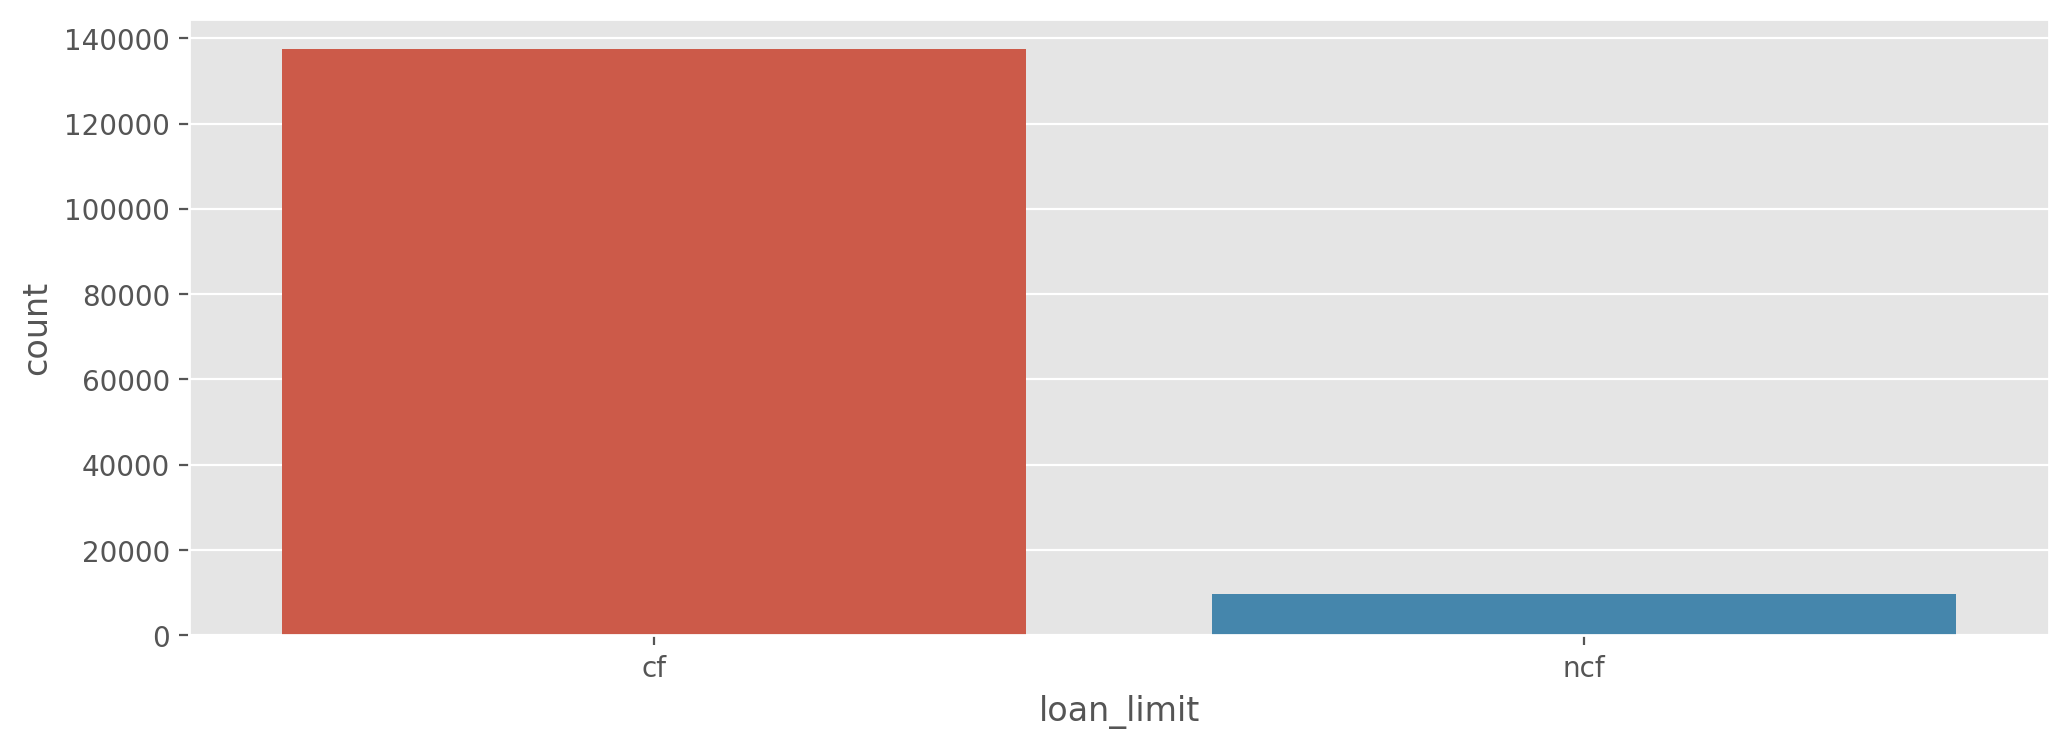

In [16]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['loan_limit'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

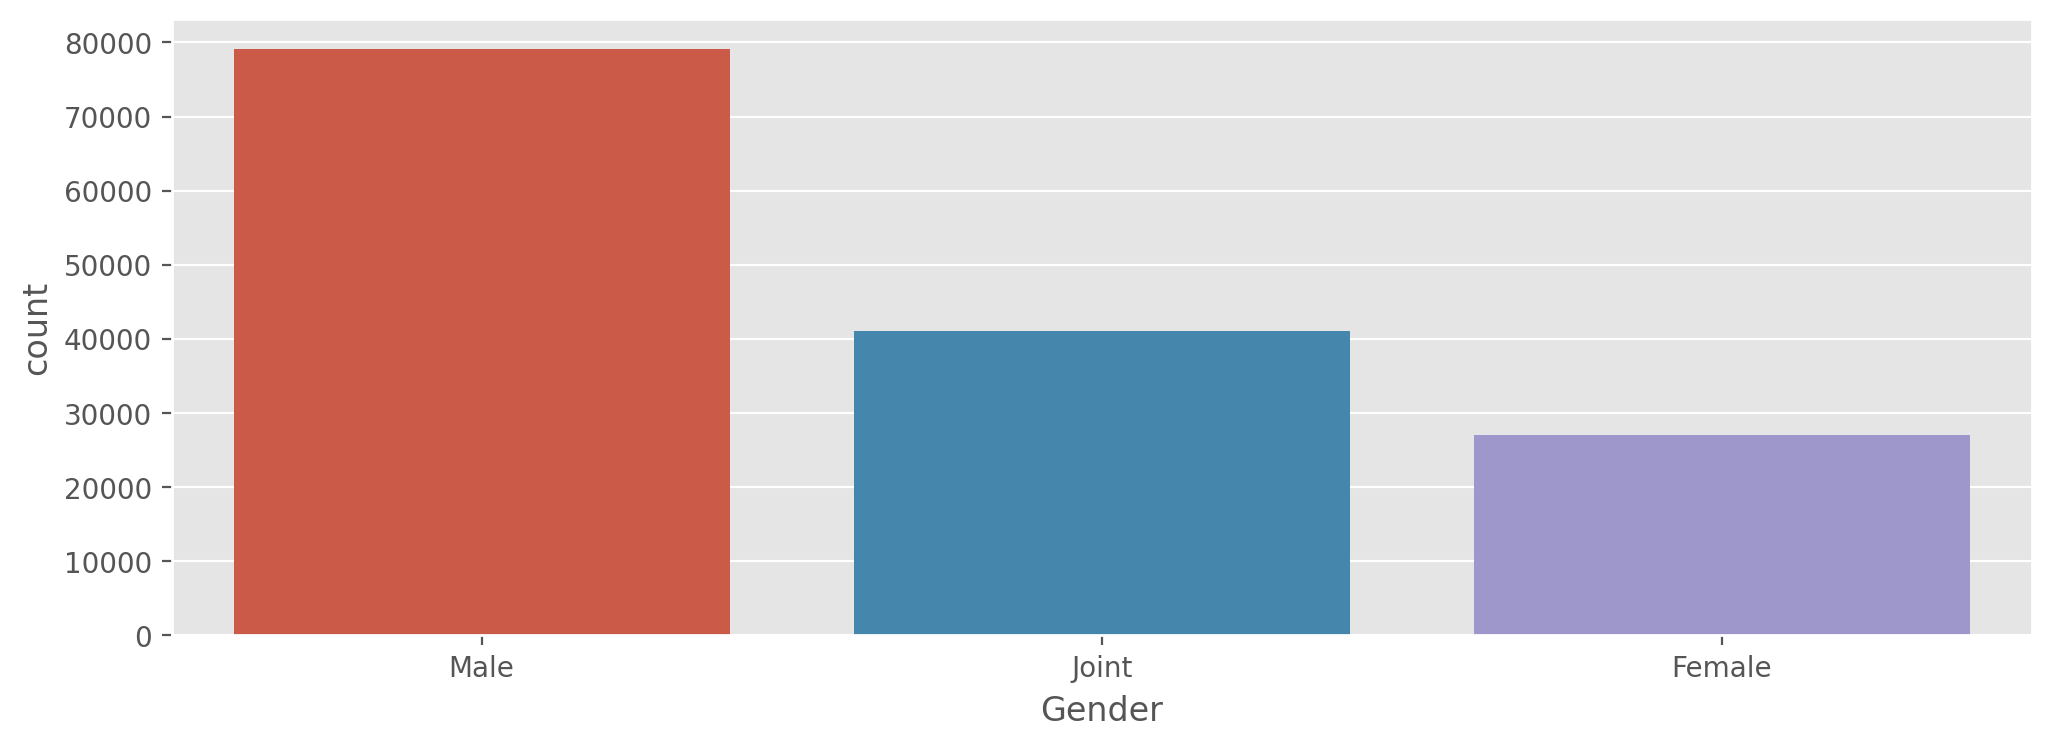

In [17]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='approv_in_adv', ylabel='count'>

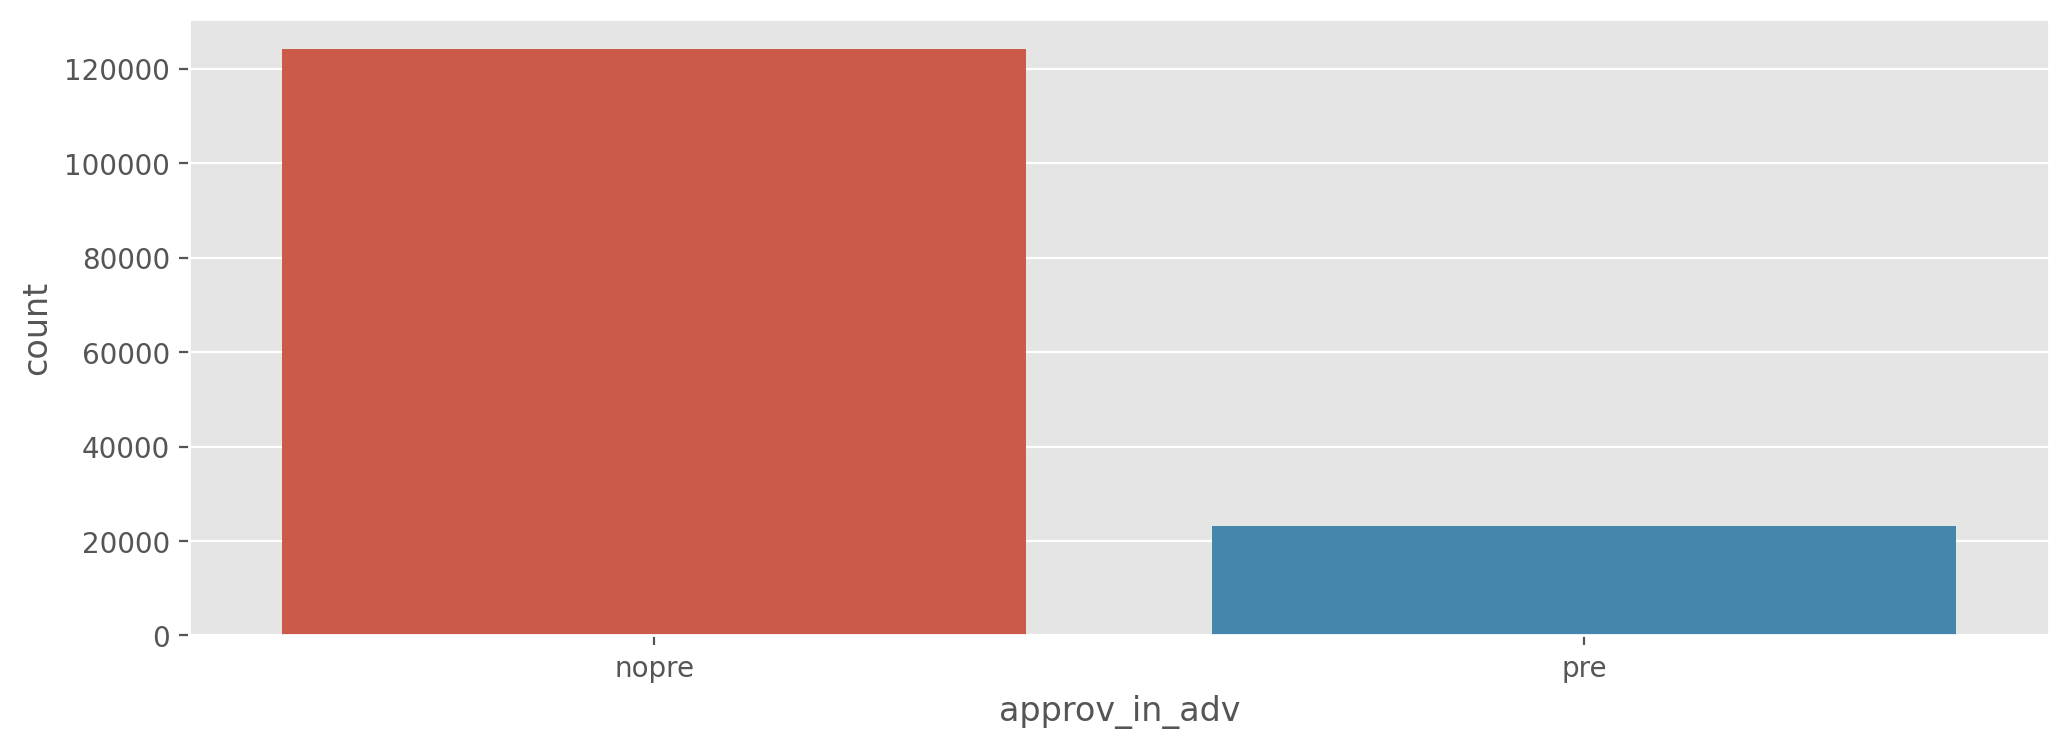

In [18]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['approv_in_adv'])

<AxesSubplot:xlabel='loan_type', ylabel='count'>

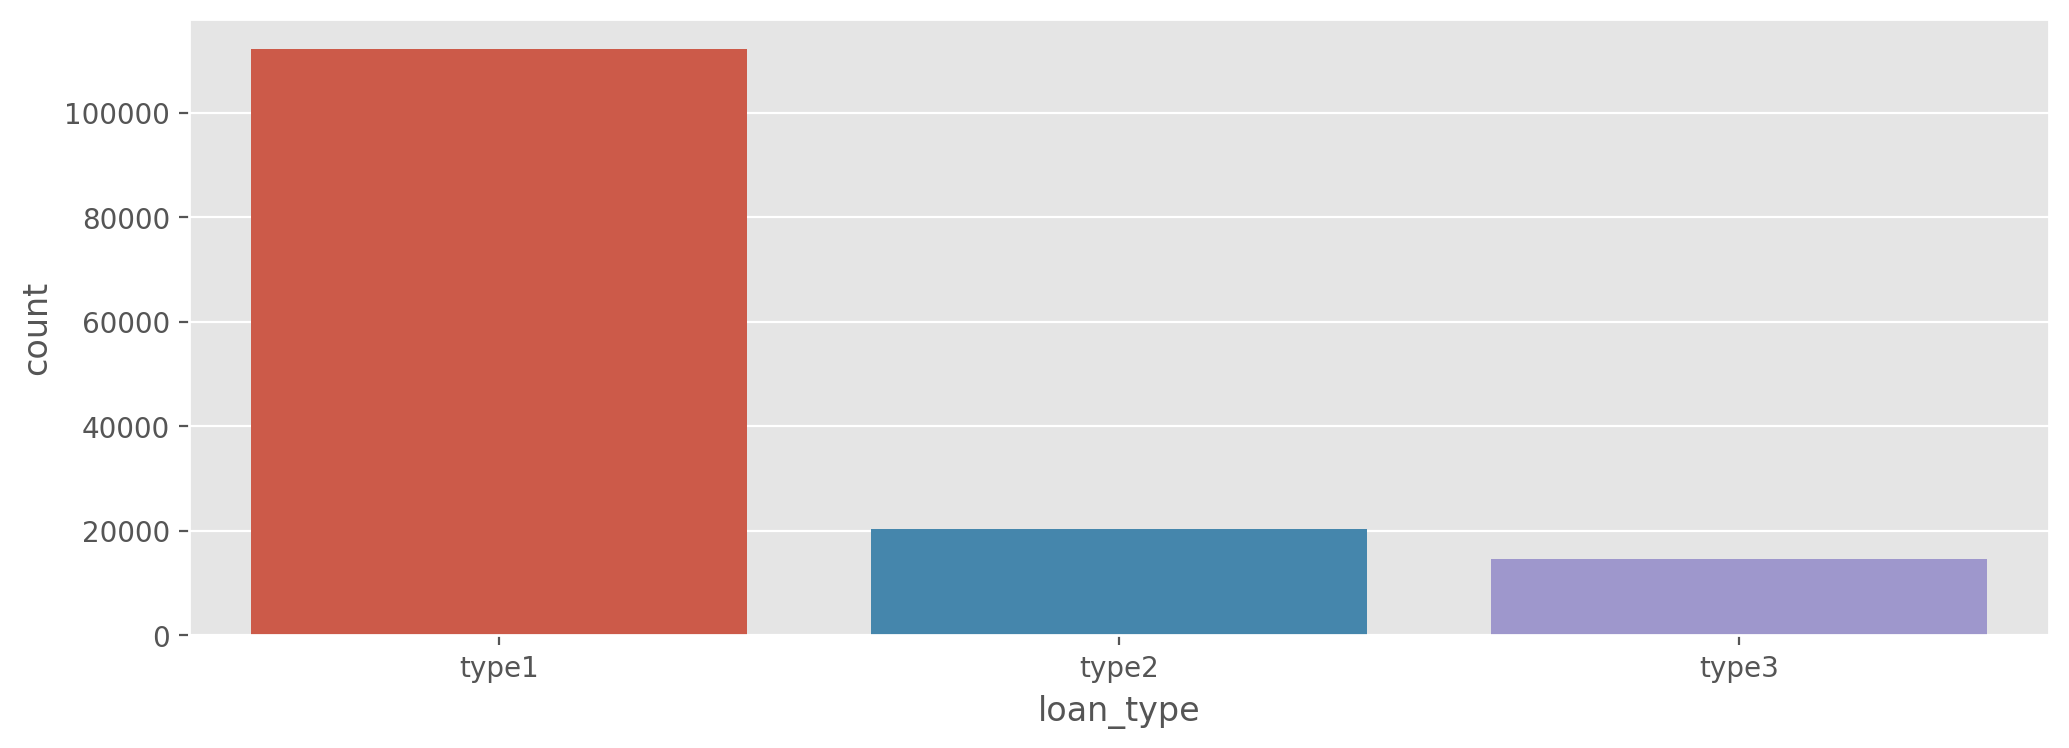

In [19]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['loan_type'])

<AxesSubplot:xlabel='loan_purpose', ylabel='count'>

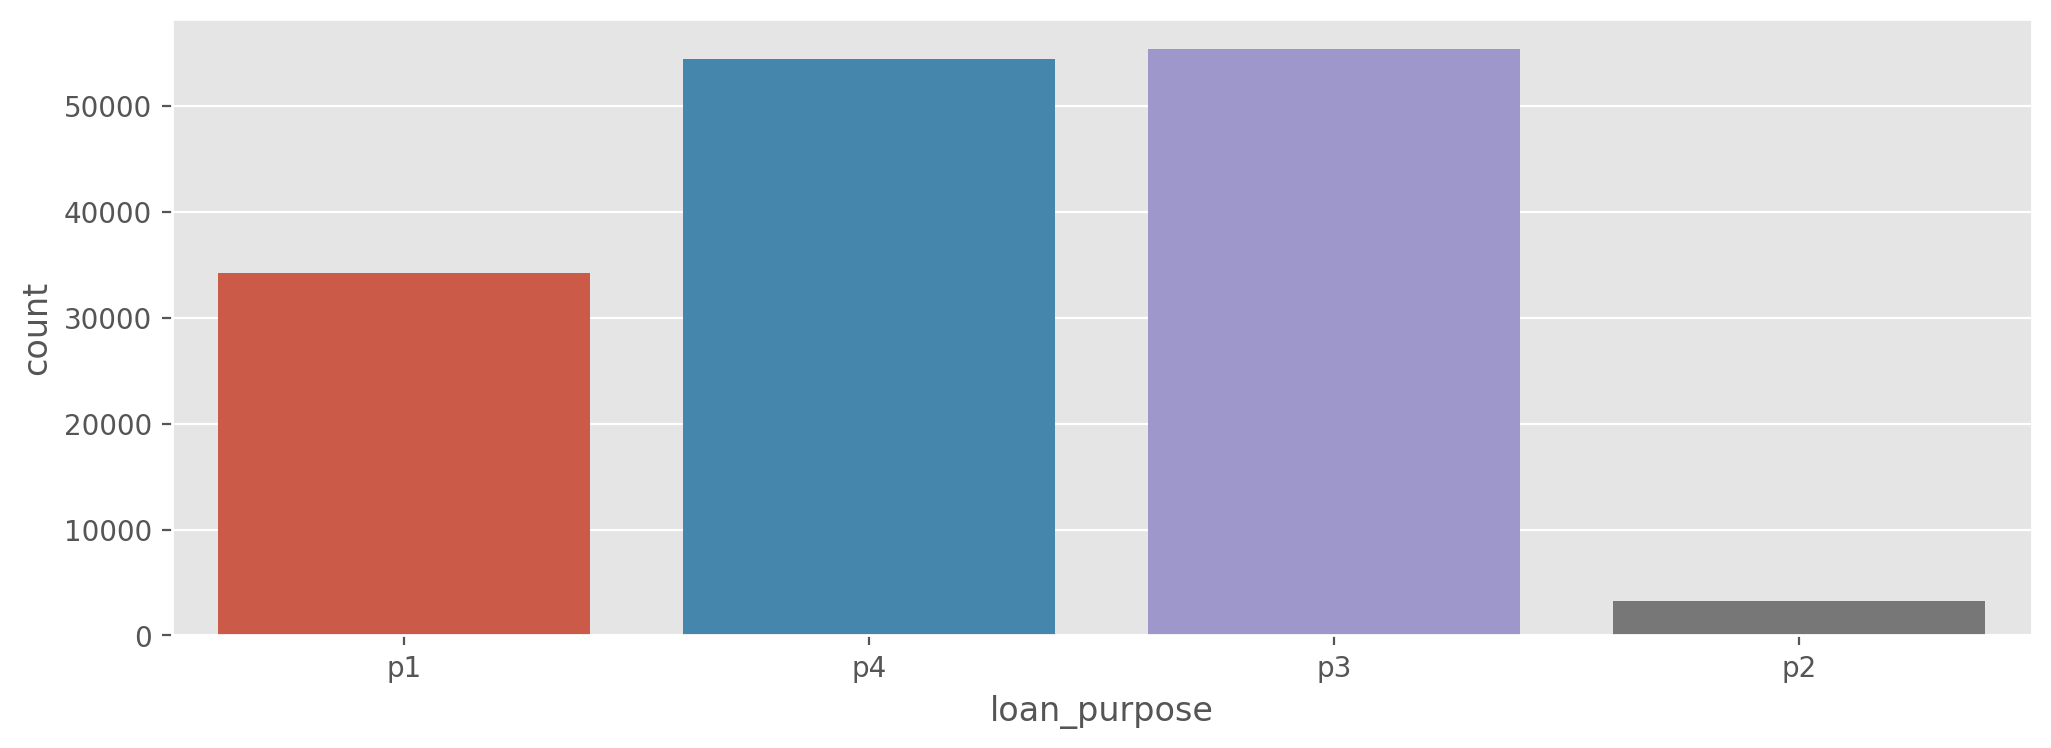

In [20]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['loan_purpose'])

<AxesSubplot:xlabel='Credit_Worthiness', ylabel='count'>

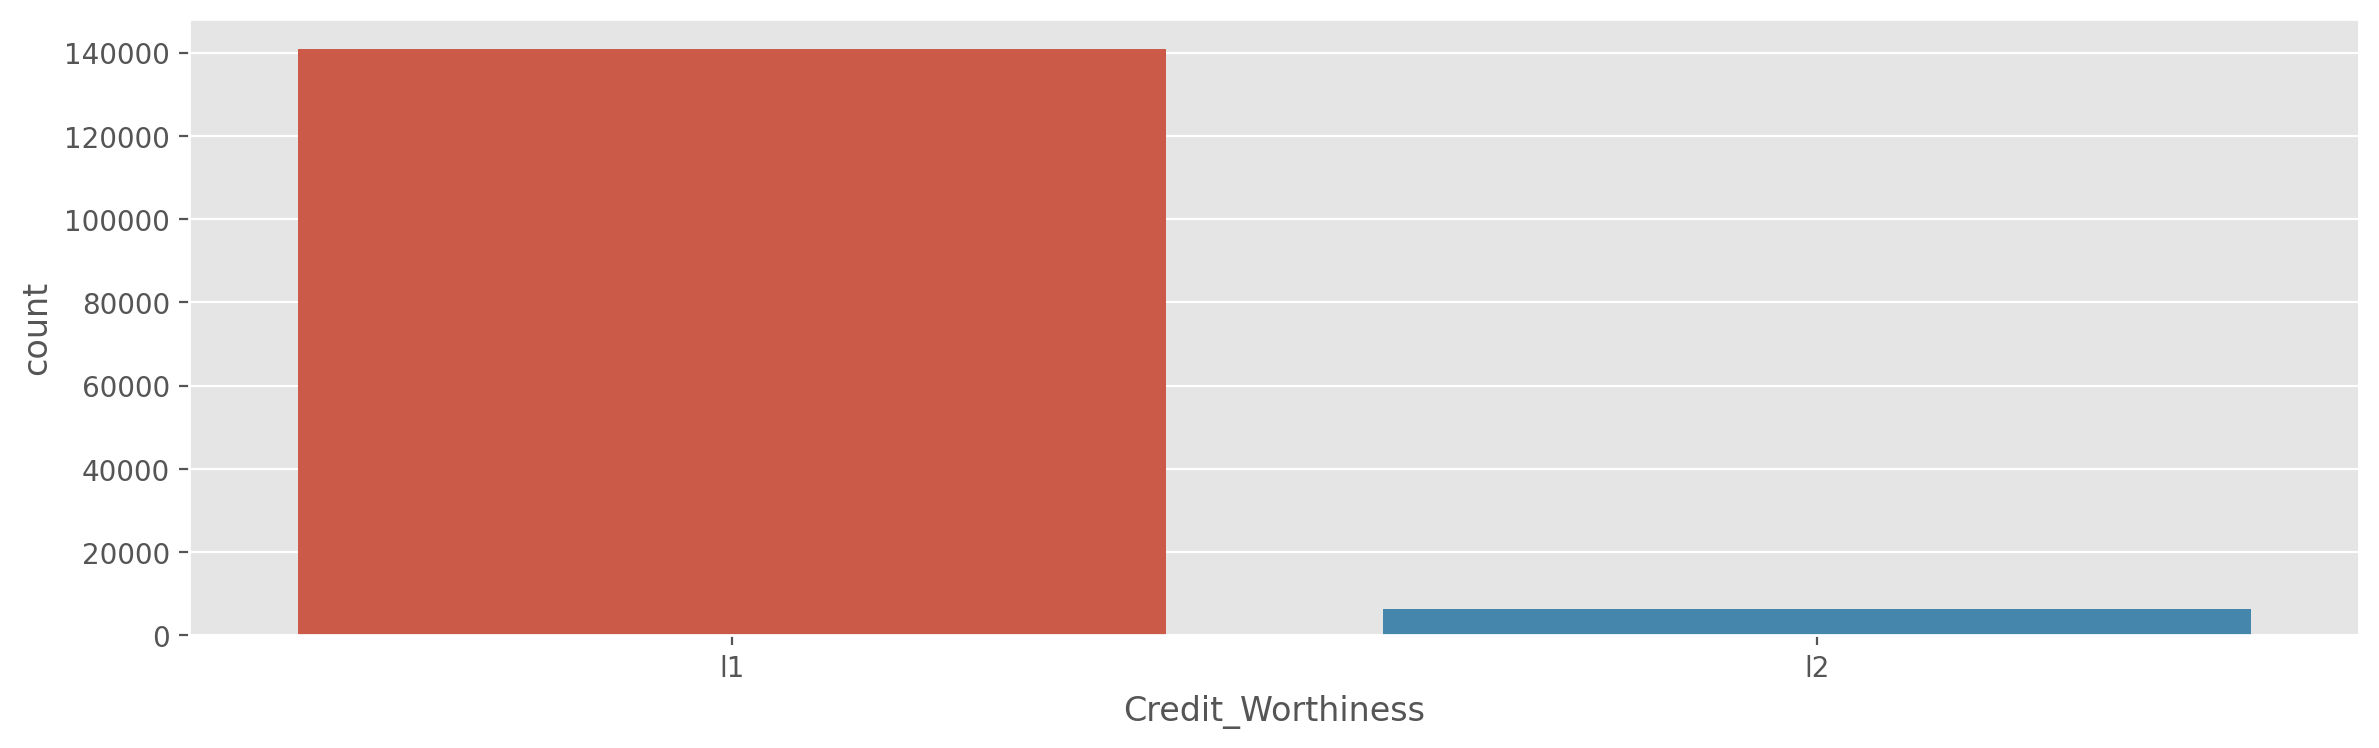

In [21]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot(data['Credit_Worthiness'])

<AxesSubplot:xlabel='open_credit', ylabel='count'>

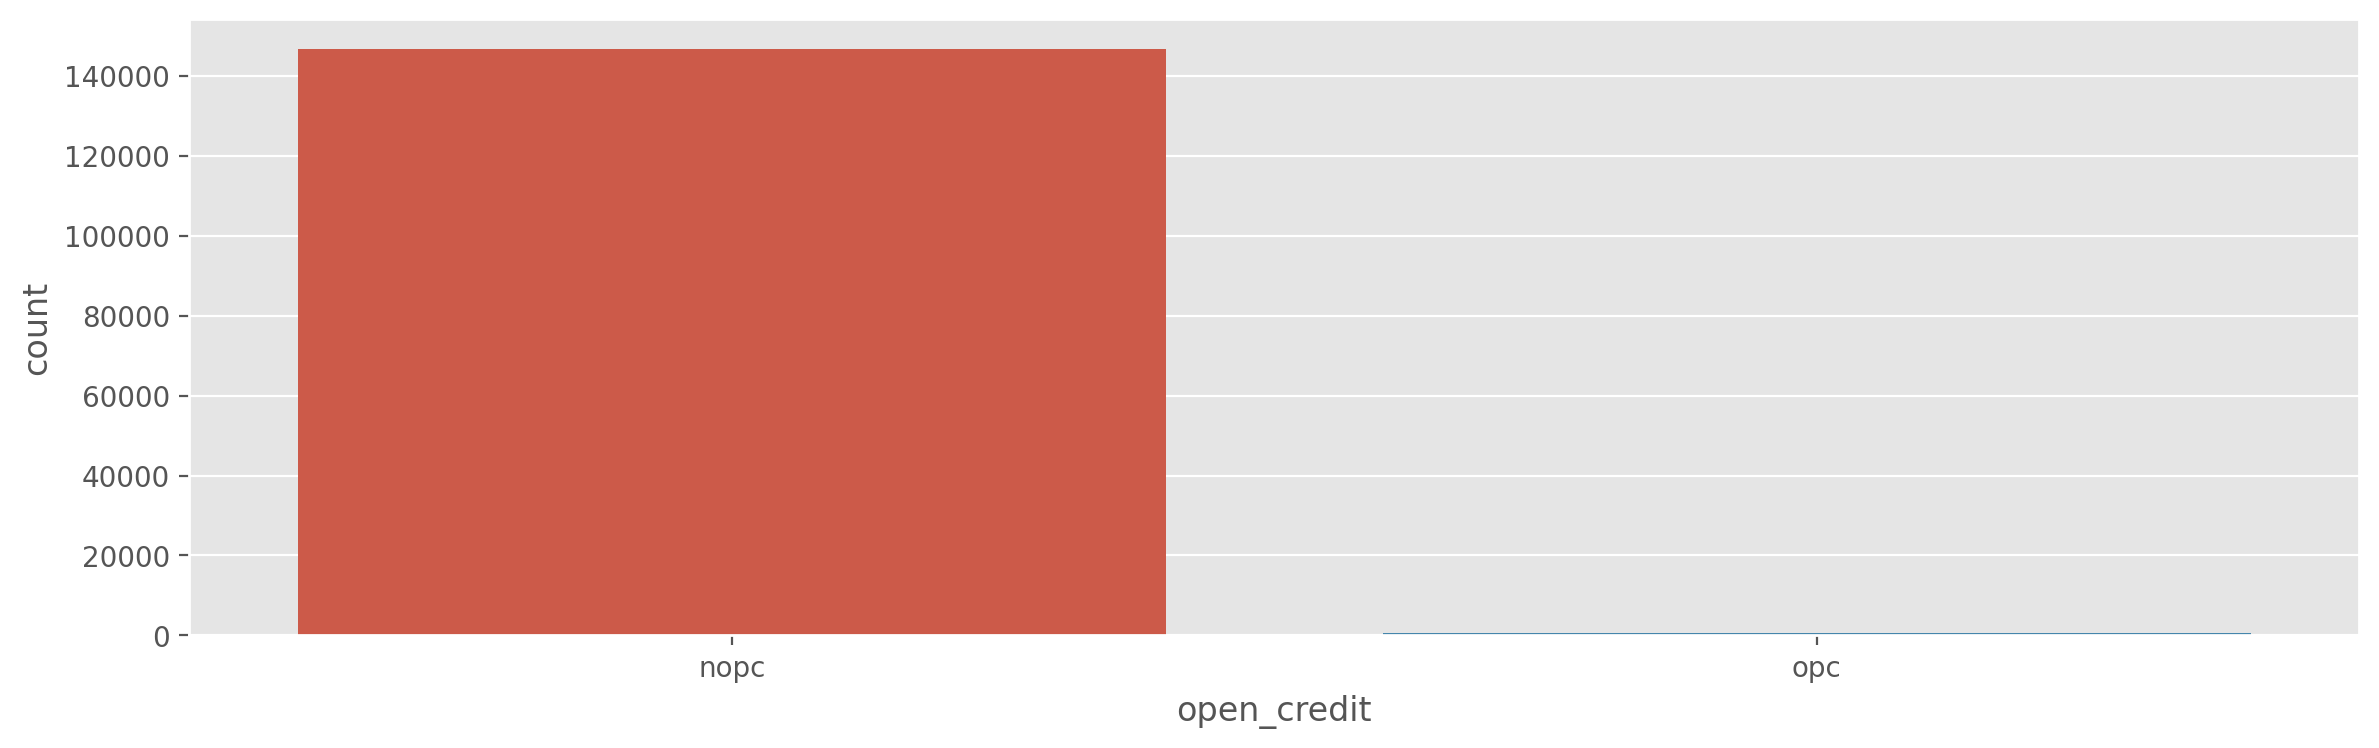

In [22]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot(data['open_credit'])

<AxesSubplot:xlabel='business_or_commercial', ylabel='count'>

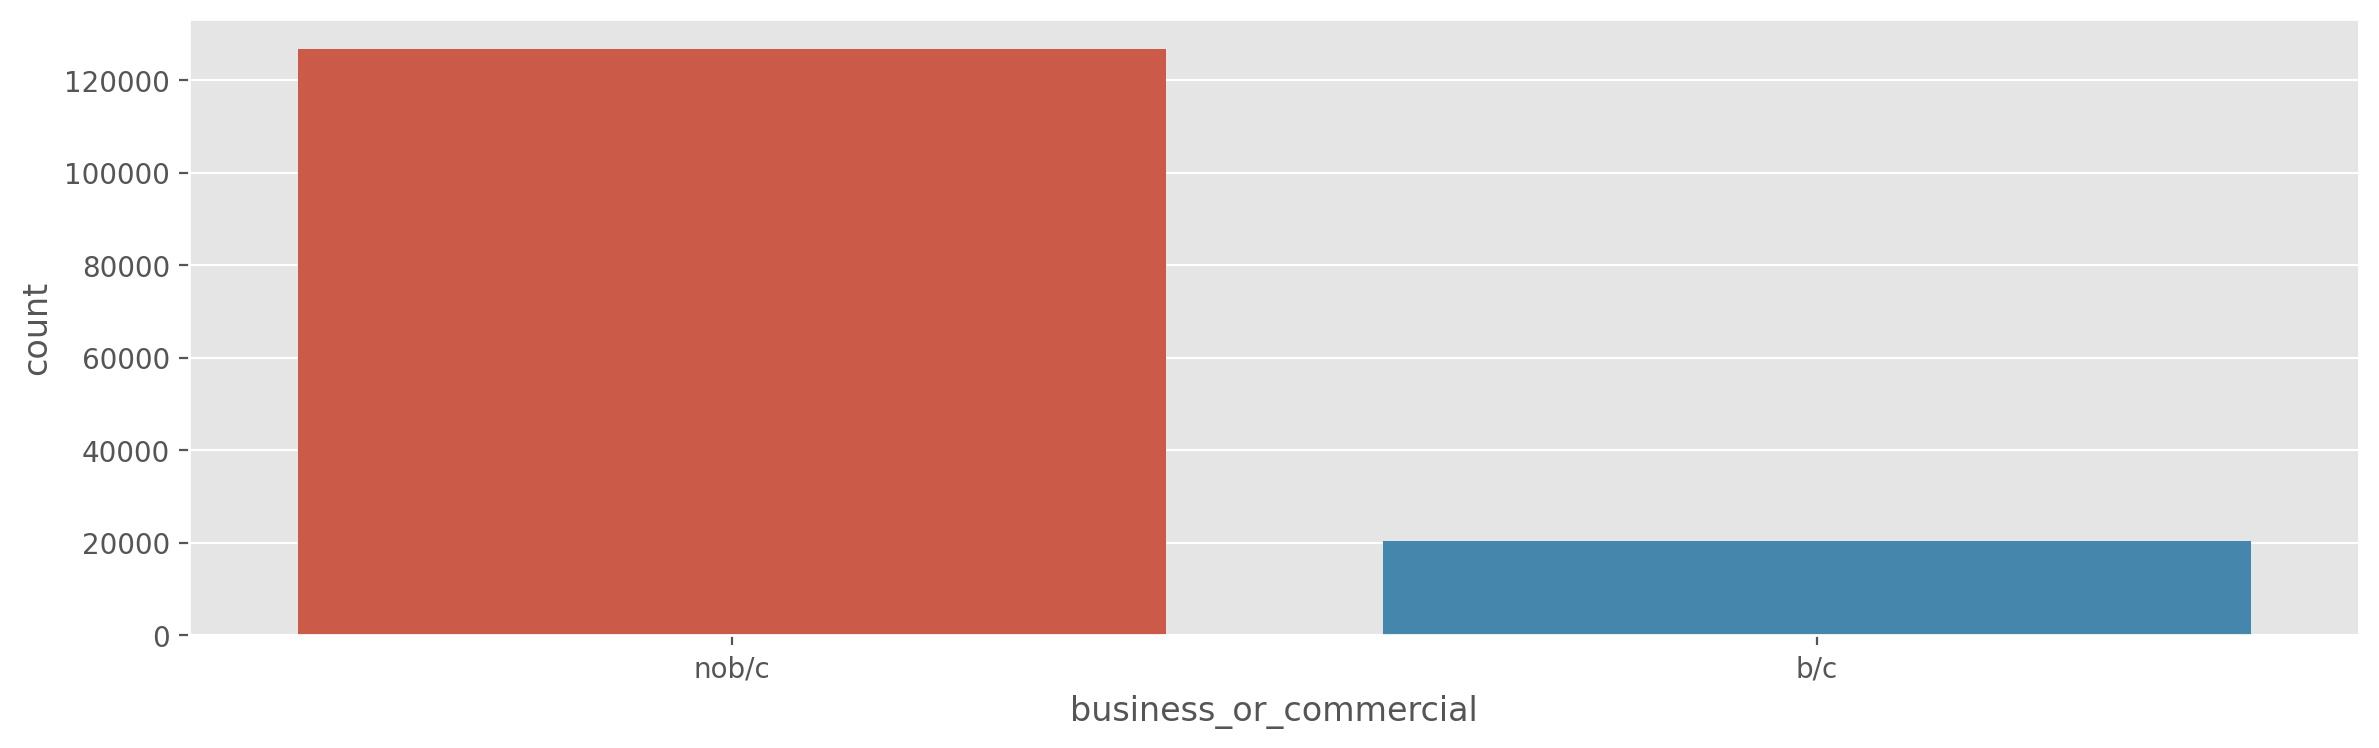

In [23]:
plt.figure(figsize = (14,4), dpi = 200)
sns.countplot(data['business_or_commercial'])

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

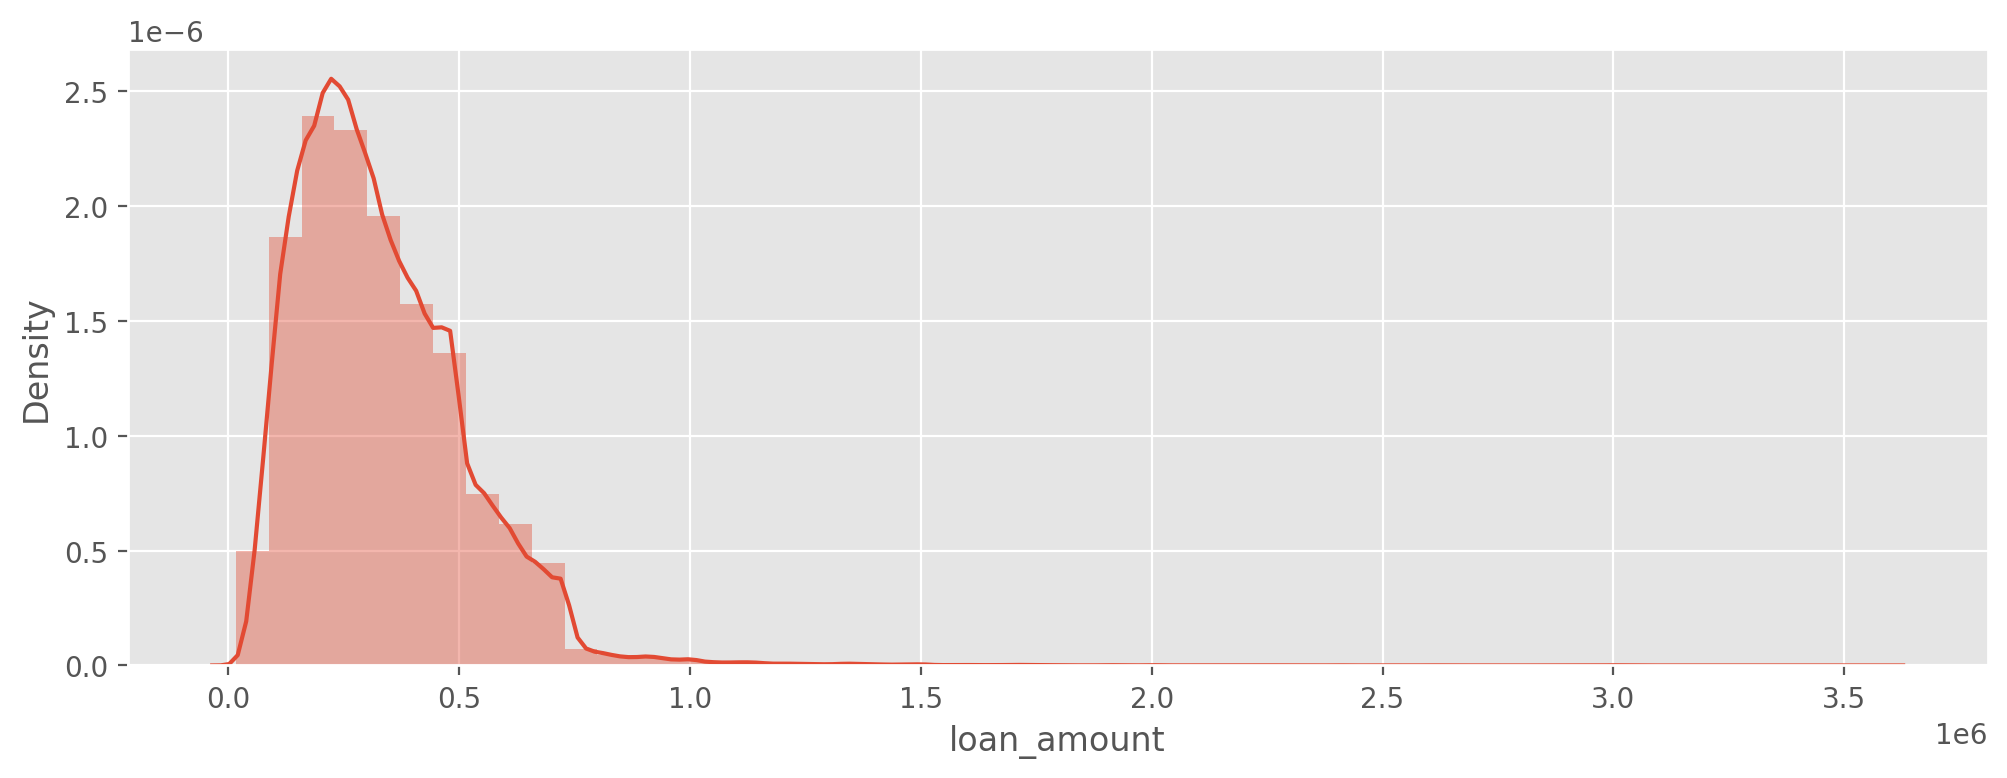

In [24]:
plt.figure(figsize = (12,4), dpi = 200)
sns.distplot(data['loan_amount'])

<AxesSubplot:xlabel='rate_of_interest', ylabel='Density'>

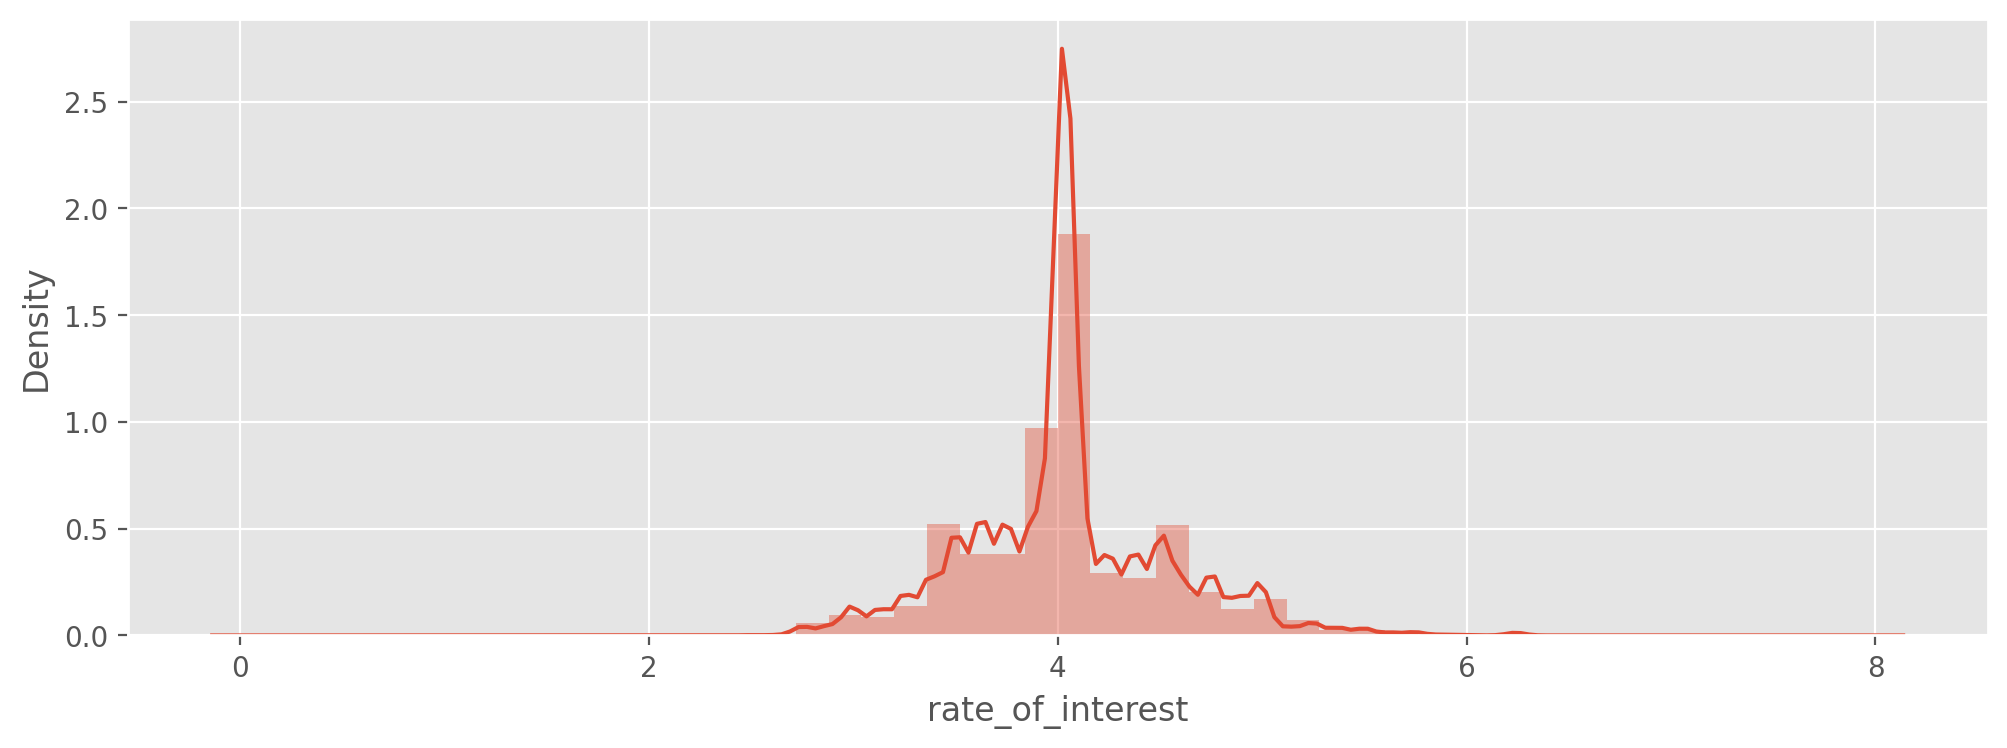

In [25]:
plt.figure(figsize = (12,4), dpi = 200)
sns.distplot(data['rate_of_interest'])

<AxesSubplot:xlabel='Interest_rate_spread', ylabel='Density'>

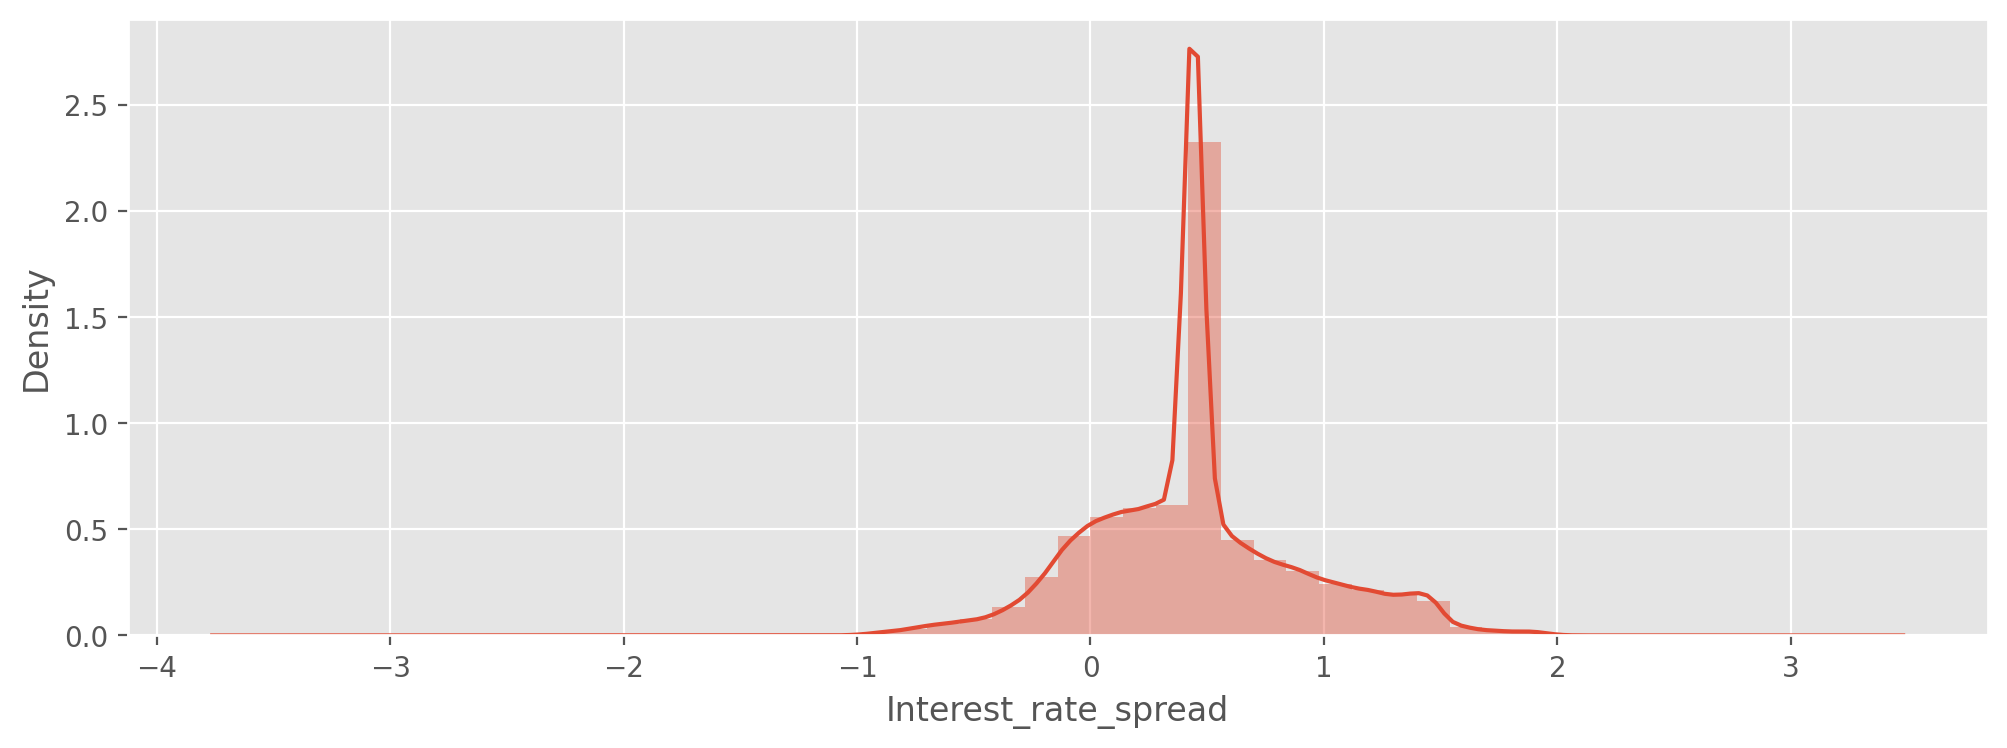

In [26]:
plt.figure(figsize = (12,4), dpi = 200)
sns.distplot(data['Interest_rate_spread'])

<AxesSubplot:xlabel='Upfront_charges', ylabel='Density'>

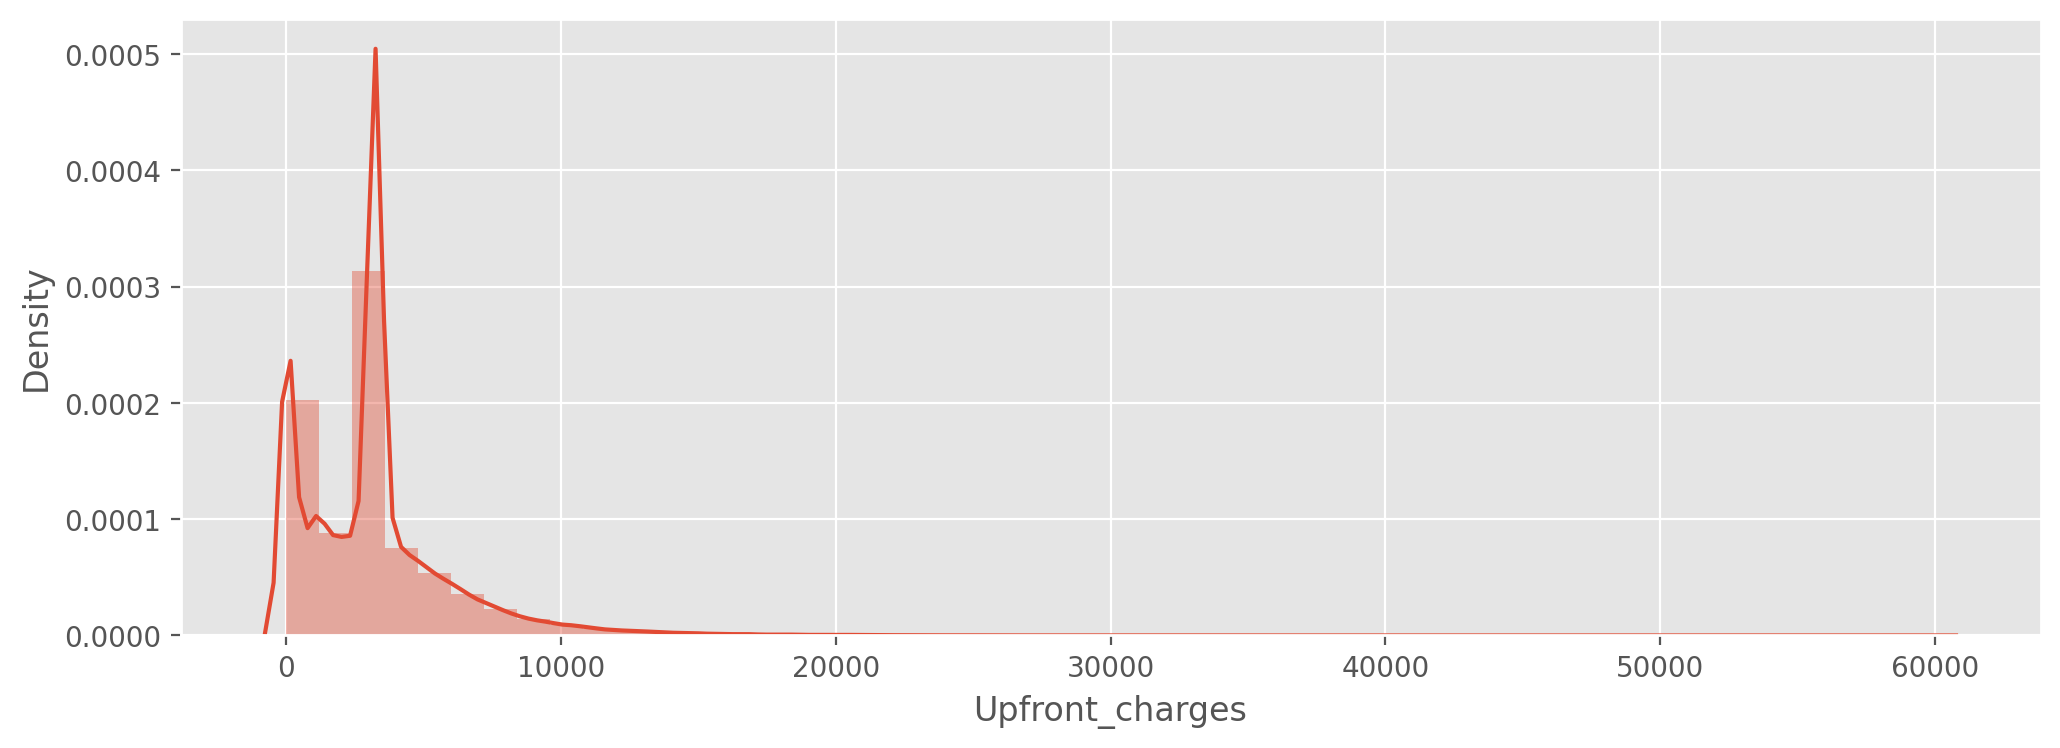

In [27]:
plt.figure(figsize = (12,4), dpi = 200)
sns.distplot(data['Upfront_charges'])

<AxesSubplot:xlabel='term', ylabel='Density'>

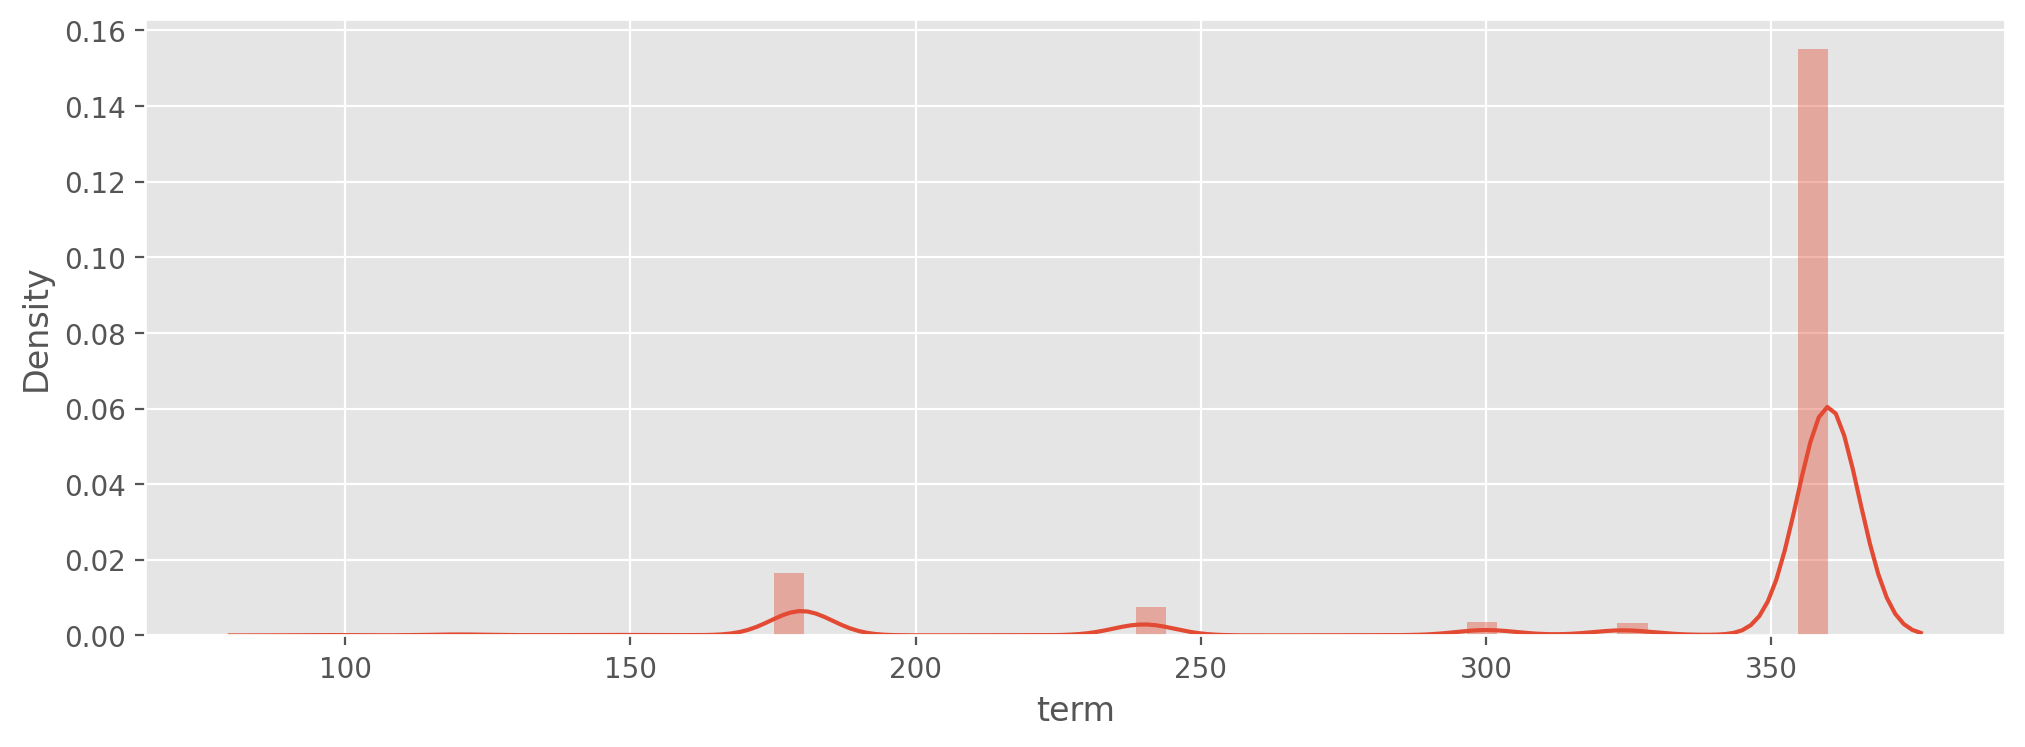

In [28]:
plt.figure(figsize = (12,4), dpi = 200)
sns.distplot(data['term'])

<AxesSubplot:xlabel='Neg_ammortization', ylabel='count'>

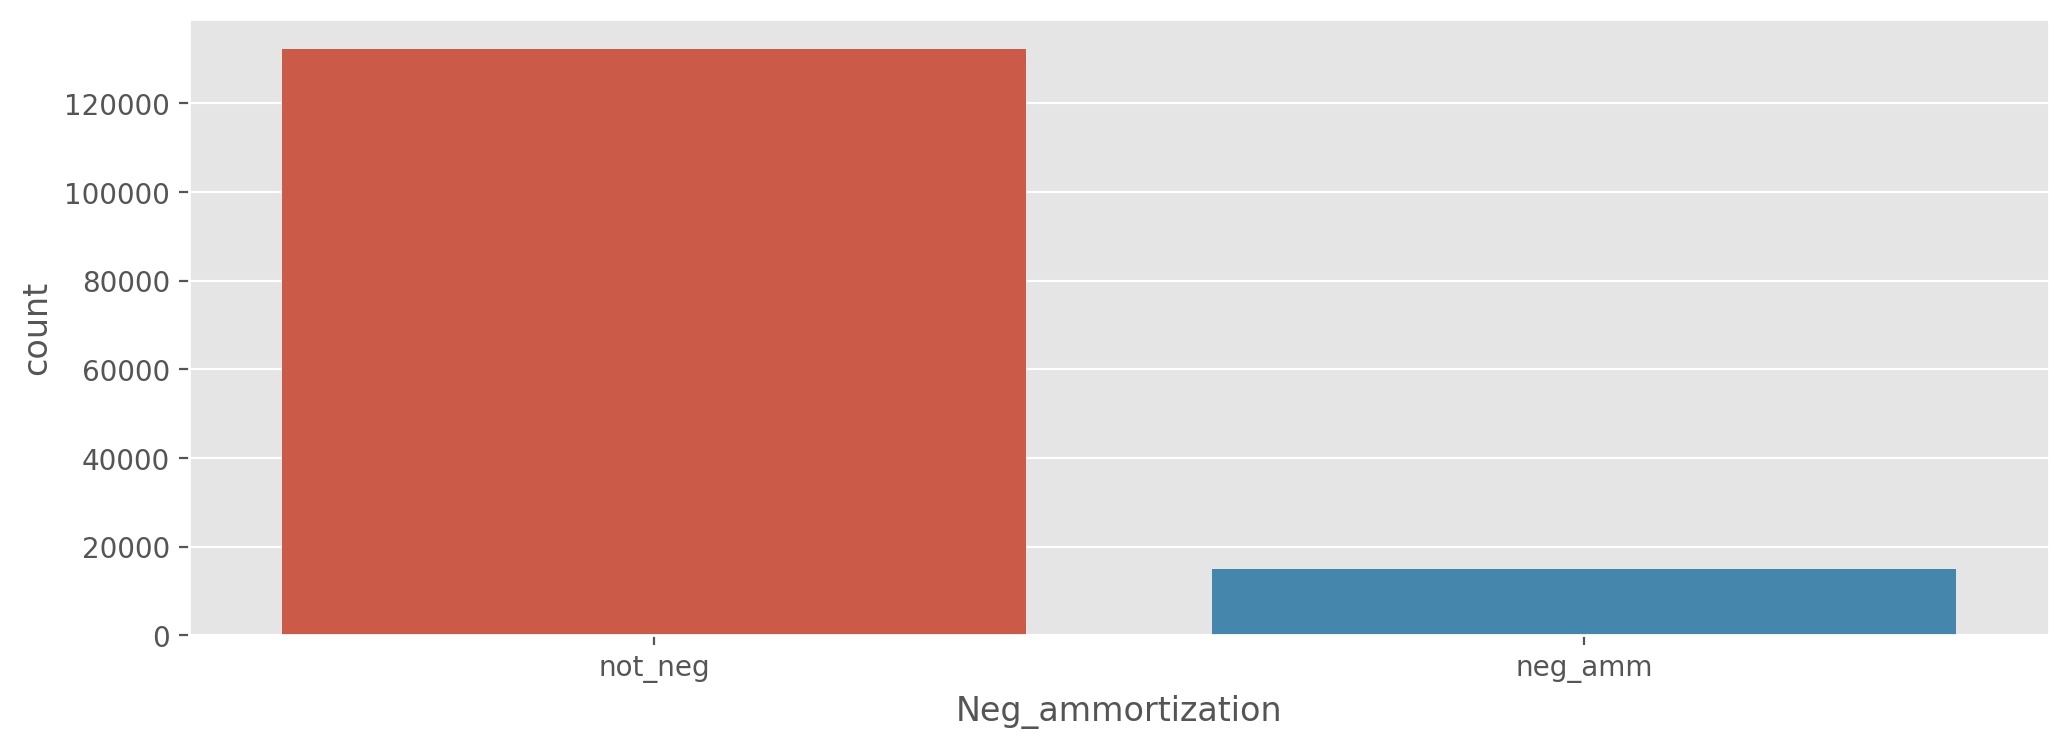

In [29]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['Neg_ammortization'])

<AxesSubplot:xlabel='lump_sum_payment', ylabel='count'>

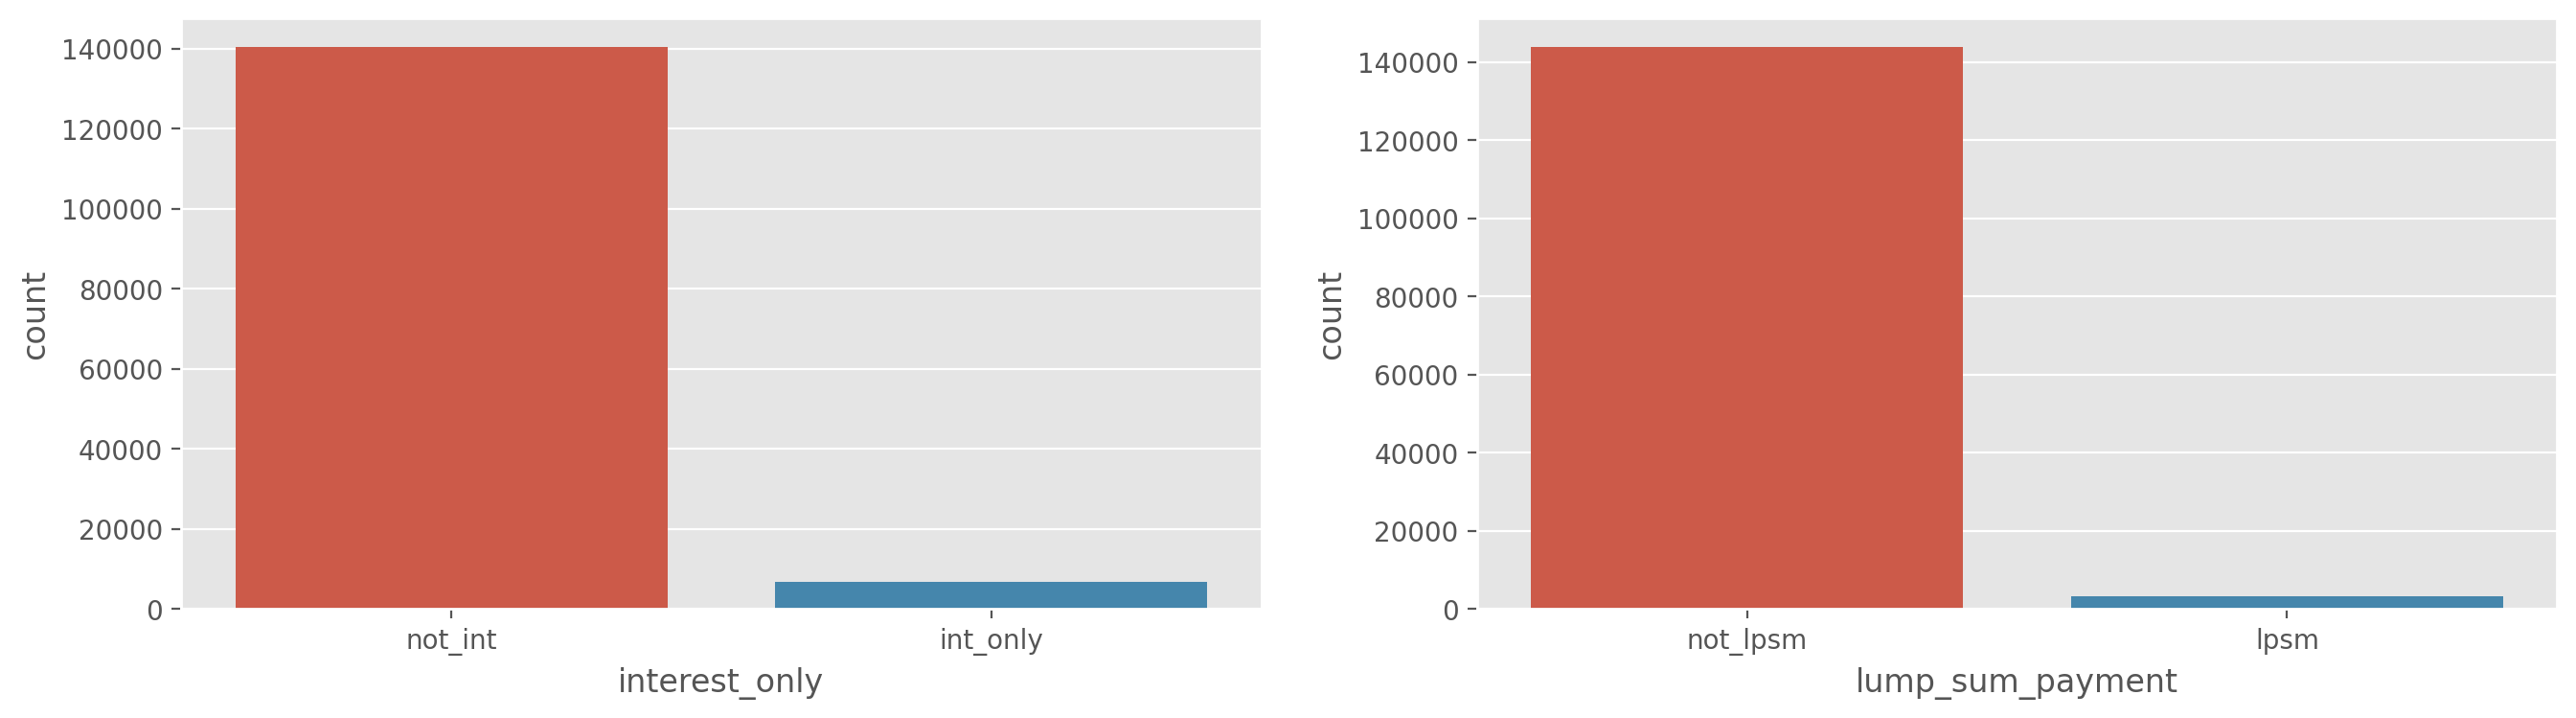

In [30]:
plt.figure(figsize = (16,4), dpi = 200)
plt.subplot(1,2,1)
sns.countplot(data['interest_only'])
plt.subplot(1,2,2)
sns.countplot(data['lump_sum_payment'])

<AxesSubplot:xlabel='Secured_by', ylabel='count'>

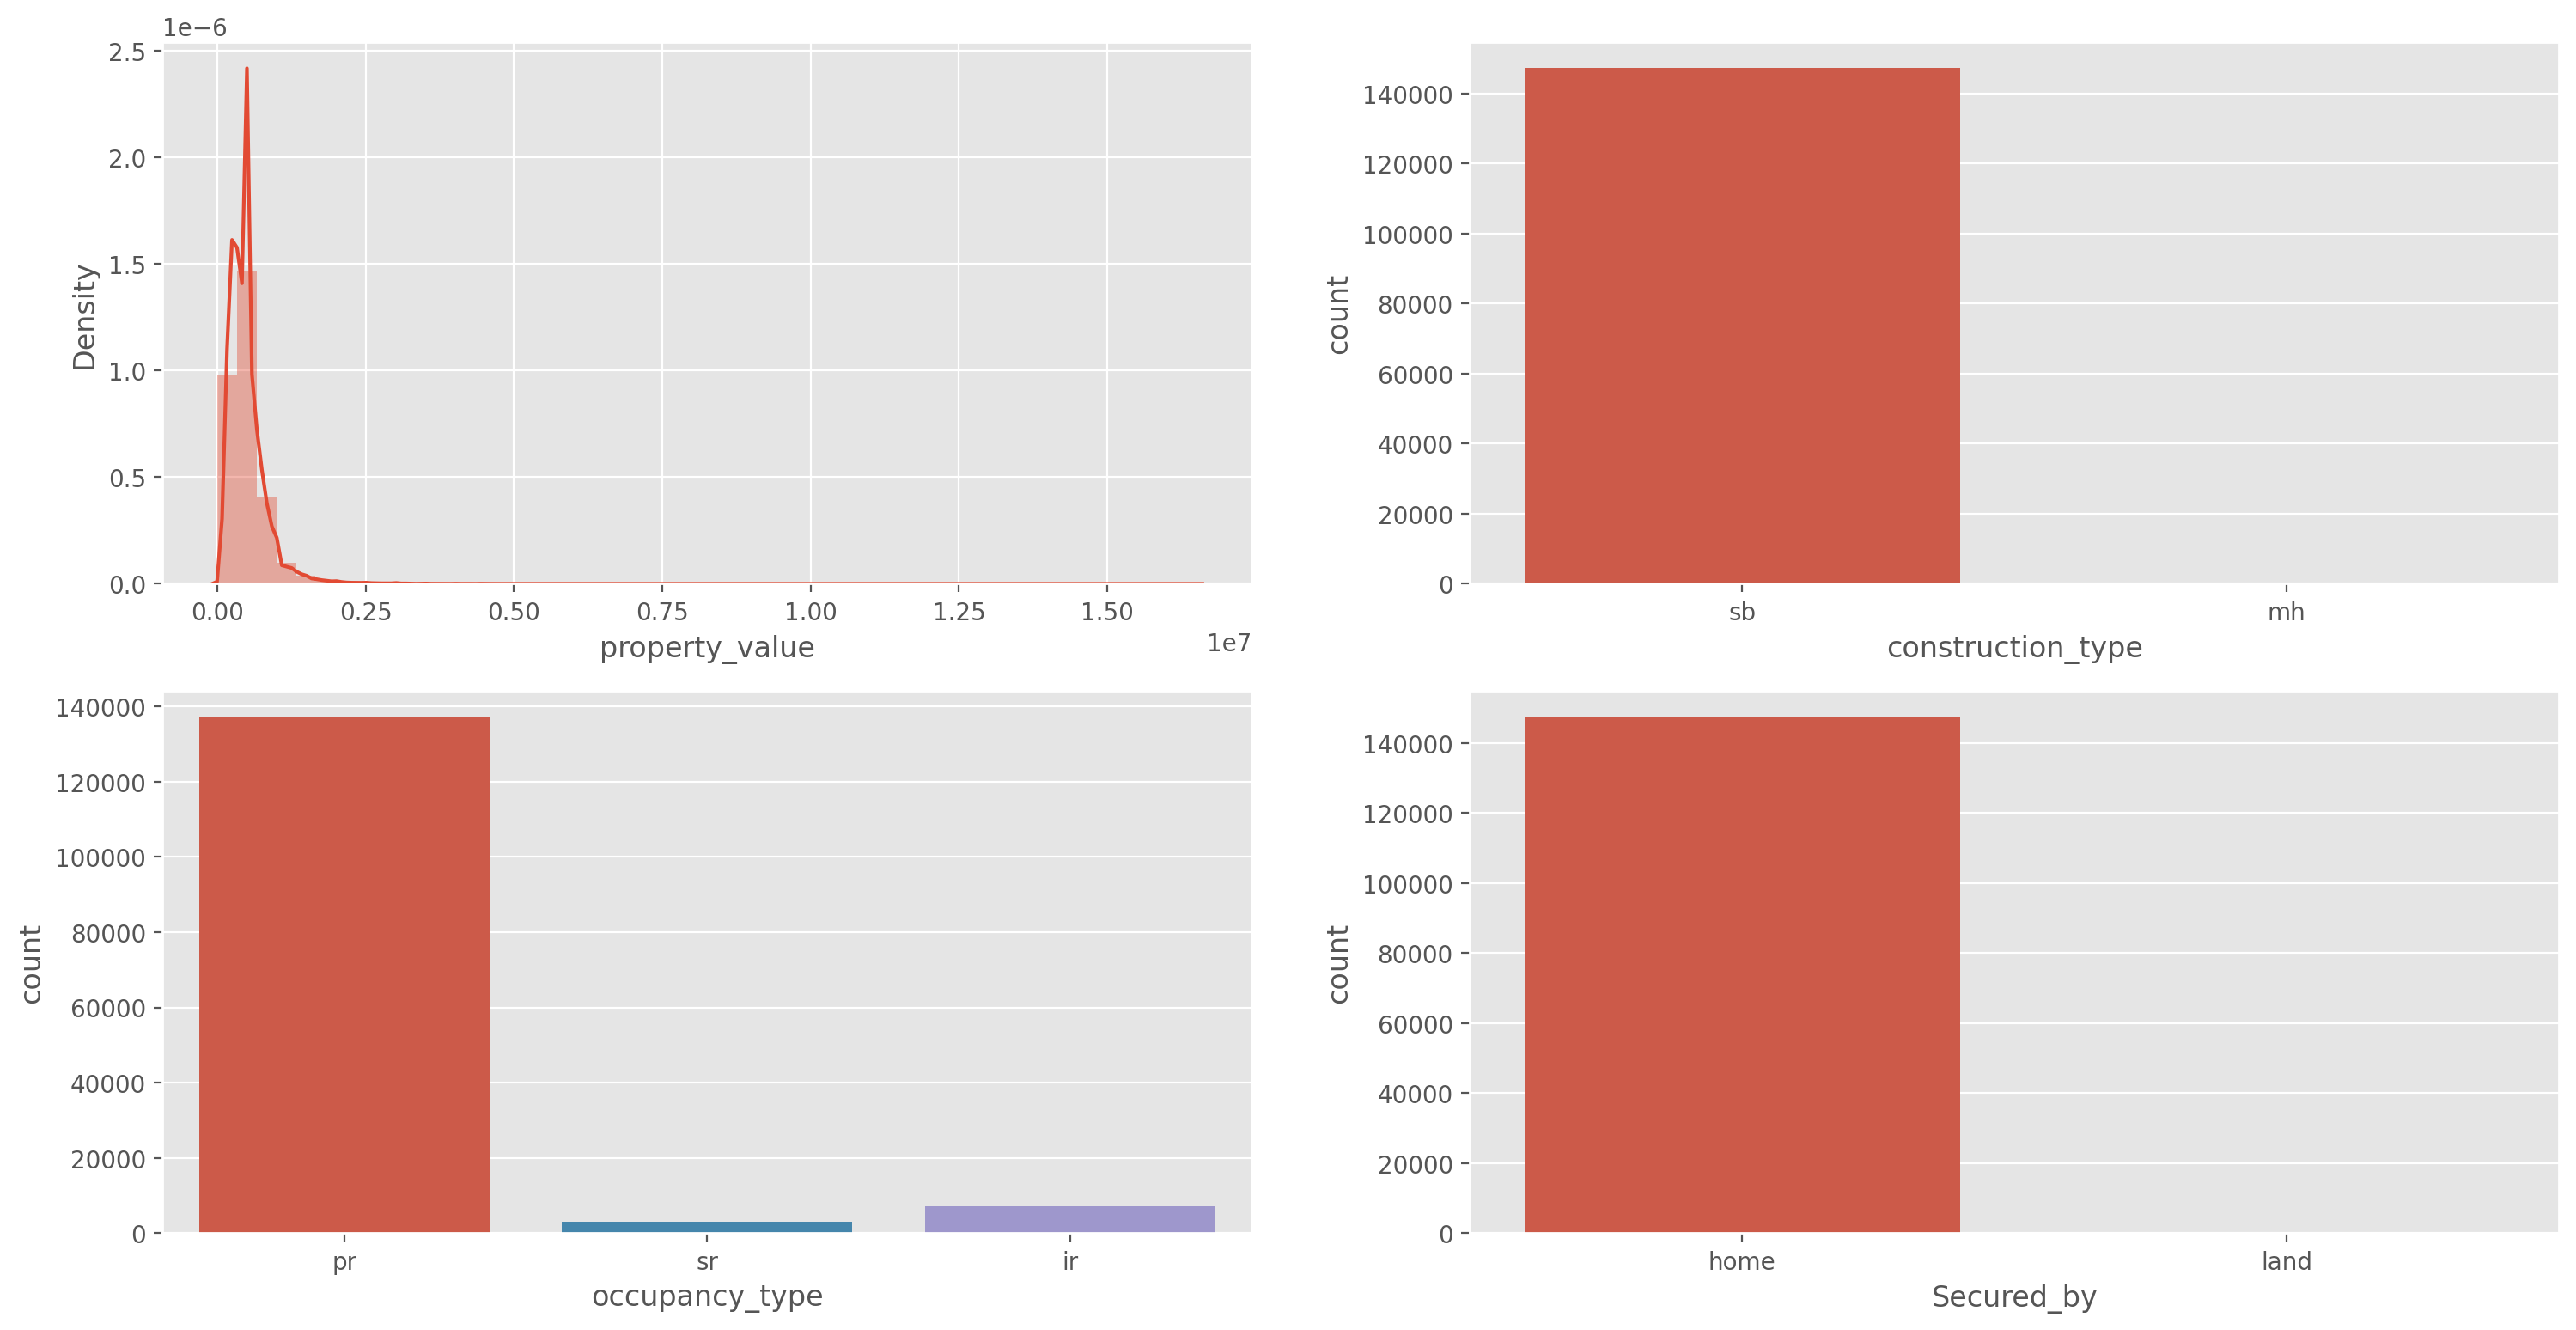

In [31]:
plt.figure(figsize = (18,9), dpi = 200)
plt.subplot(2,2,1)
sns.distplot(data['property_value'])
plt.subplot(2,2,2)
sns.countplot(data['construction_type'])
plt.subplot(2,2,3)
sns.countplot(data['occupancy_type'])
plt.subplot(2,2,4)
sns.countplot(data['Secured_by'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Density'>

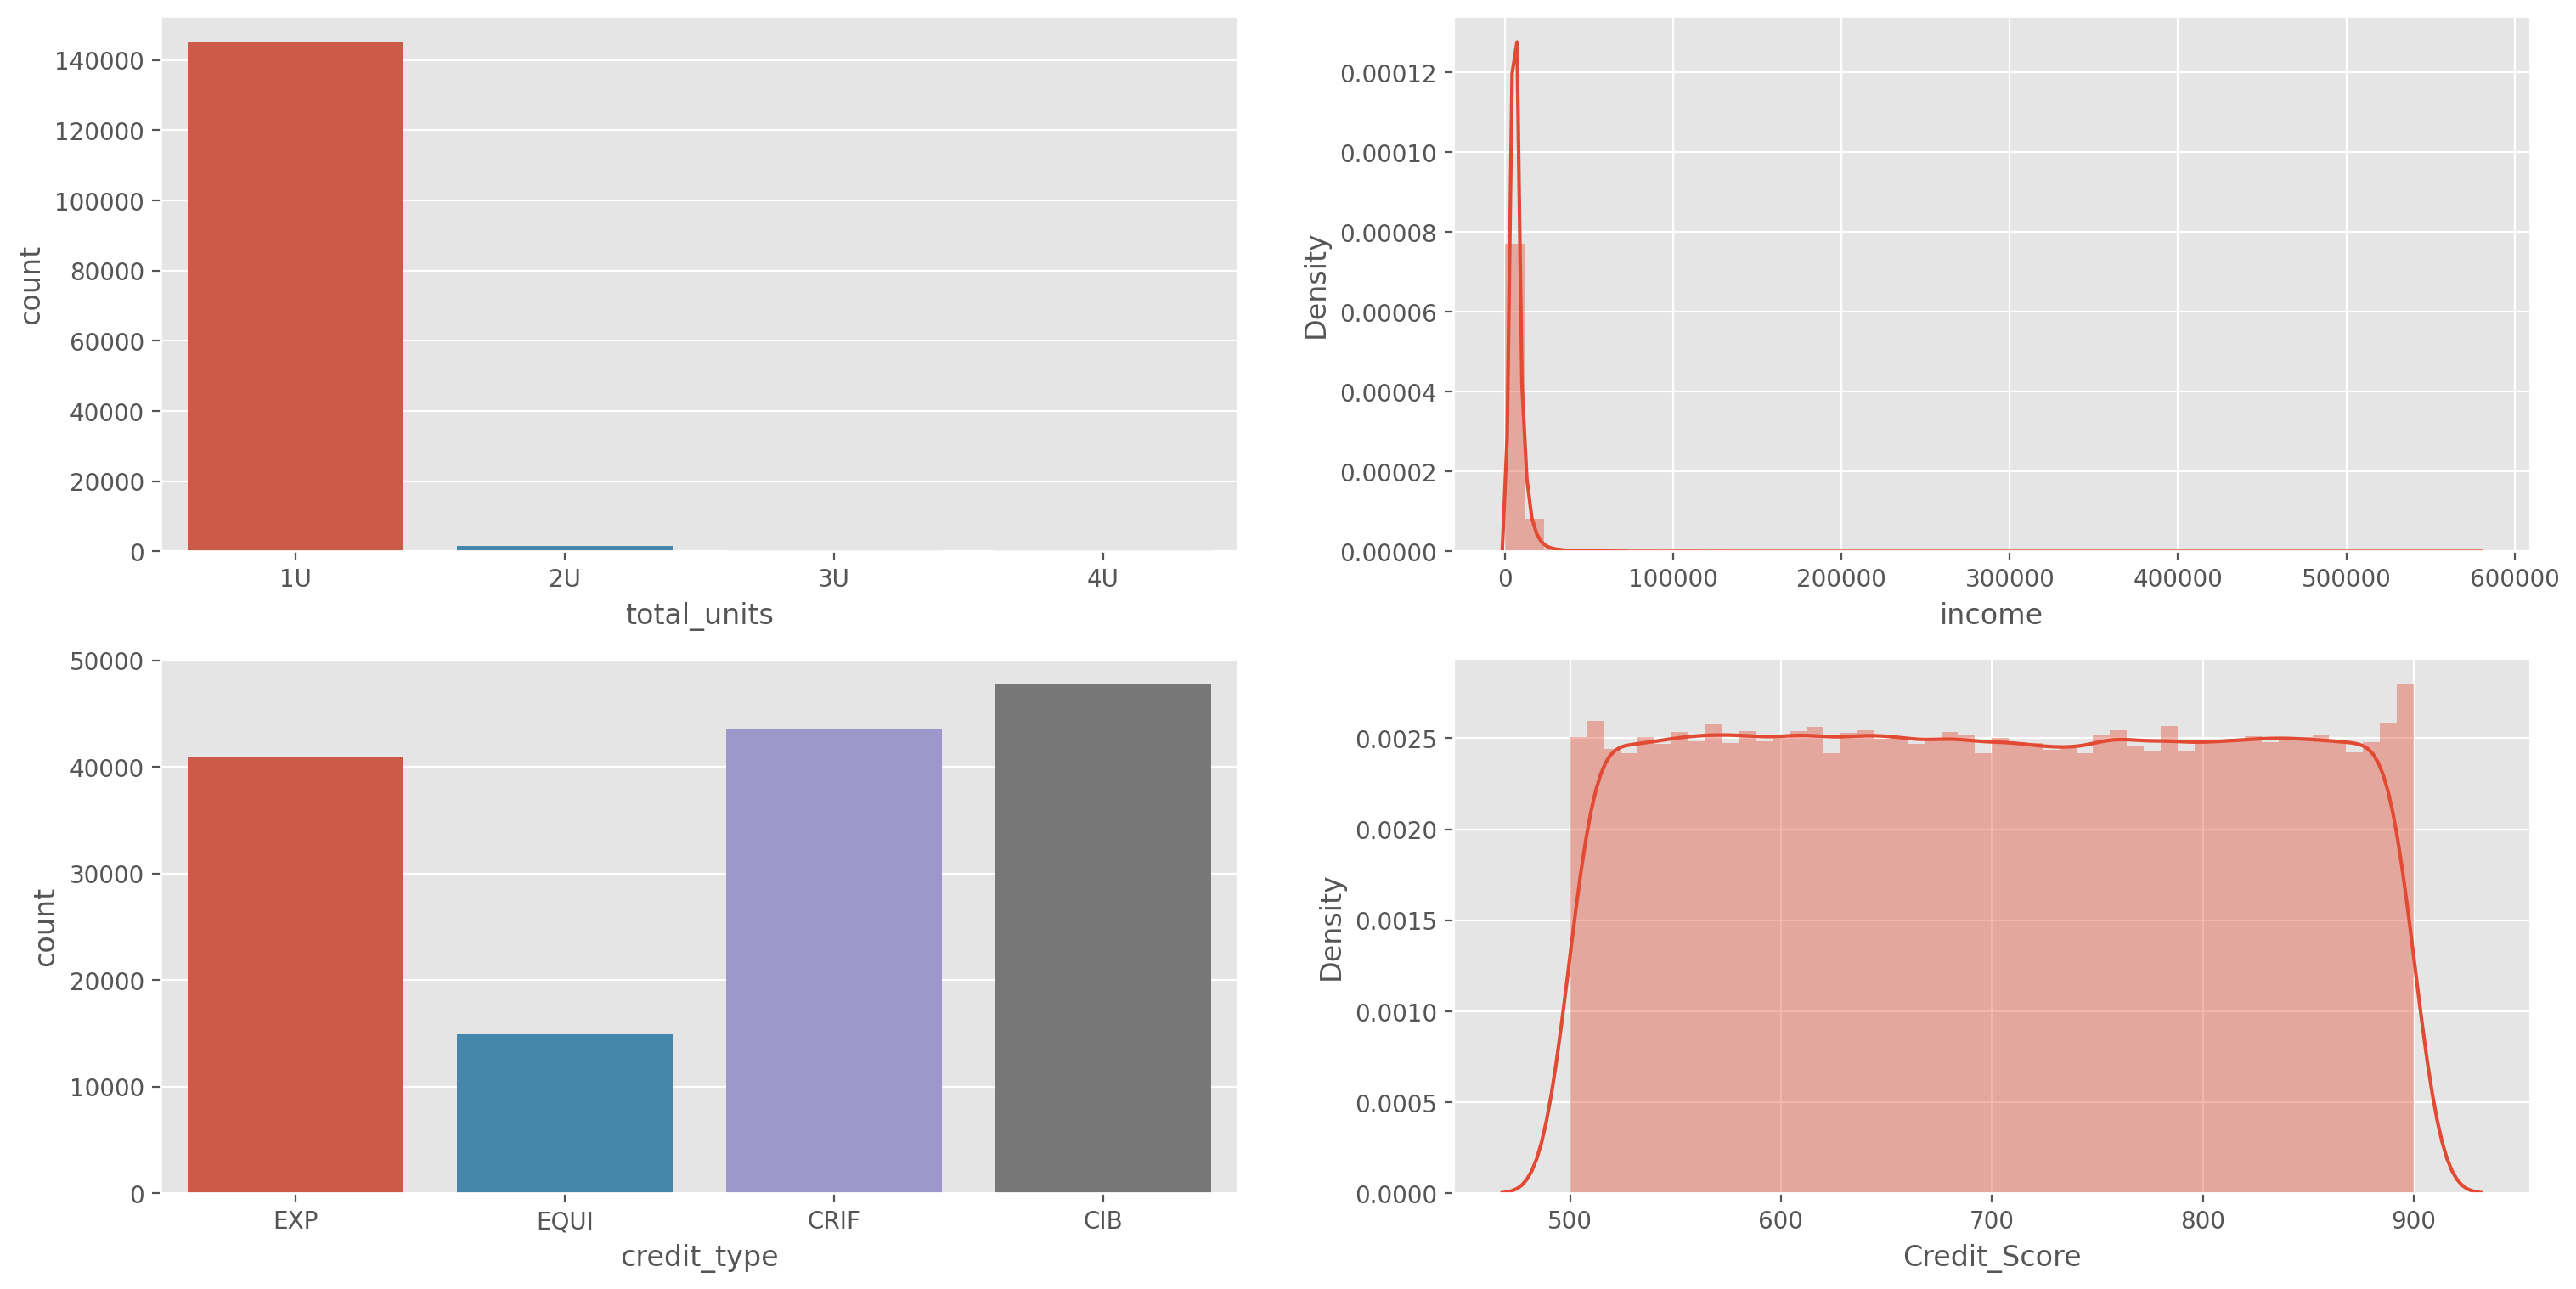

In [32]:
plt.figure(figsize = (18,9), dpi = 200)
plt.subplot(2,2,1)
sns.countplot(data['total_units'])
plt.subplot(2,2,2)
sns.distplot(data['income'])
plt.subplot(2,2,3)
sns.countplot(data['credit_type'])
plt.subplot(2,2,4)
sns.distplot(data['Credit_Score'])

<AxesSubplot:xlabel='LTV', ylabel='Density'>

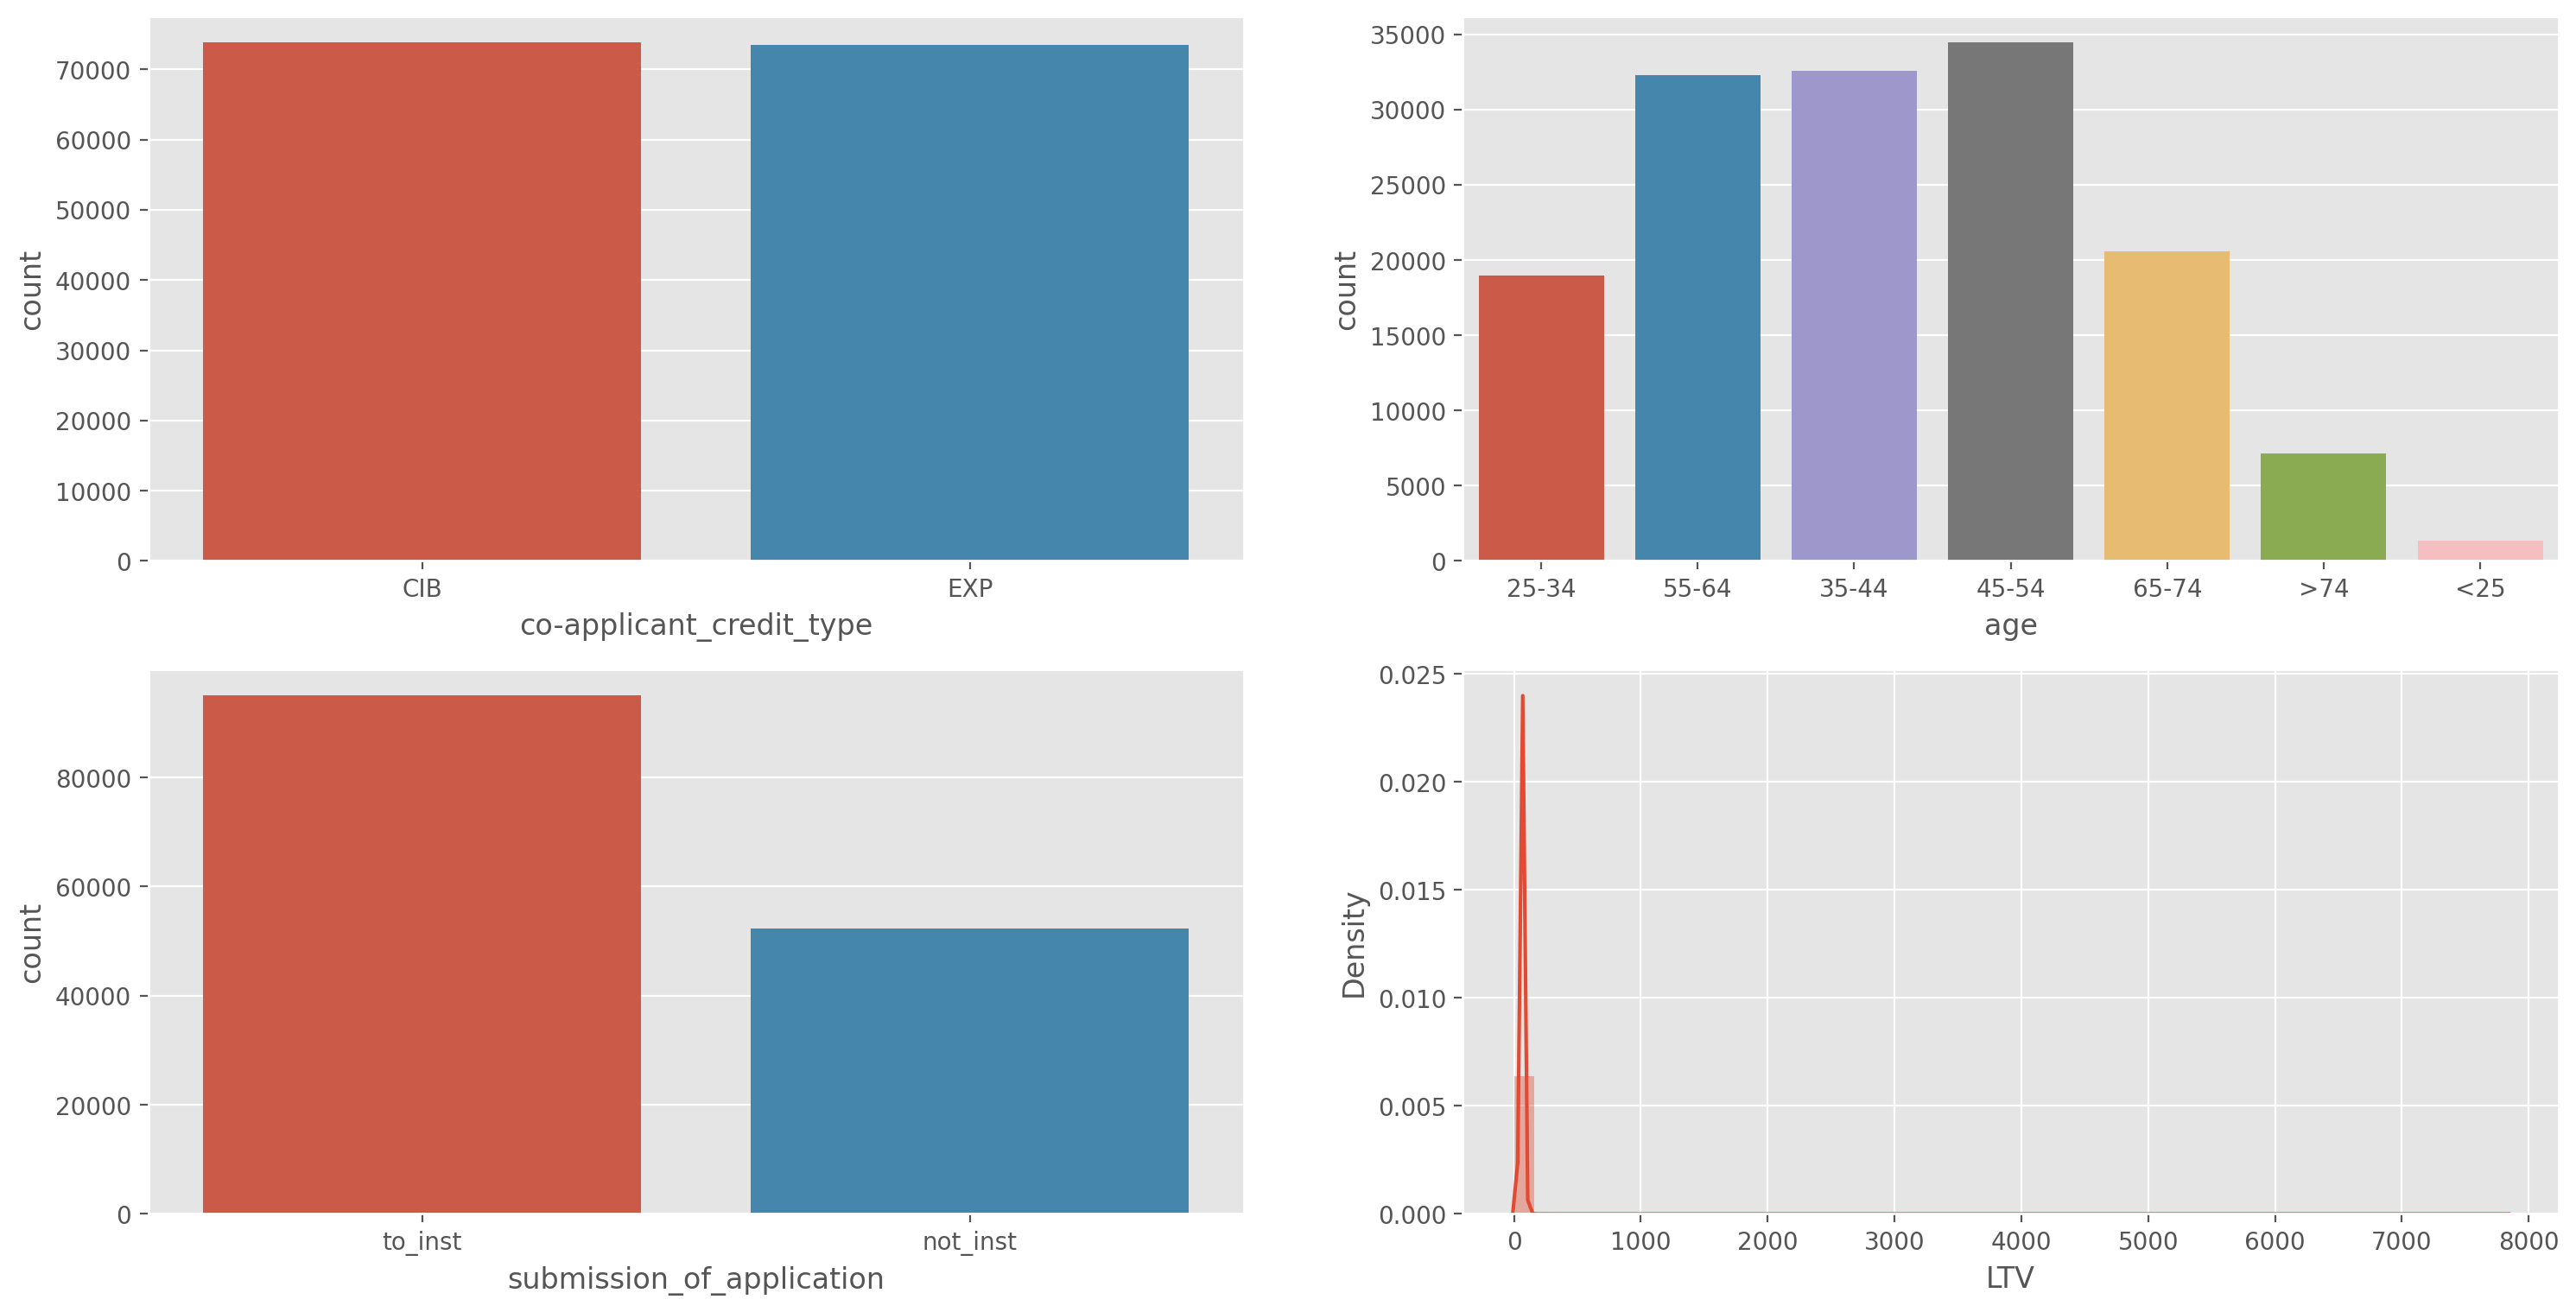

In [33]:
plt.figure(figsize = (18,9), dpi = 200)
plt.subplot(2,2,1)
sns.countplot(data['co-applicant_credit_type'])
plt.subplot(2,2,2)
sns.countplot(data['age'])
plt.subplot(2,2,3)
sns.countplot(data['submission_of_application'])
plt.subplot(2,2,4)
sns.distplot(data['LTV'])

<AxesSubplot:xlabel='Security_Type', ylabel='count'>

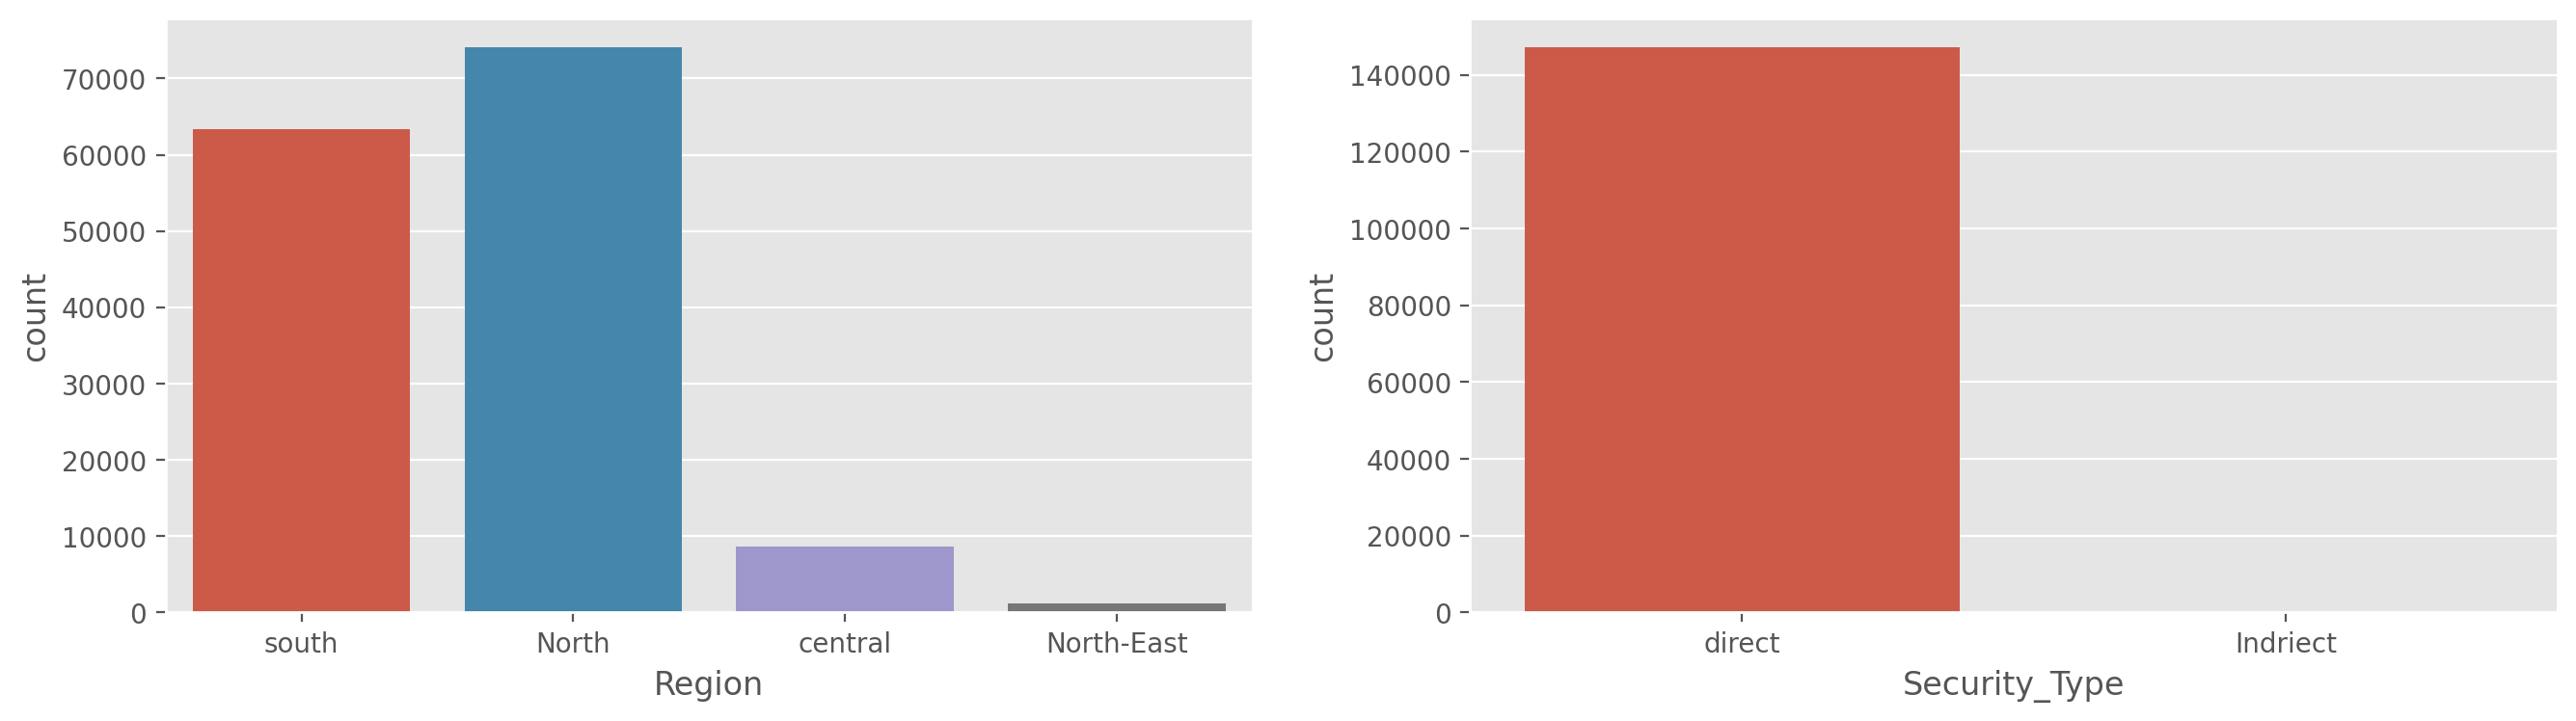

In [34]:
plt.figure(figsize = (16,4), dpi = 200)
plt.subplot(1,2,1)
sns.countplot(data['Region'])
plt.subplot(1,2,2)
sns.countplot(data['Security_Type'])

<AxesSubplot:xlabel='dtir1', ylabel='Density'>

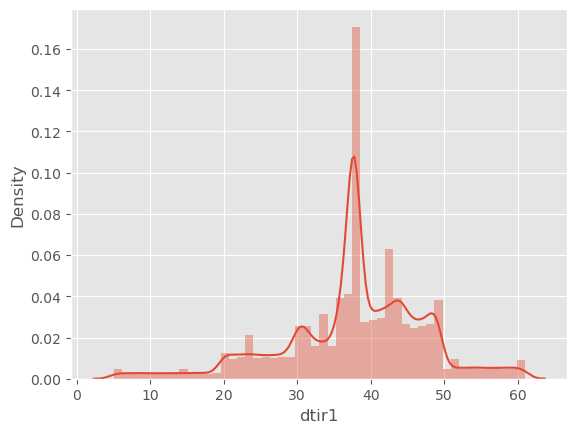

In [35]:
sns.distplot(data['dtir1'])

<AxesSubplot:xlabel='Status', ylabel='count'>

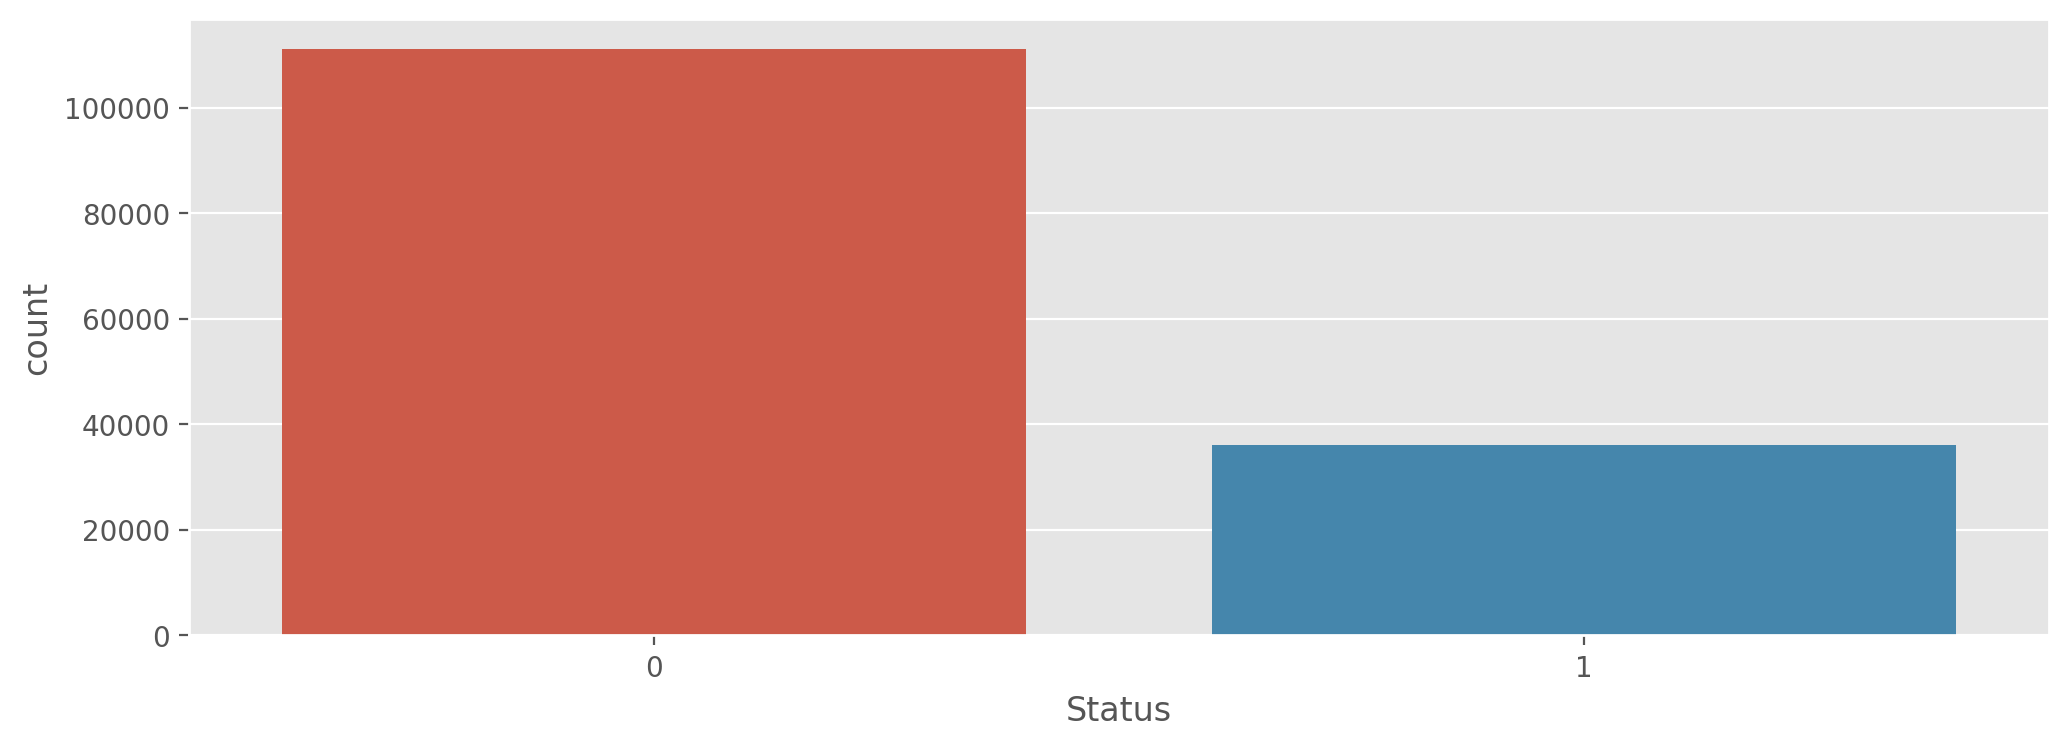

In [36]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot('Status', data = data)

### Analyzing feature w.r.t. dependent feature 

<AxesSubplot:xlabel='Status', ylabel='count'>

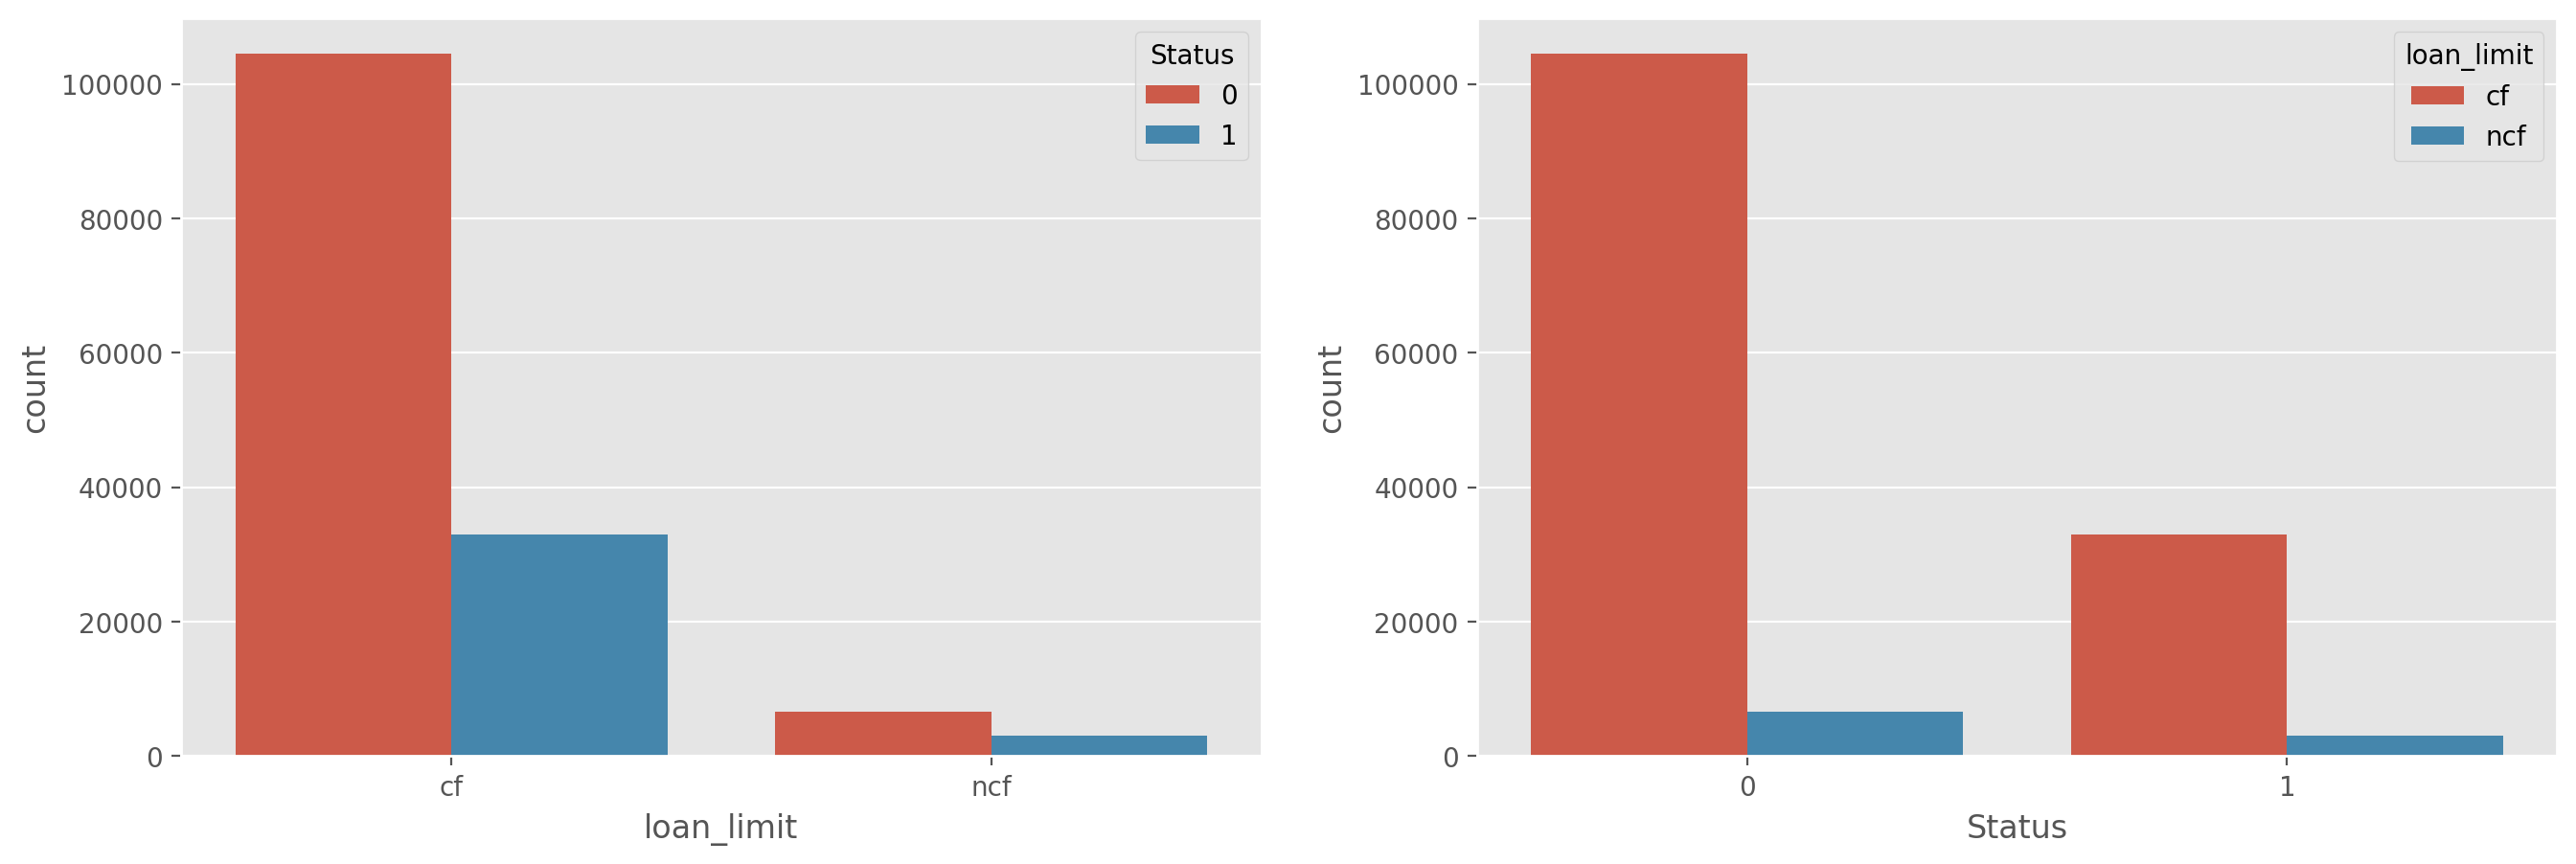

In [37]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('loan_limit', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'loan_limit',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

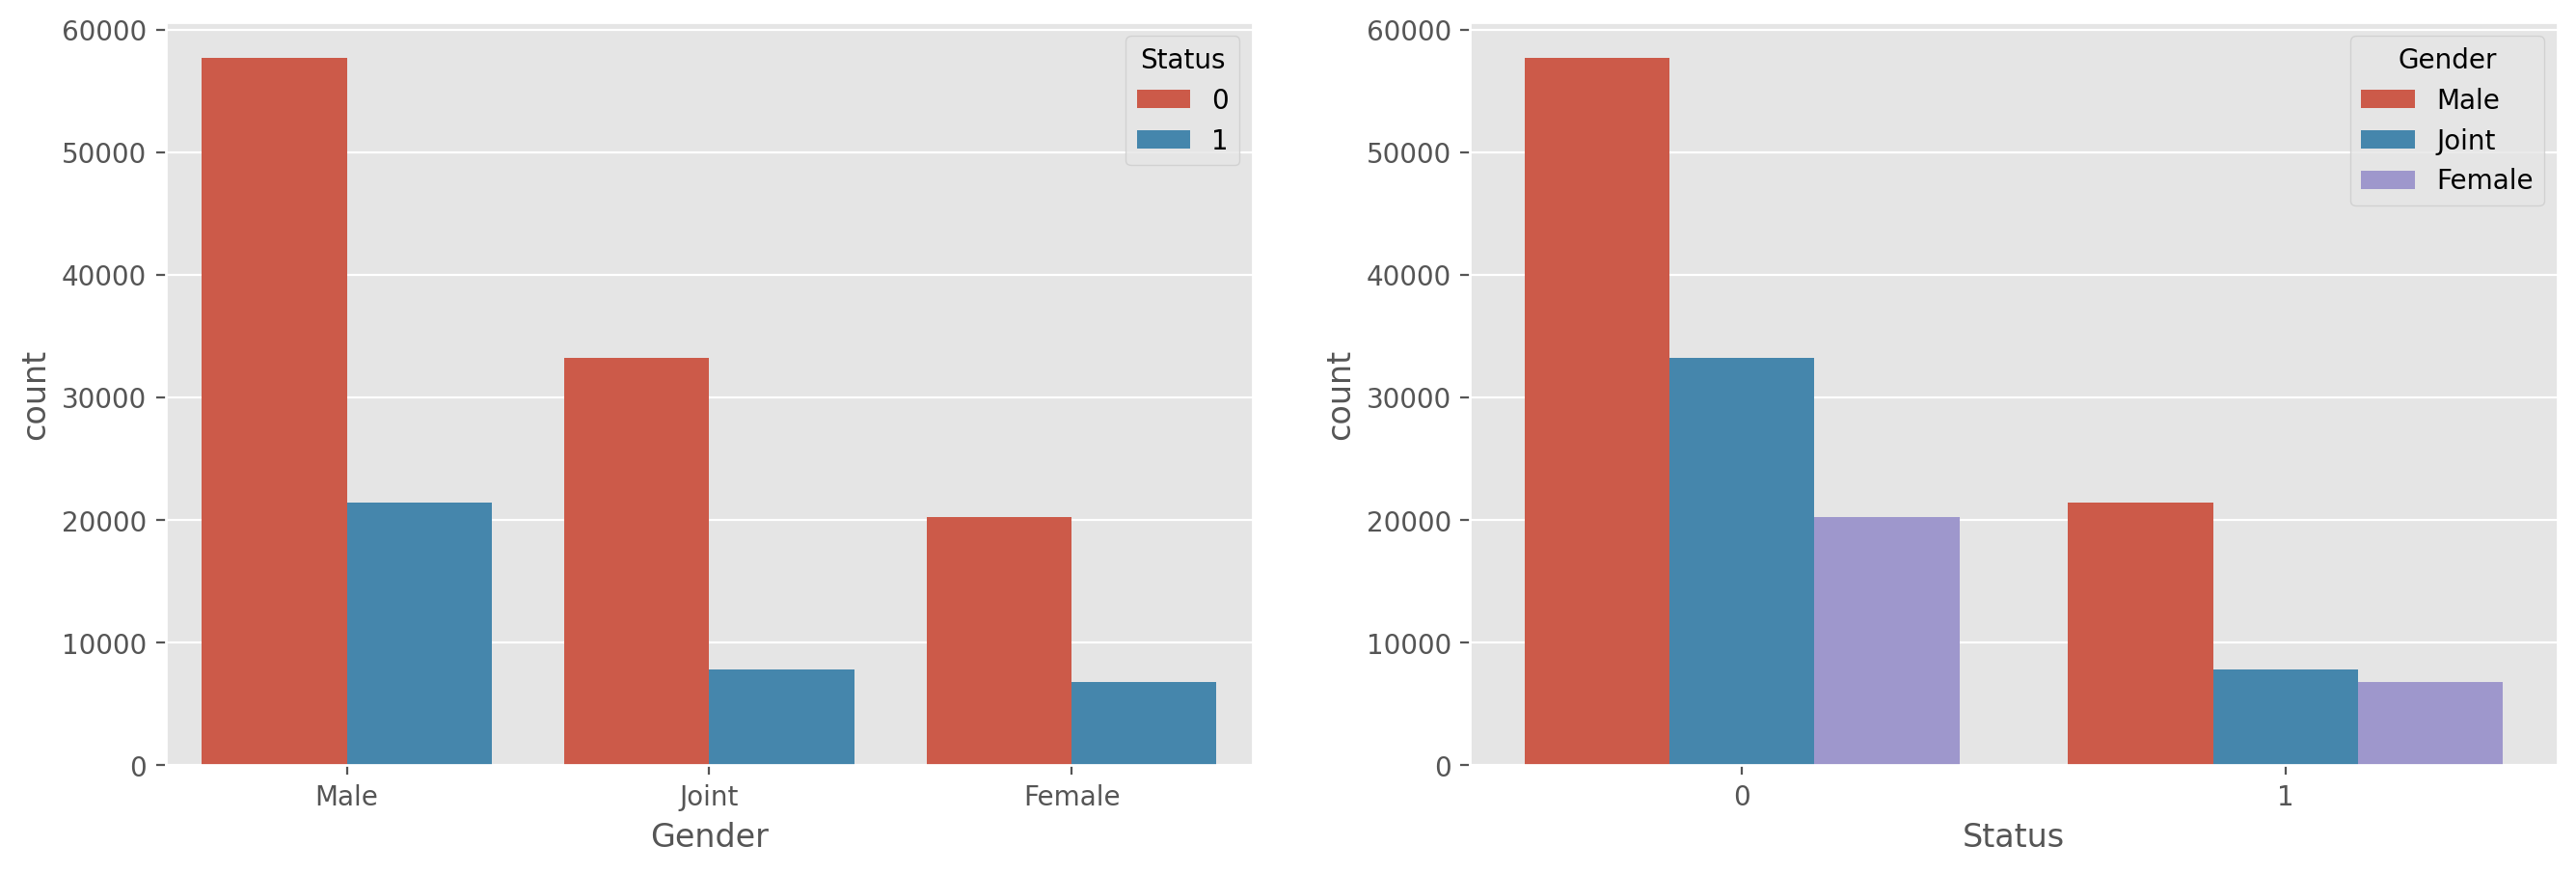

In [38]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Gender', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Gender',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

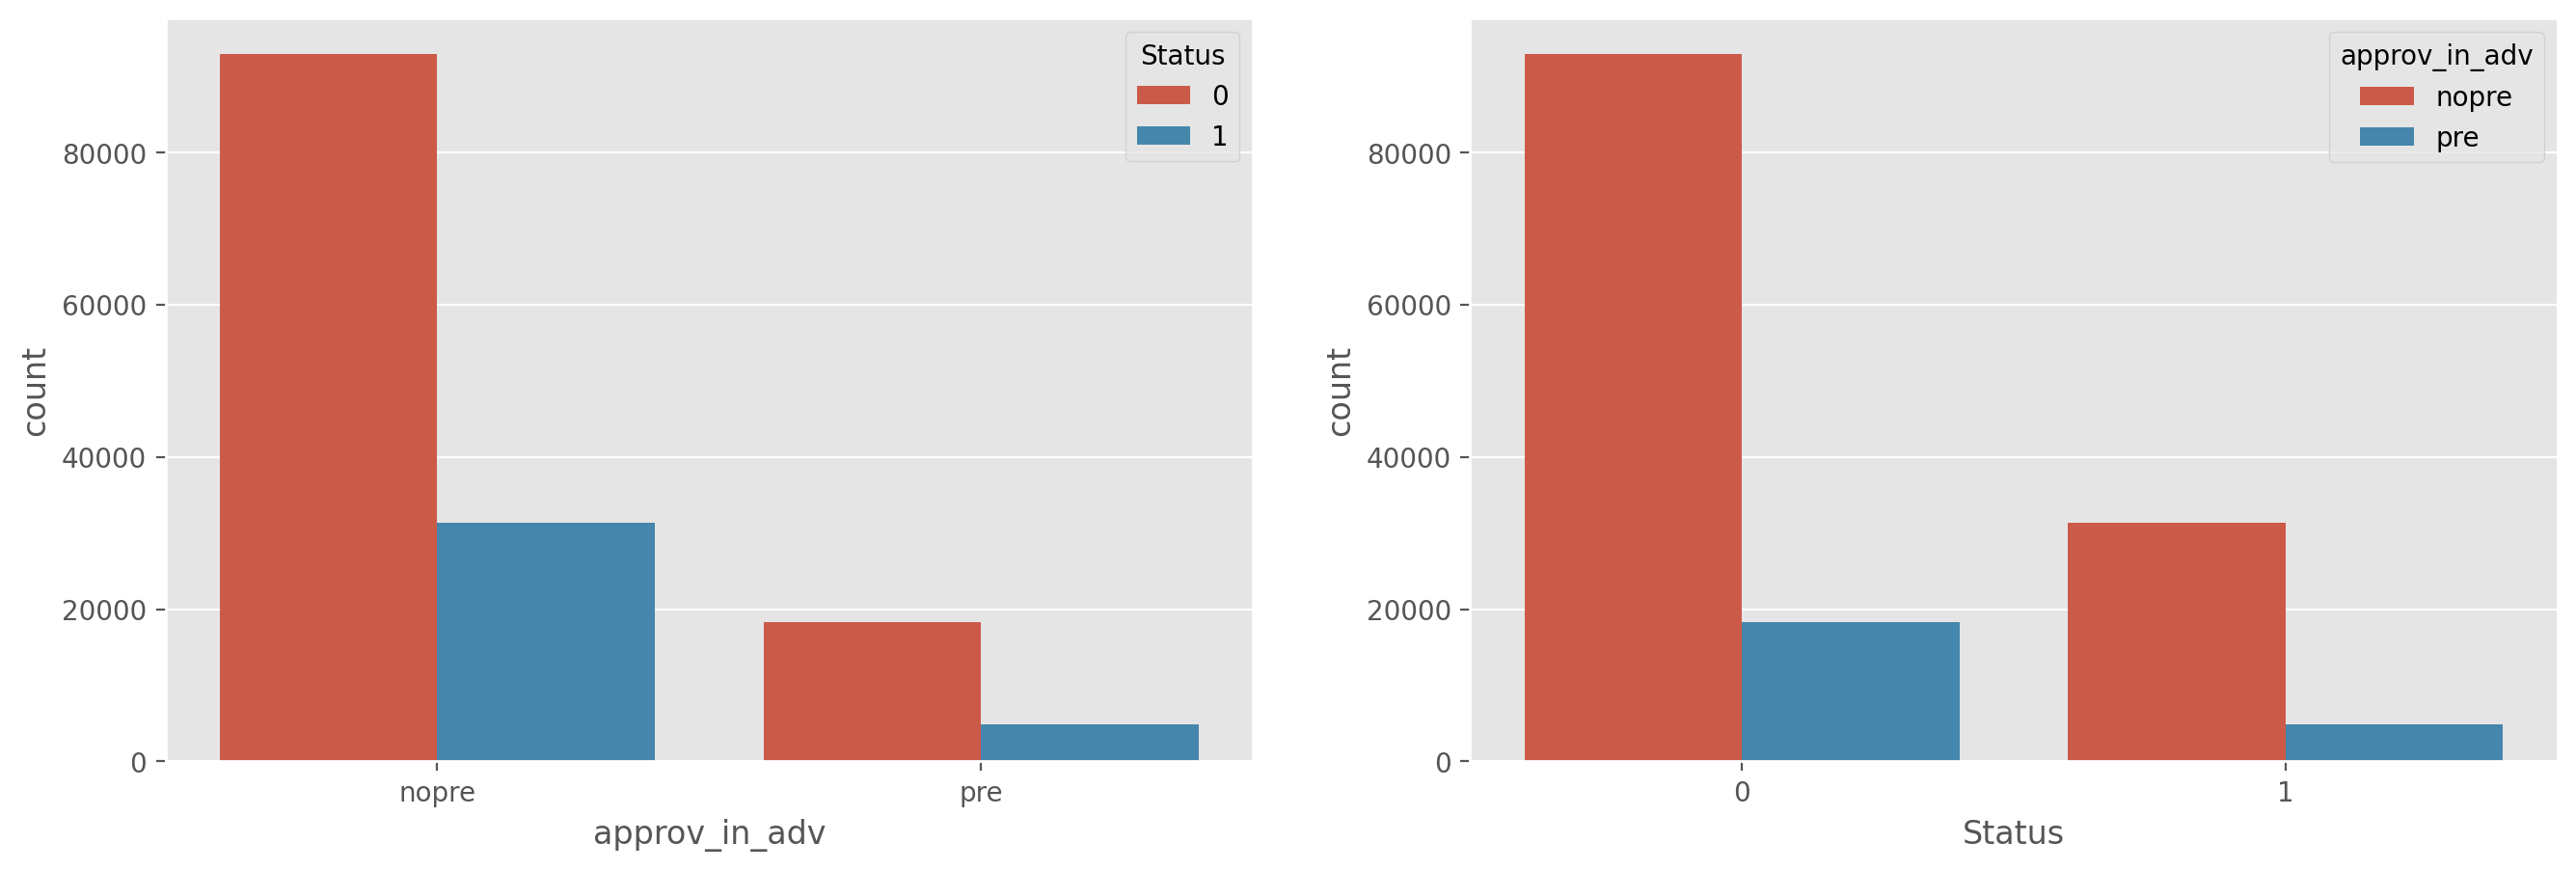

In [39]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('approv_in_adv', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'approv_in_adv',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

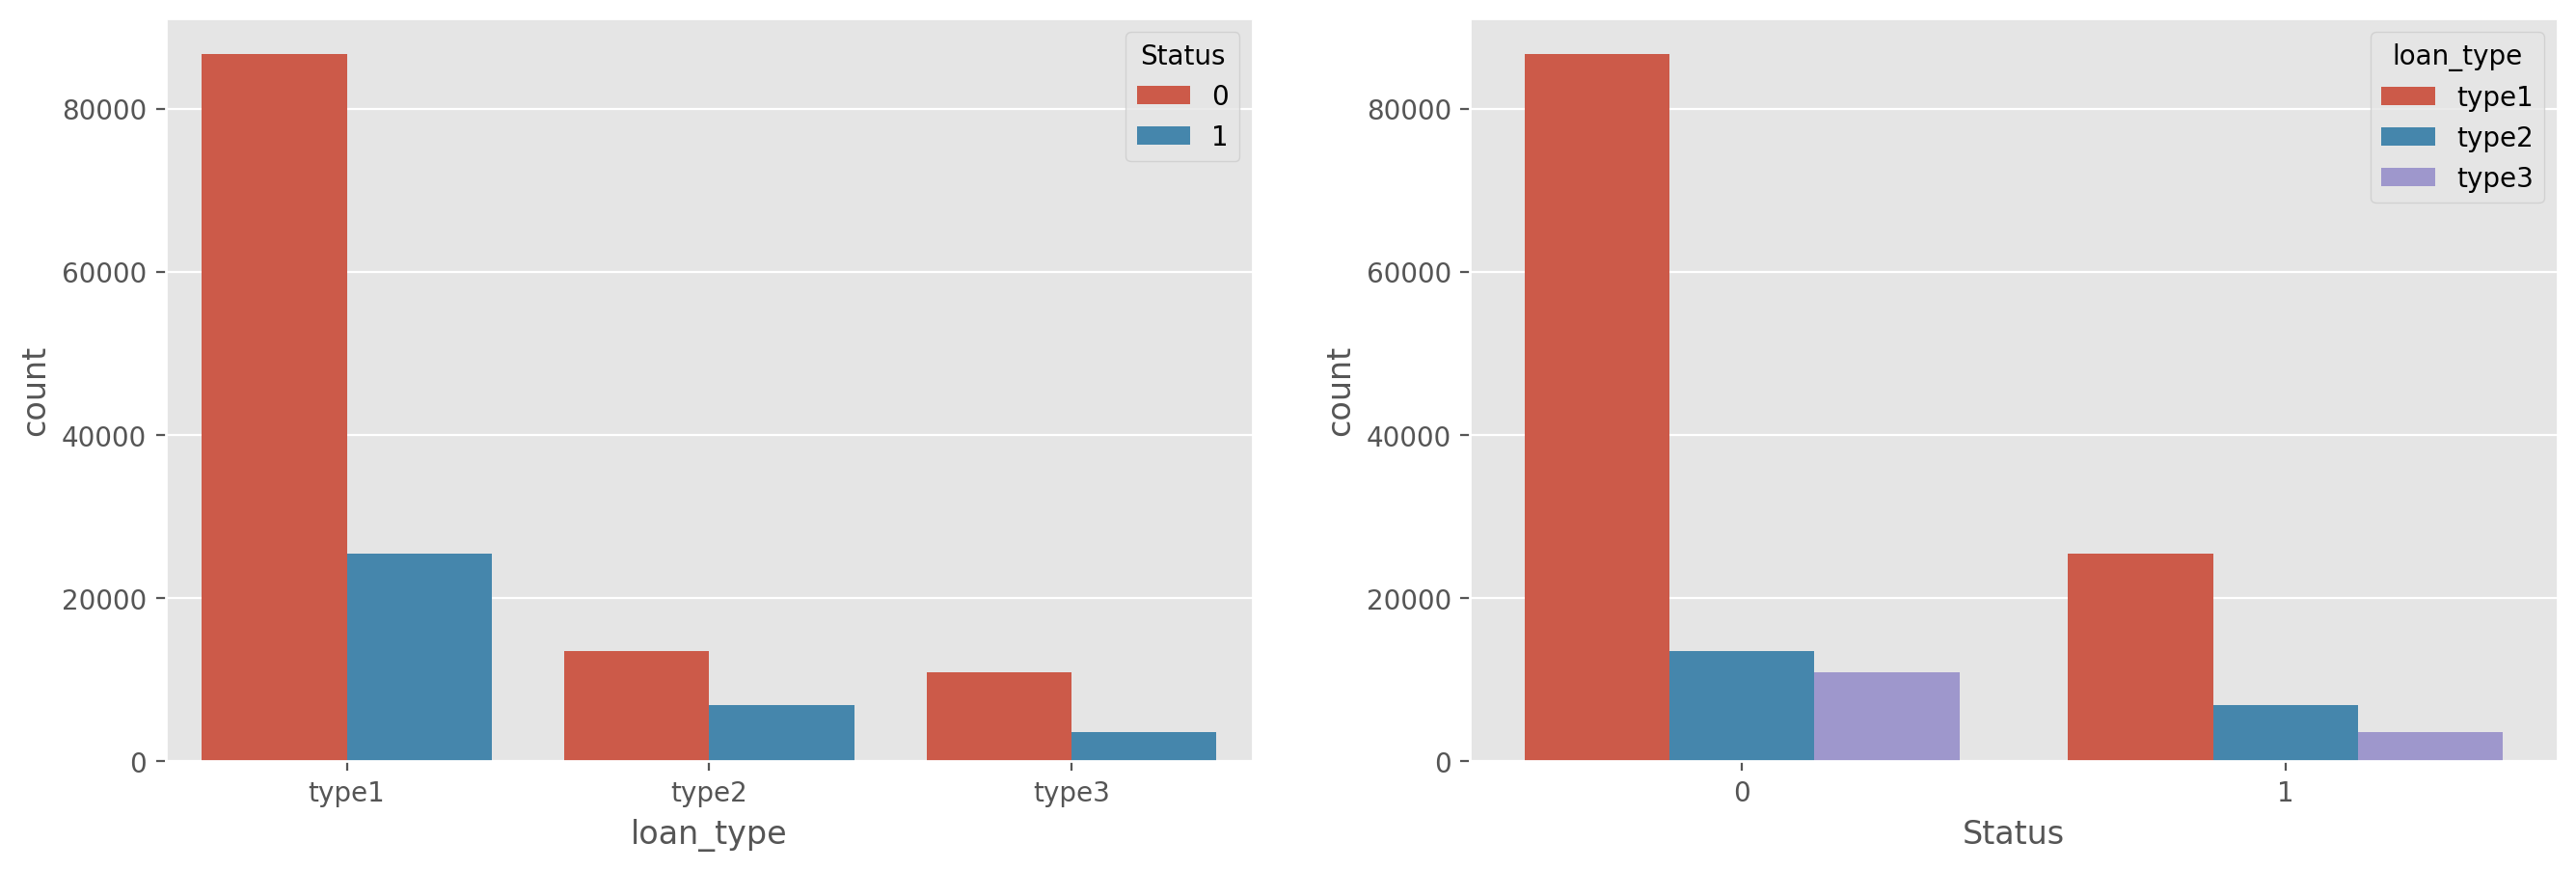

In [40]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('loan_type', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'loan_type',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

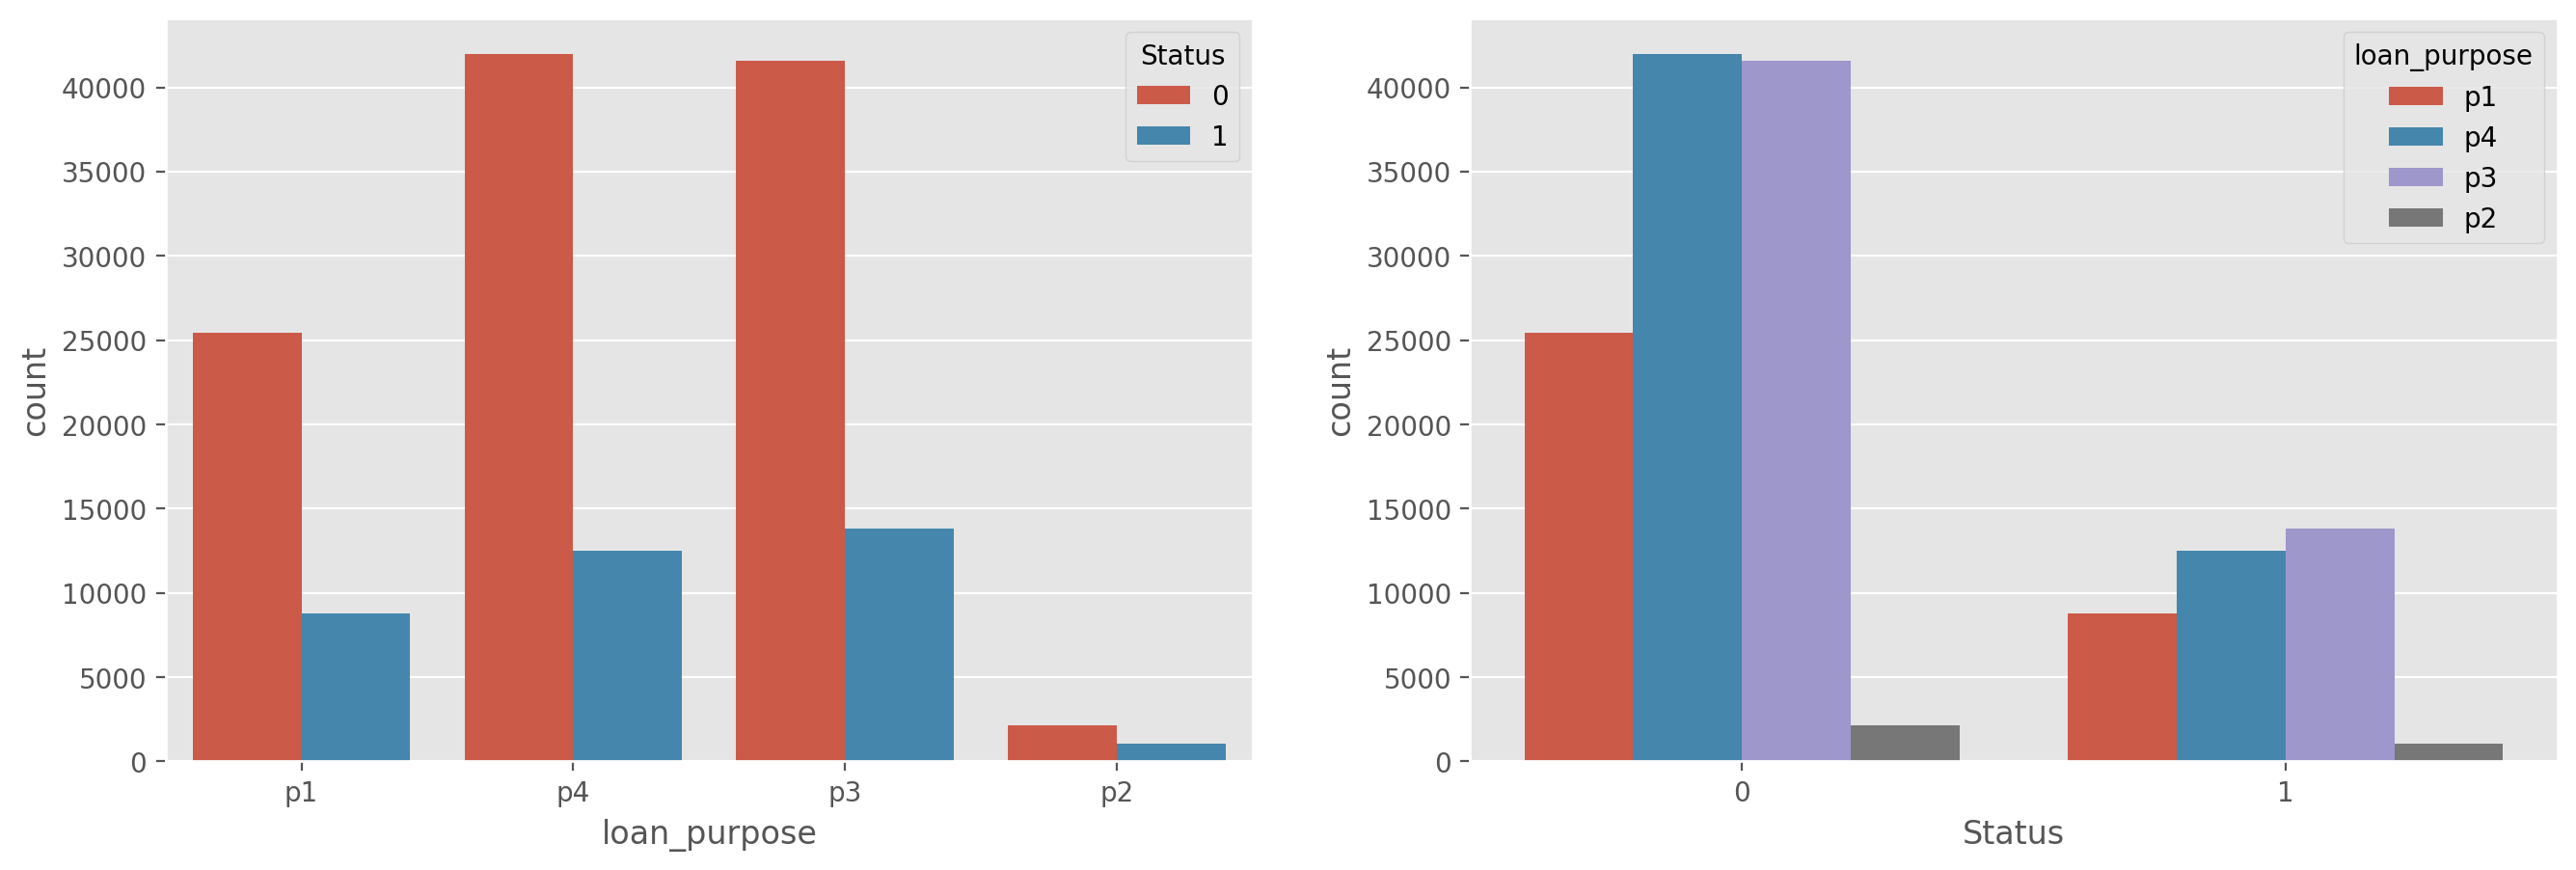

In [41]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('loan_purpose', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'loan_purpose',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

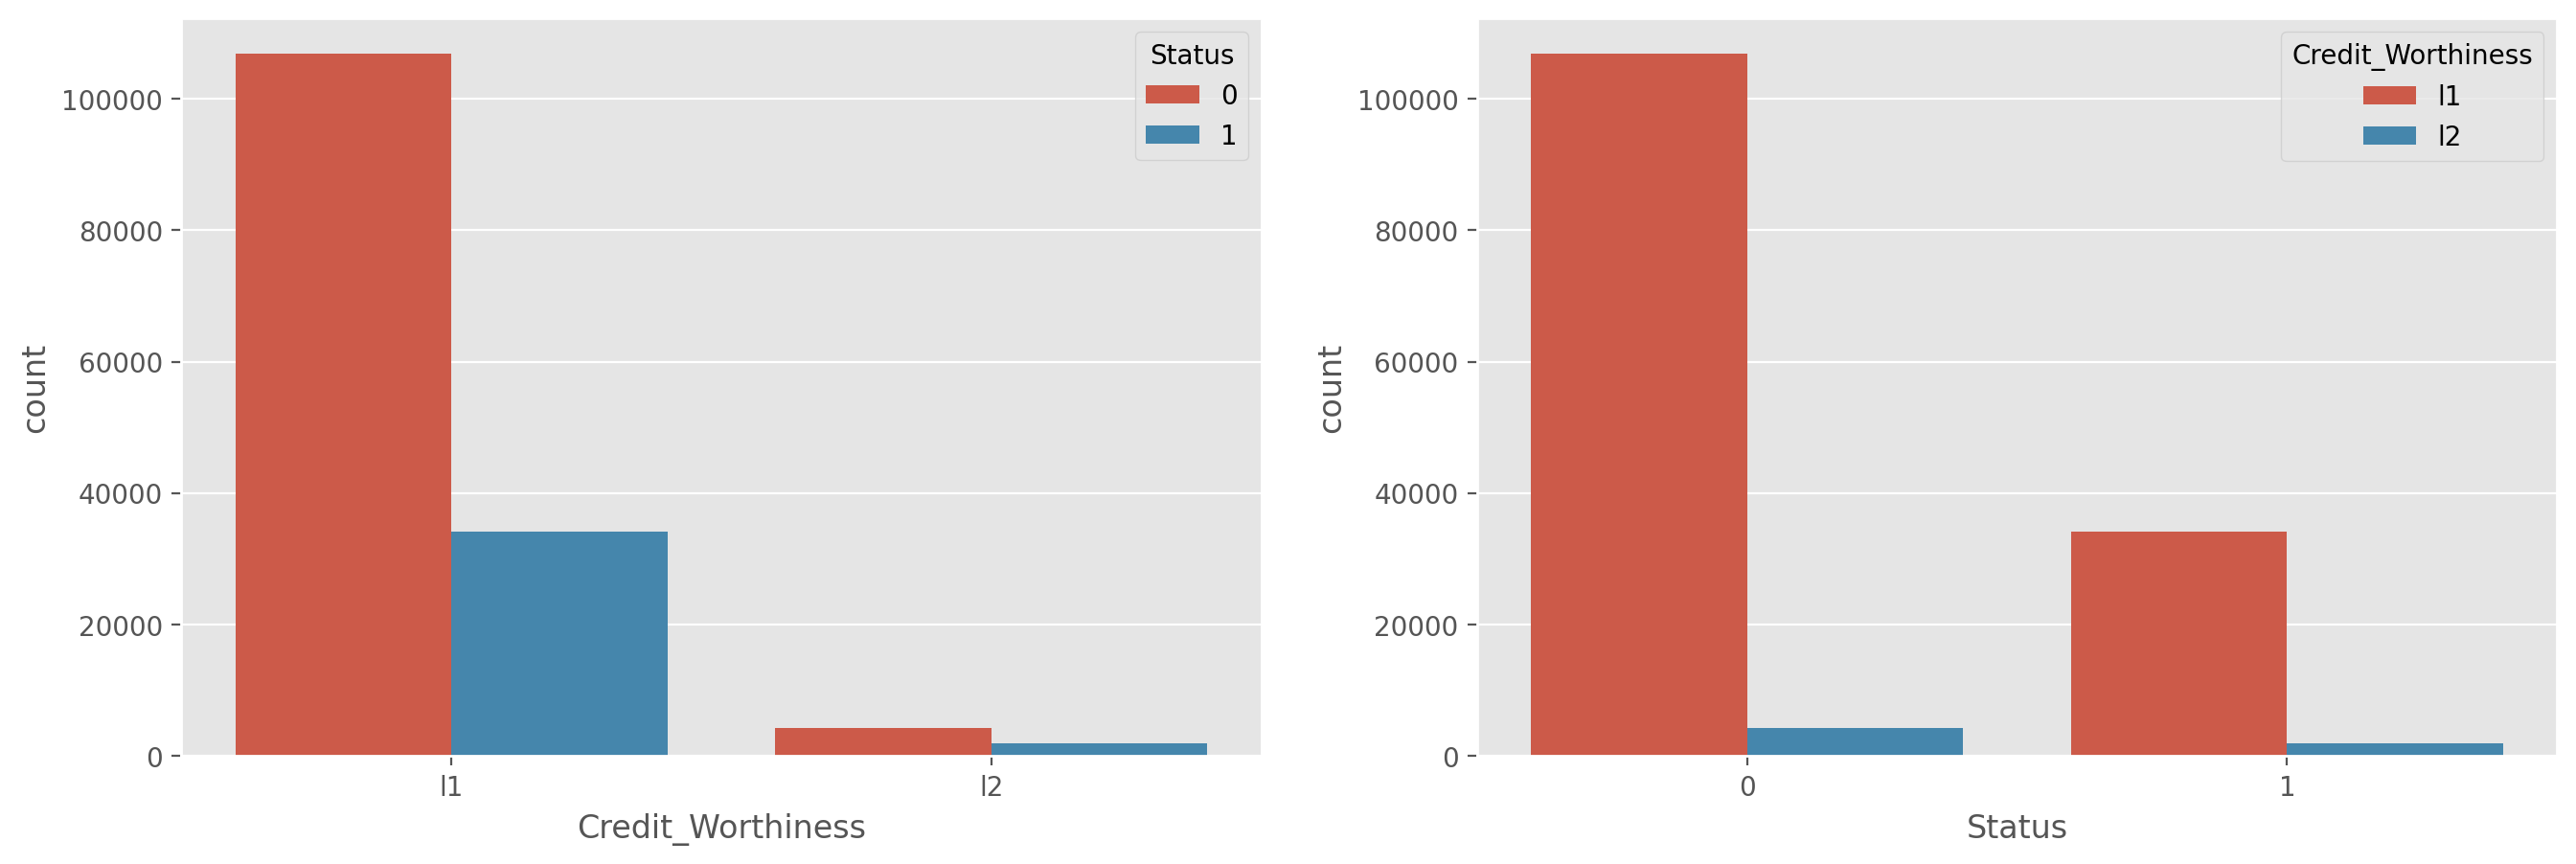

In [42]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Credit_Worthiness', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Credit_Worthiness',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

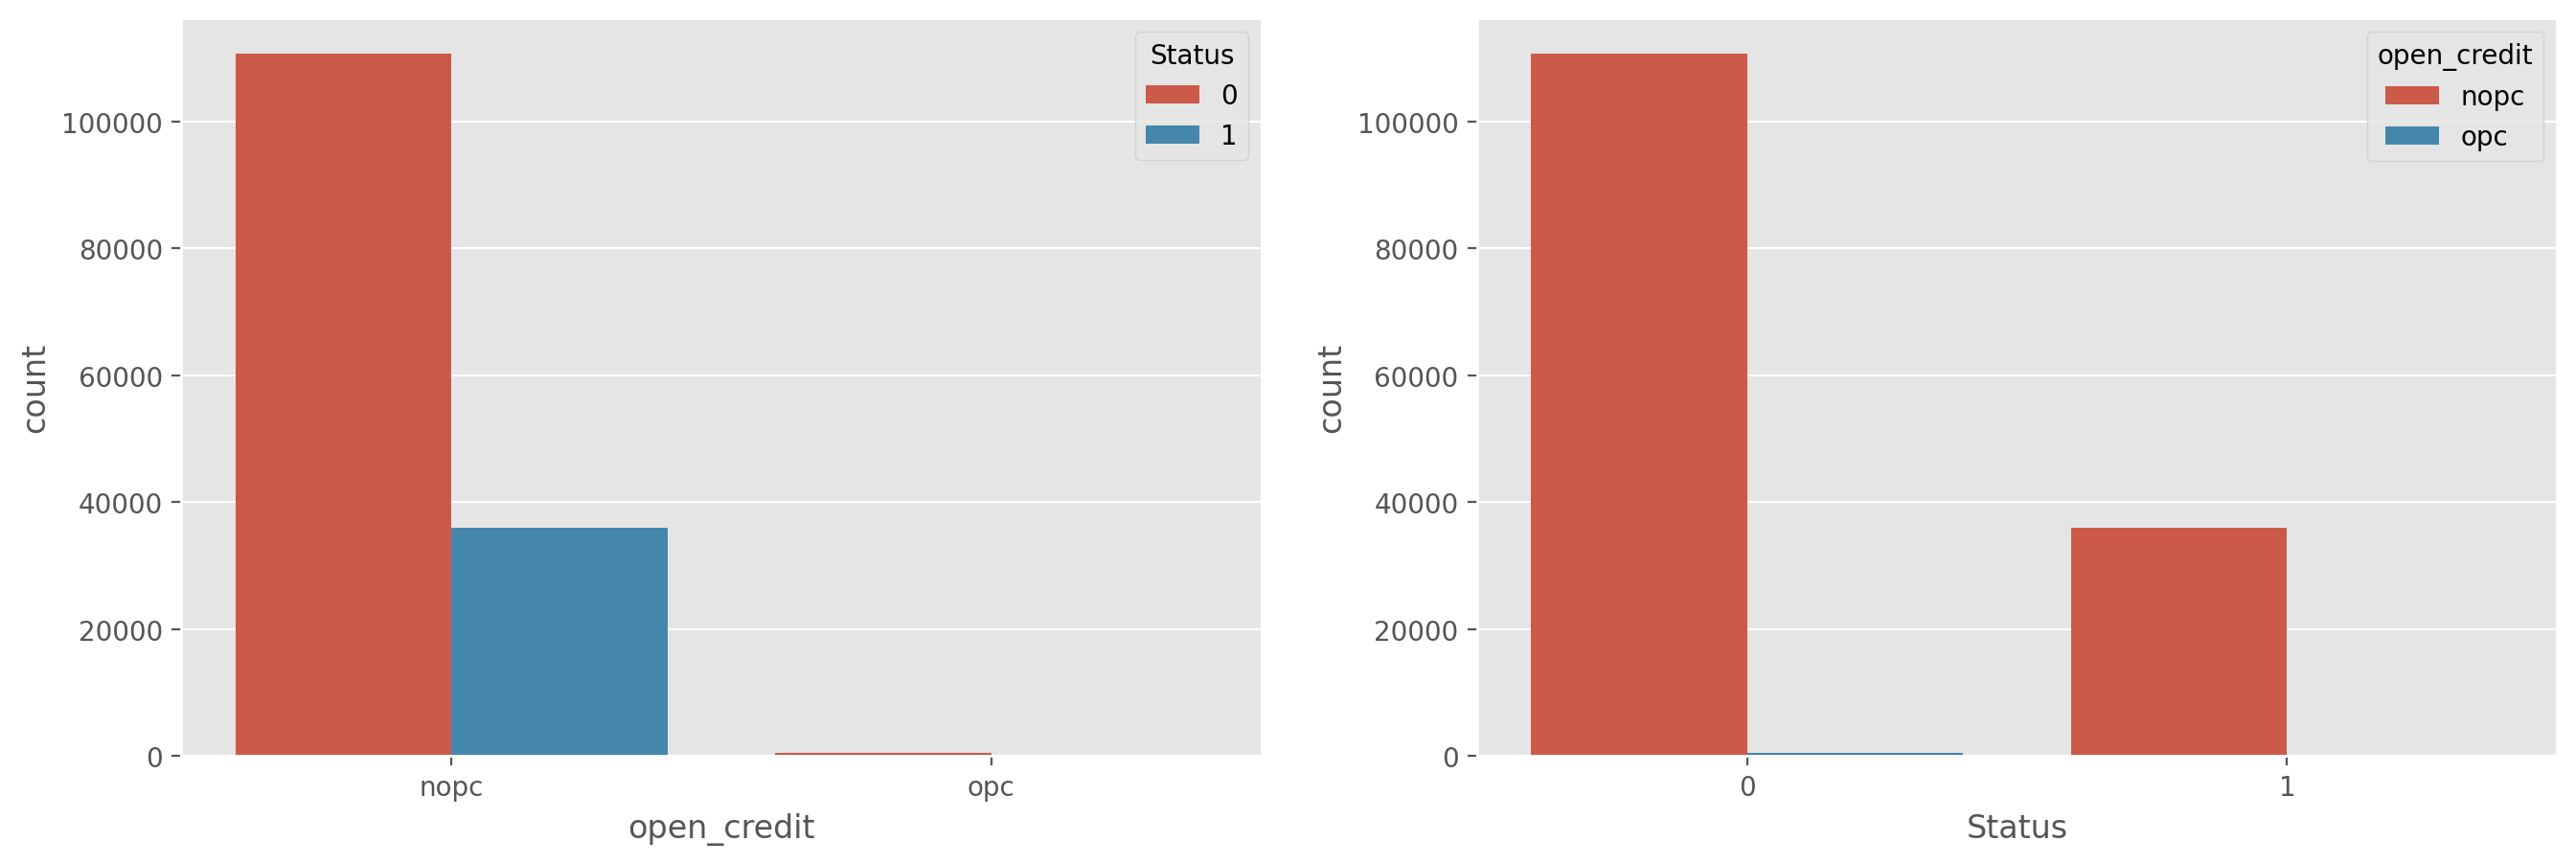

In [43]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('open_credit', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'open_credit',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

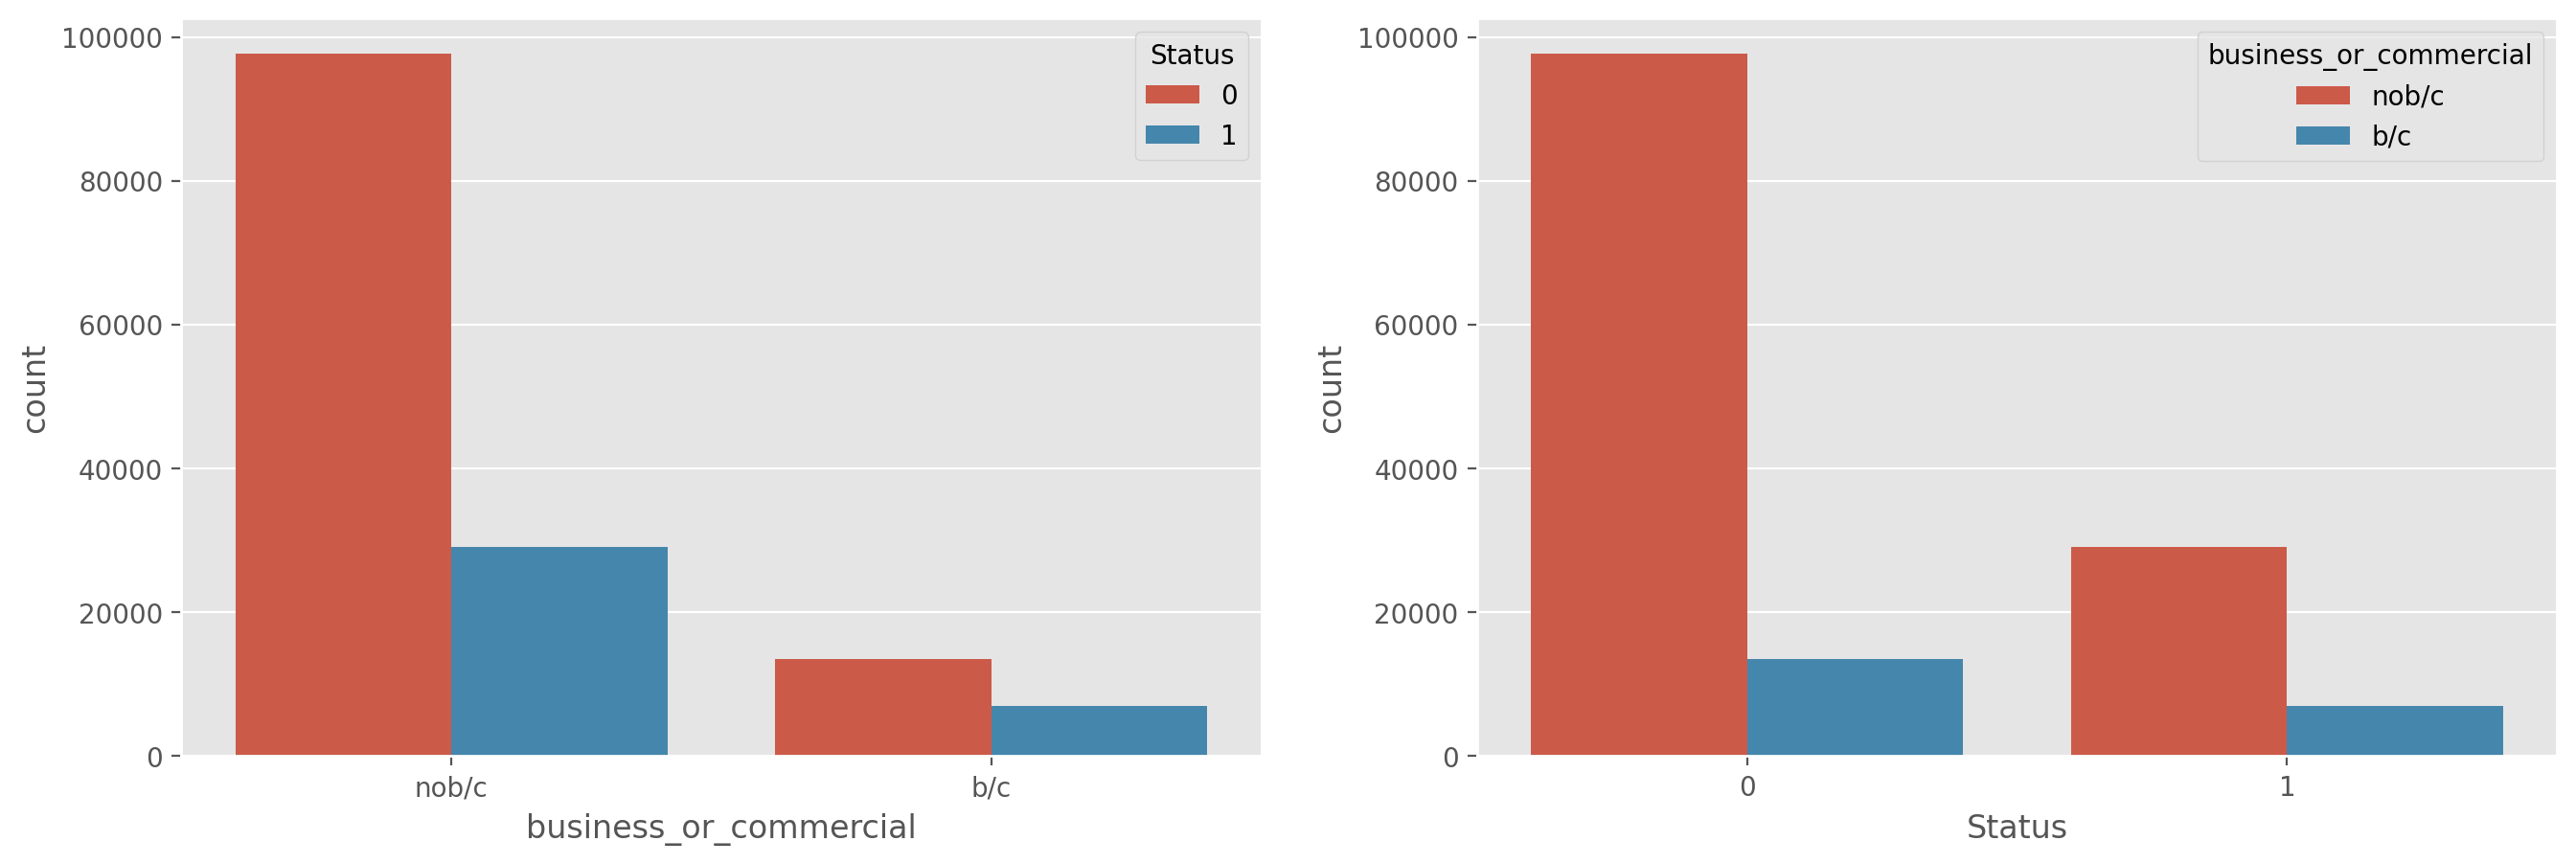

In [44]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('business_or_commercial', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'business_or_commercial',  data = data)

<AxesSubplot:xlabel='Status', ylabel='loan_amount'>

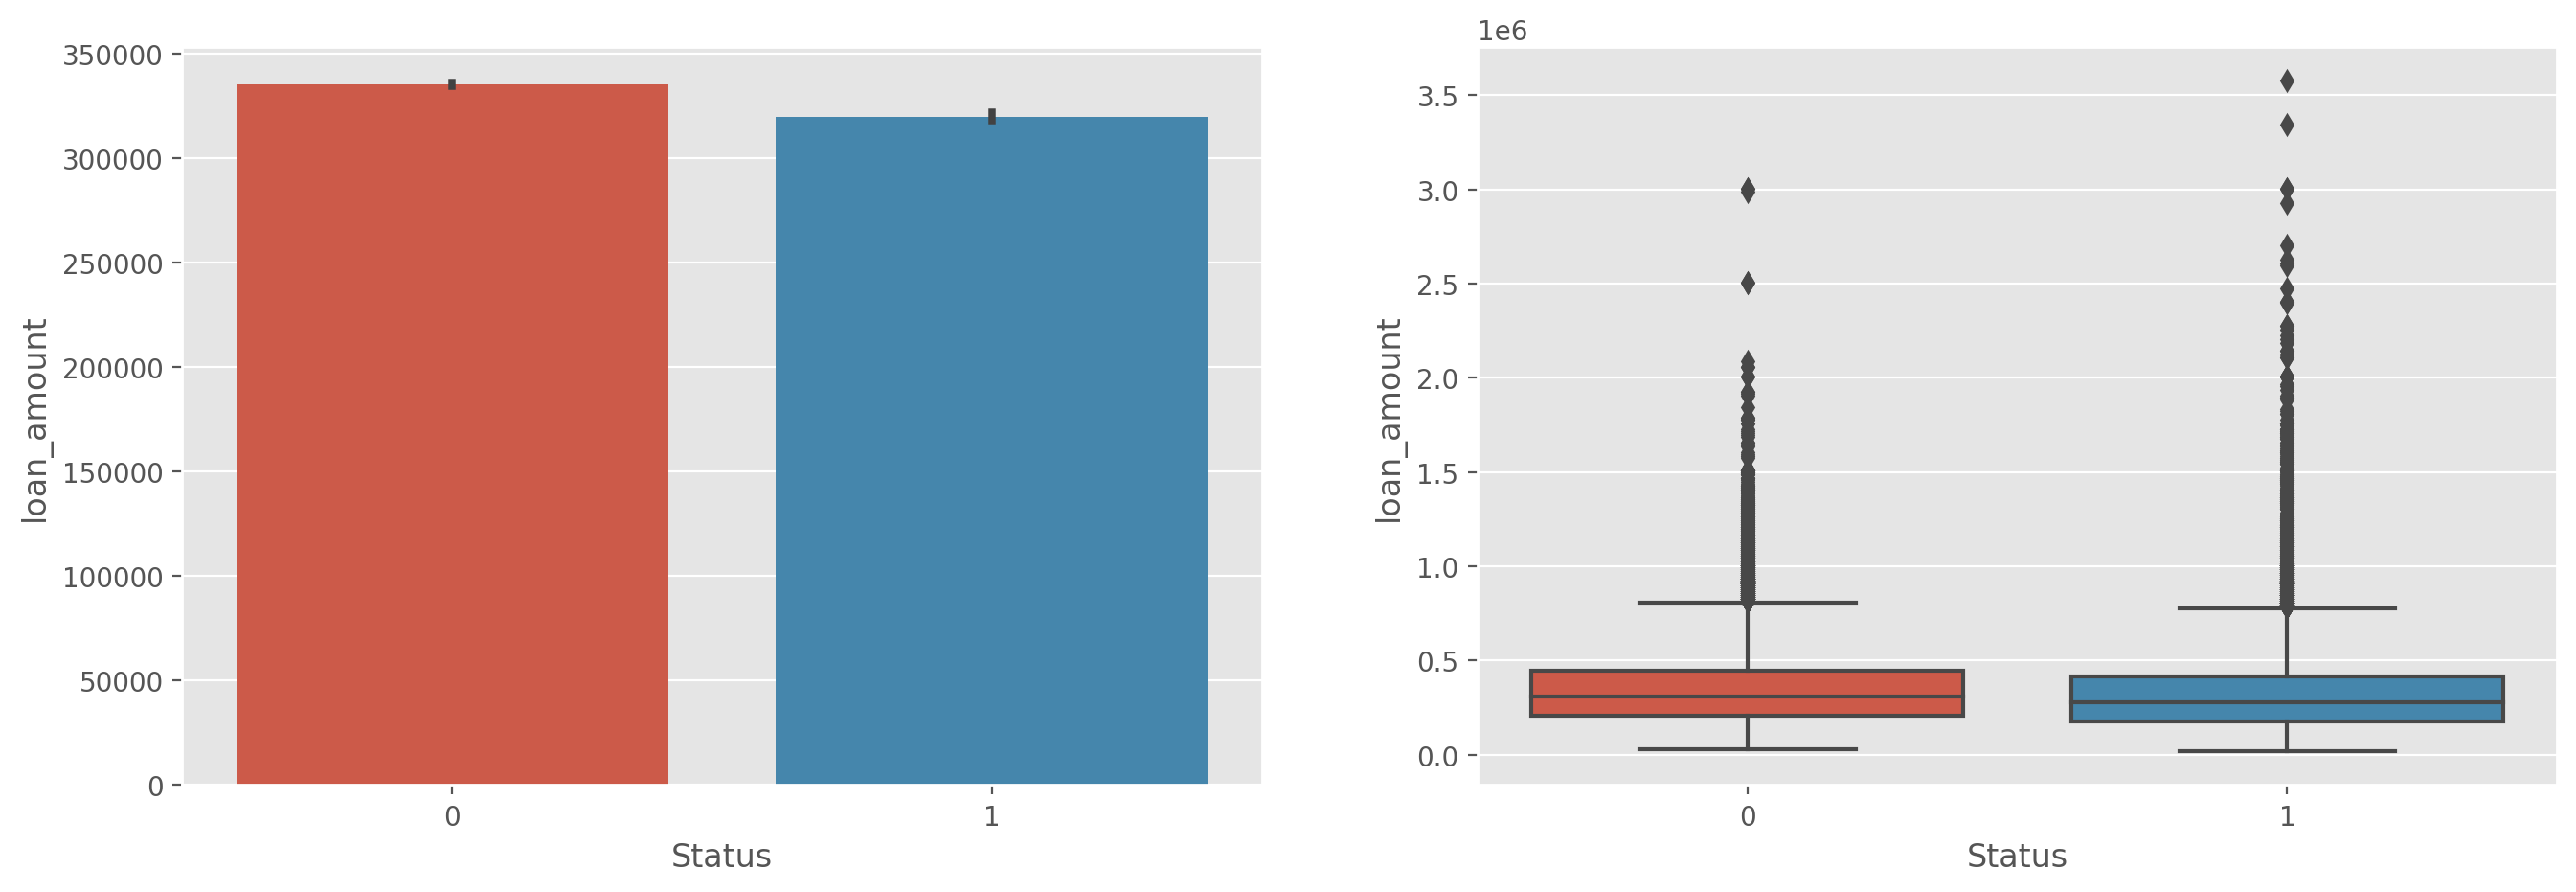

In [45]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'loan_amount',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'loan_amount',  data = data)

<AxesSubplot:xlabel='Status', ylabel='rate_of_interest'>

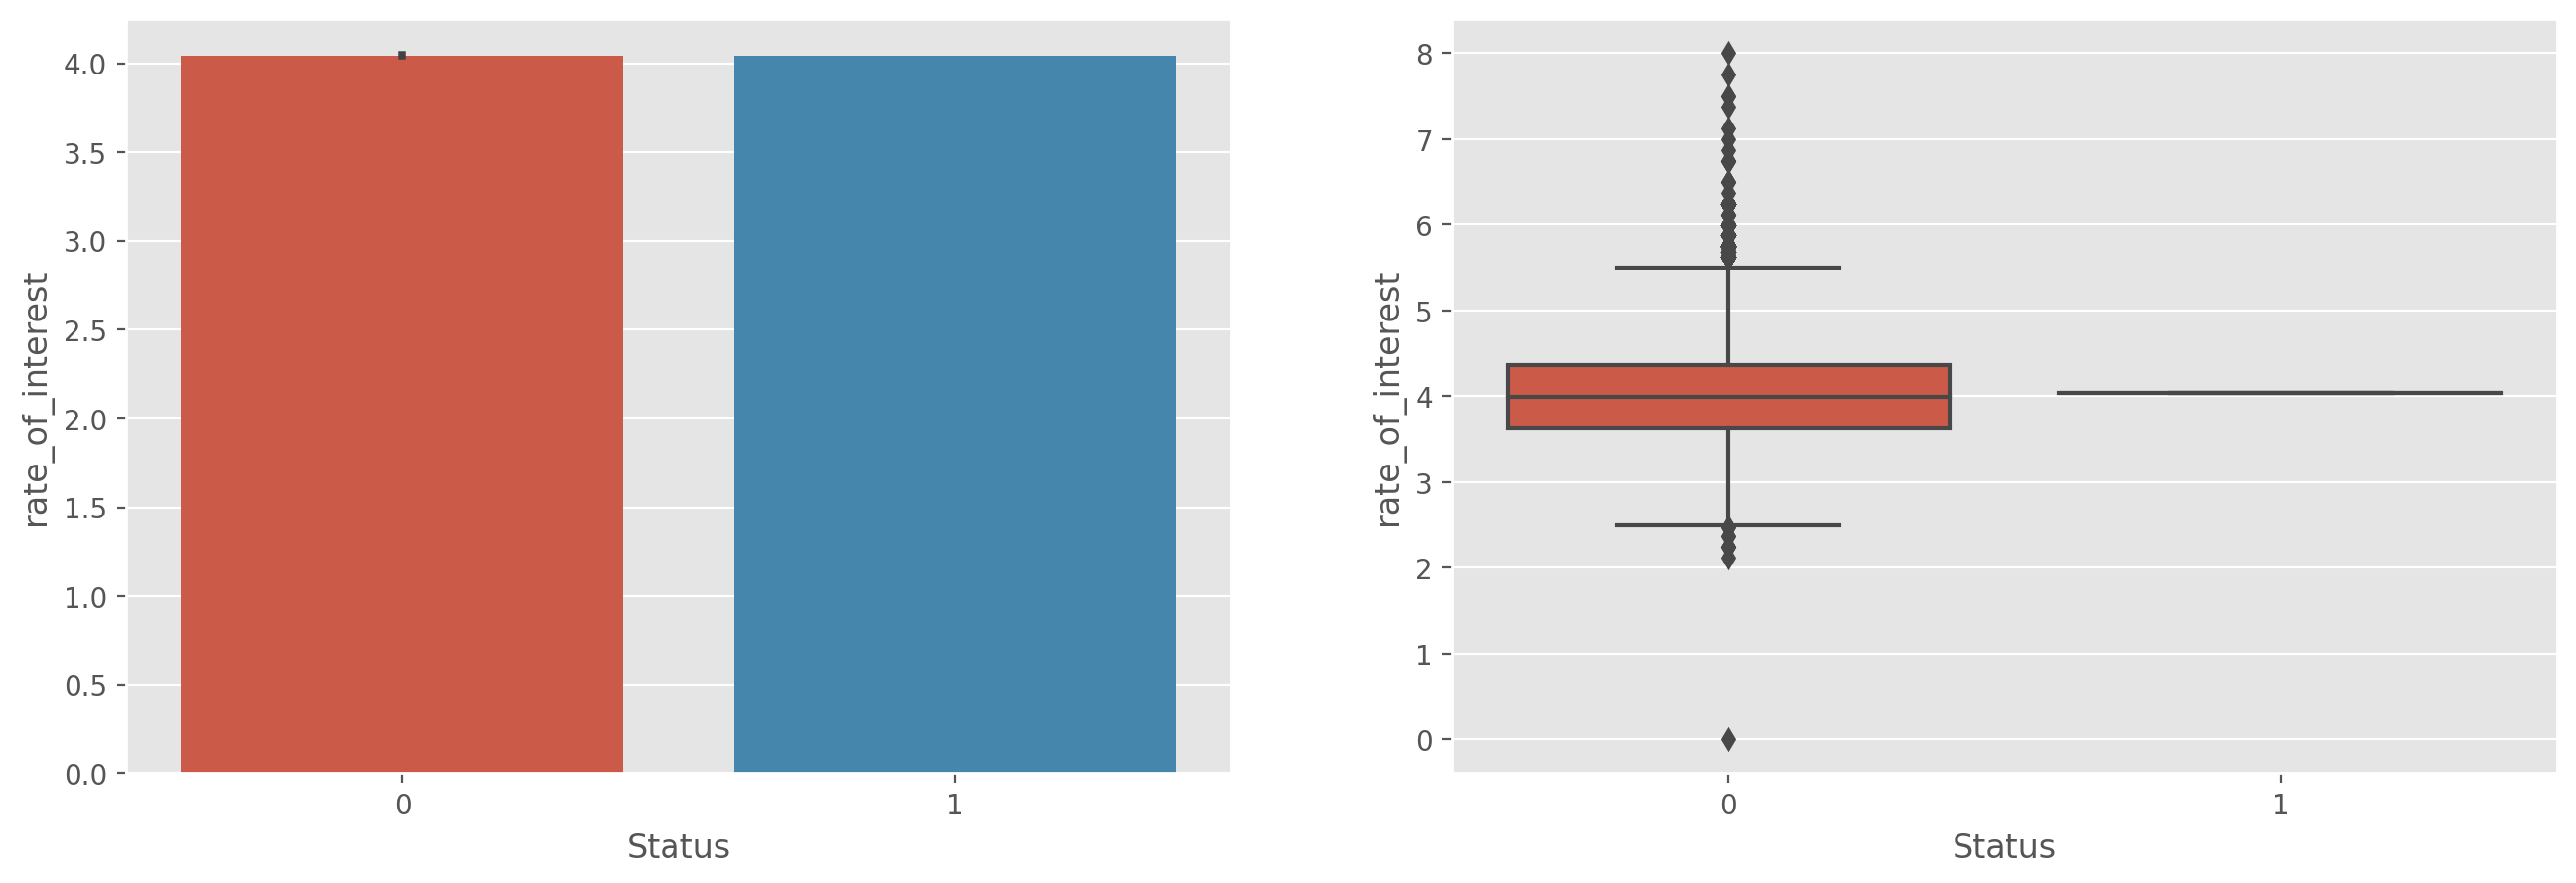

In [46]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'rate_of_interest',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'rate_of_interest',  data = data)

<AxesSubplot:xlabel='Status', ylabel='Interest_rate_spread'>

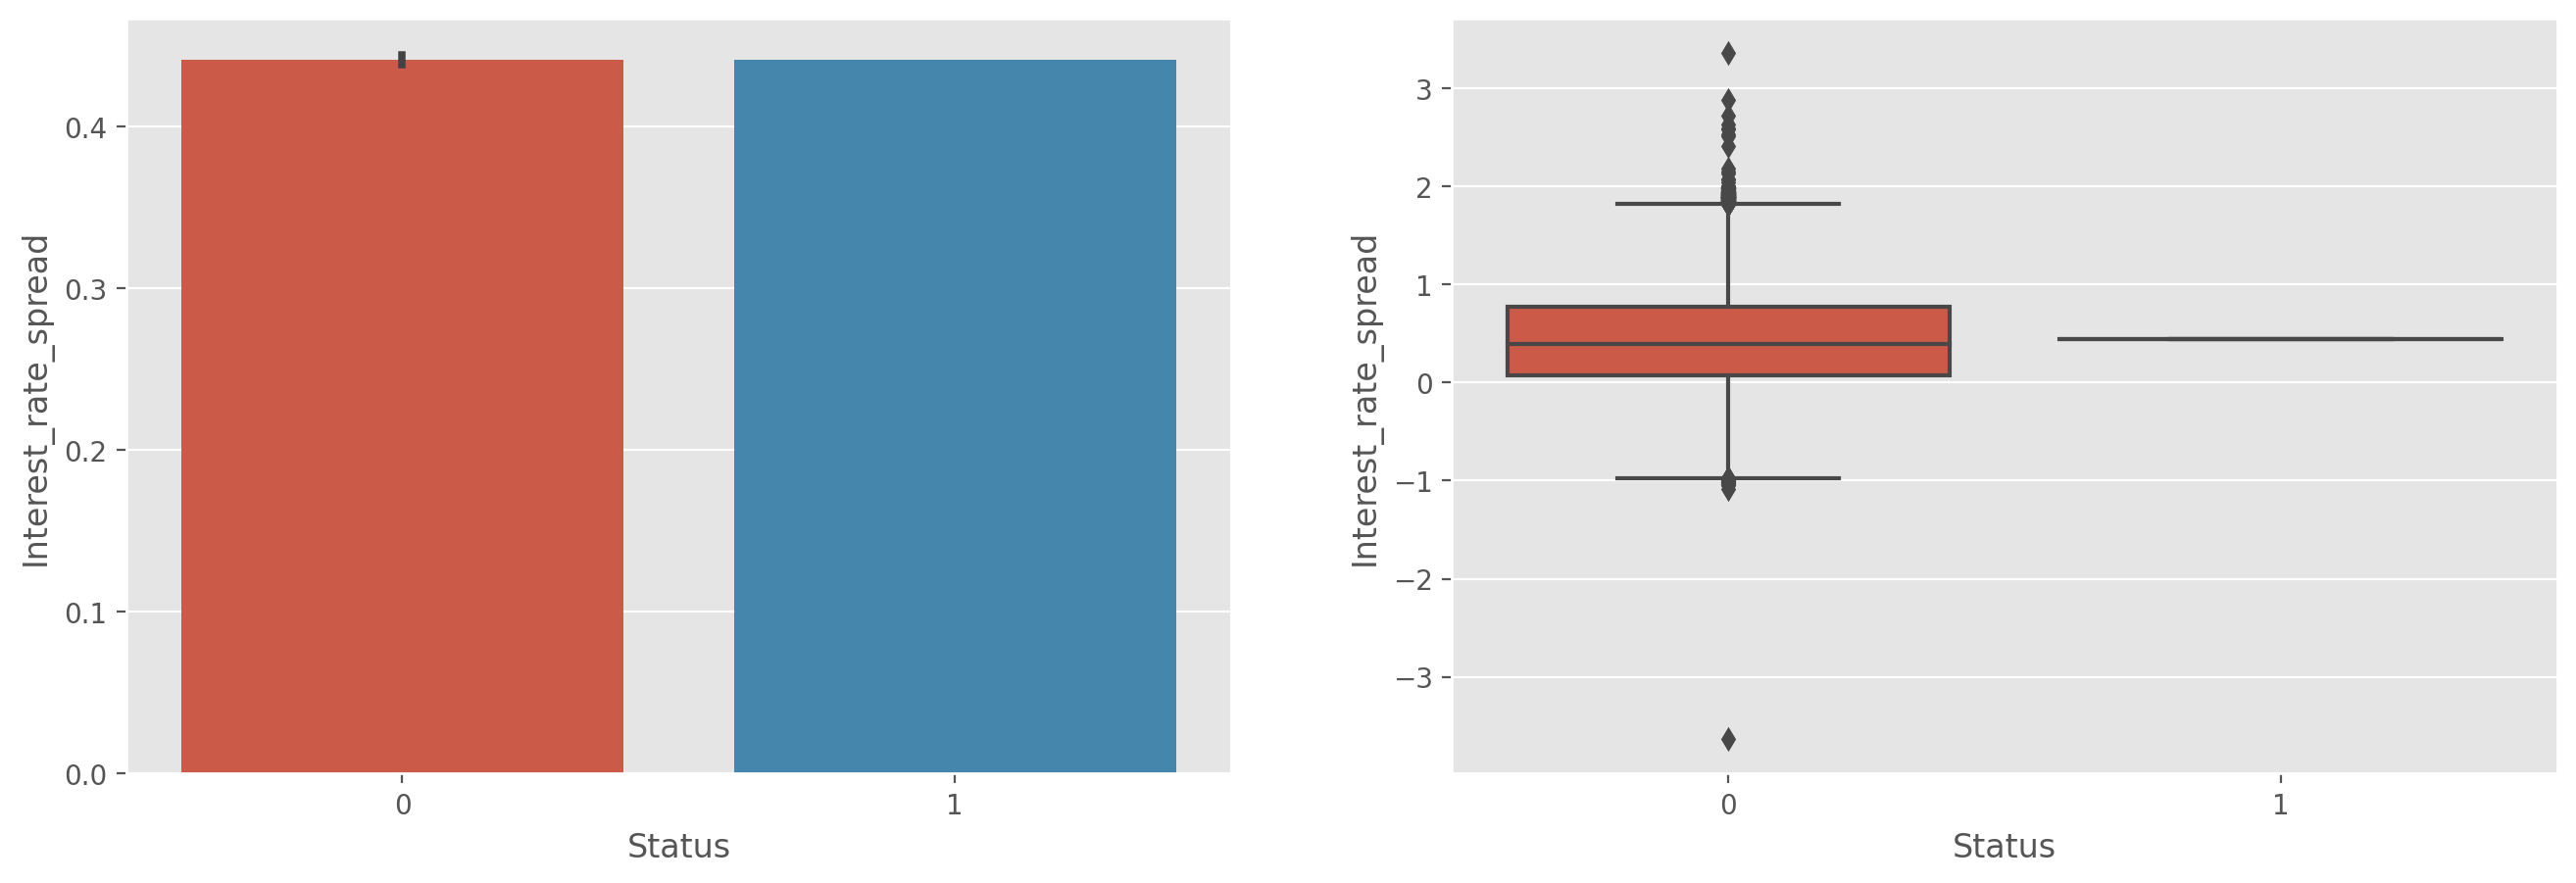

In [47]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'Interest_rate_spread',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'Interest_rate_spread',  data = data)

<AxesSubplot:xlabel='Status', ylabel='Upfront_charges'>

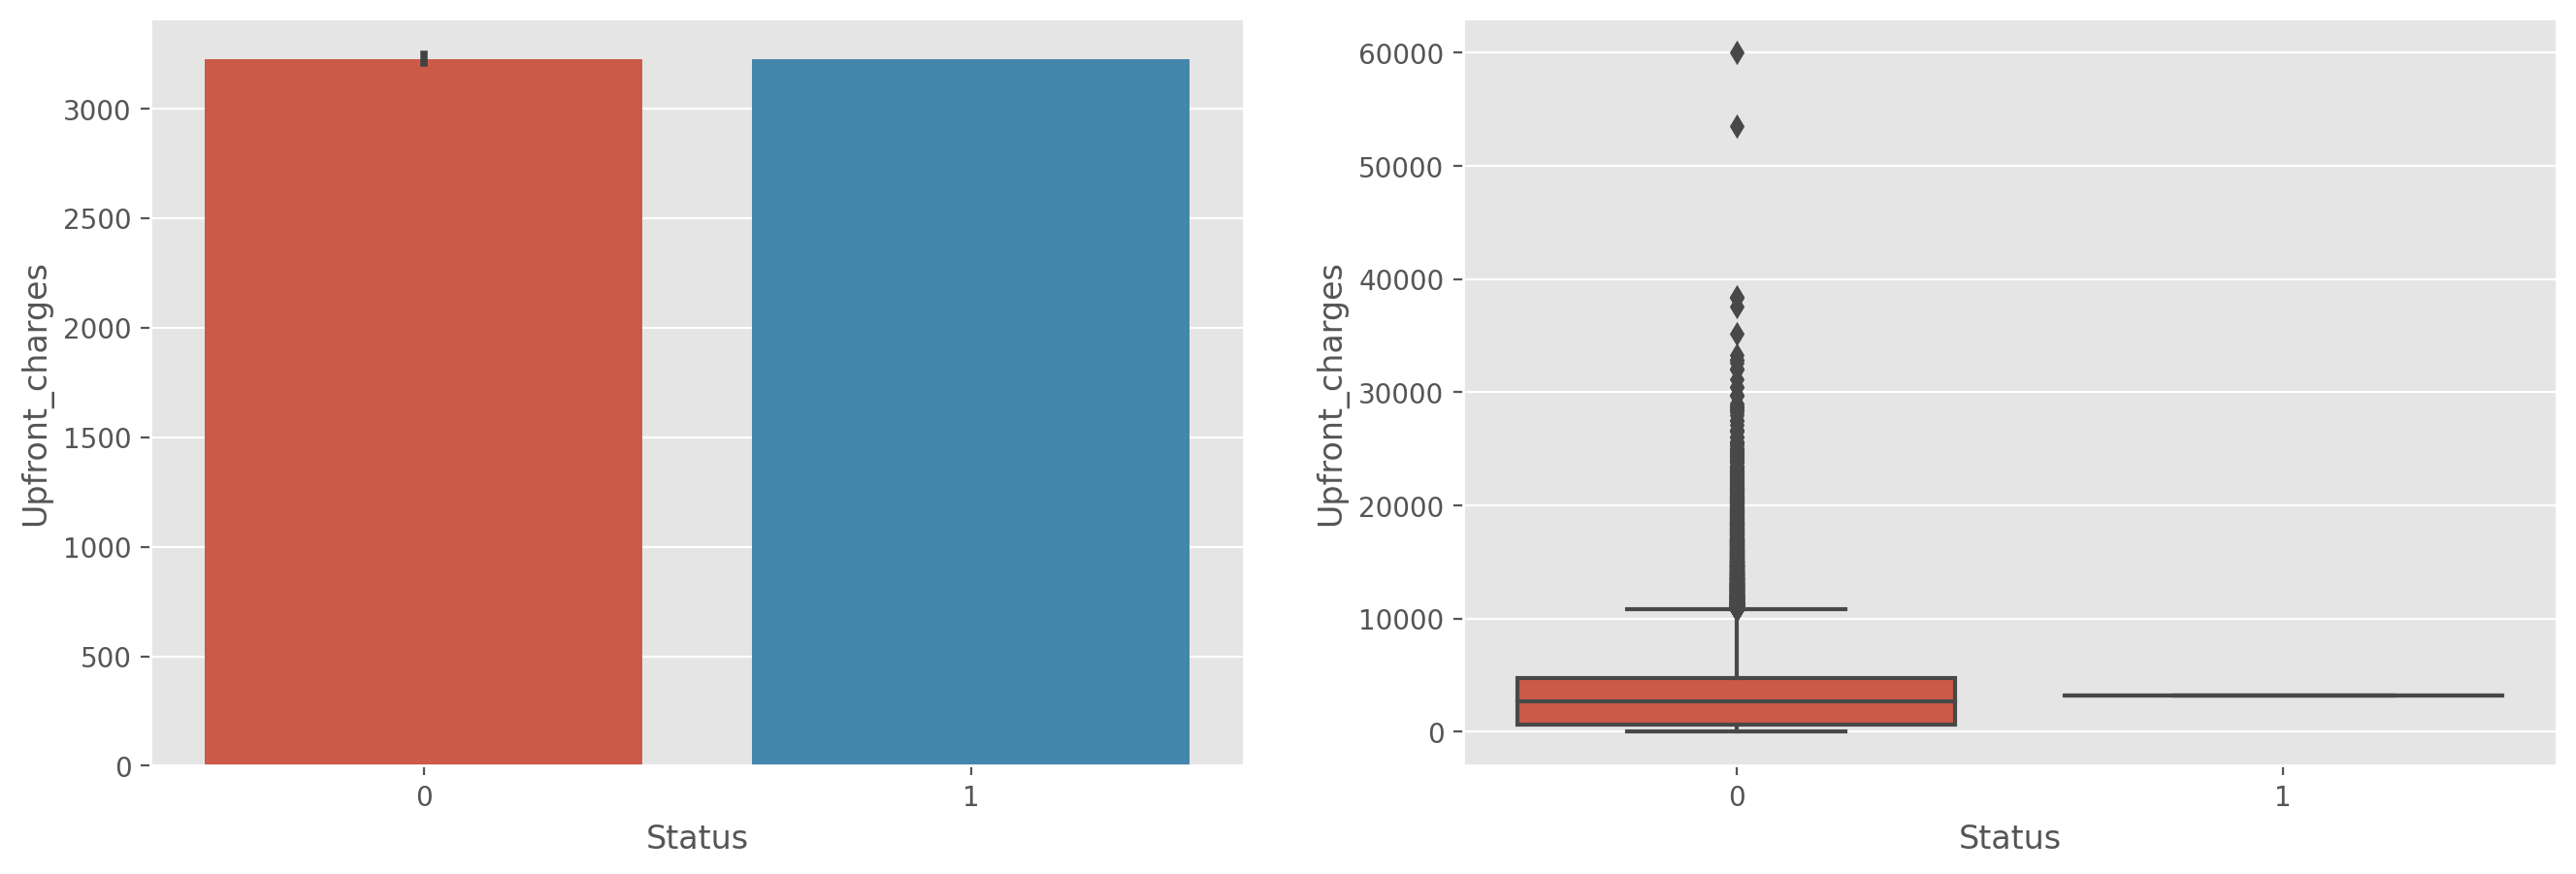

In [48]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'Upfront_charges',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'Upfront_charges',  data = data)

<AxesSubplot:xlabel='term', ylabel='Status'>

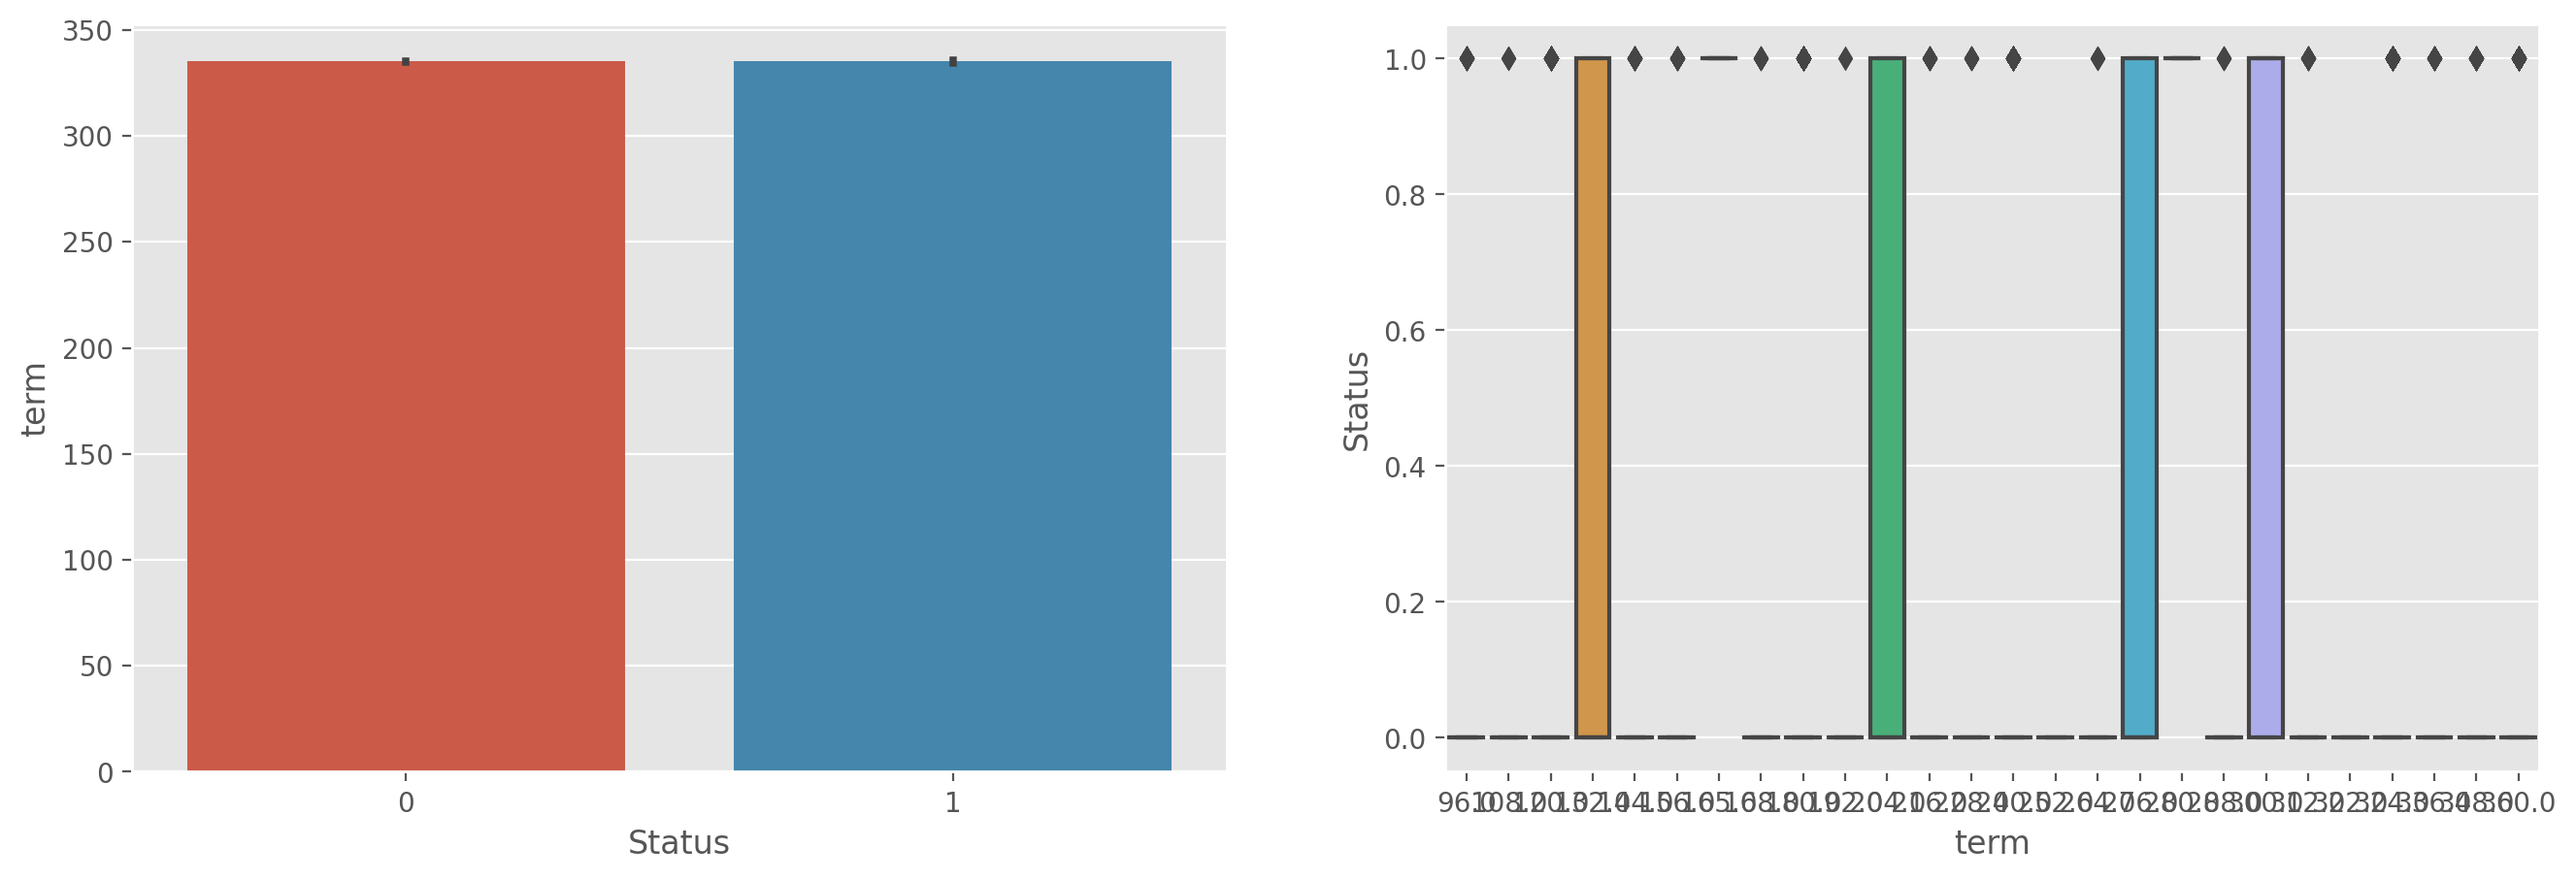

In [49]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'term',  data = data)
plt.subplot(1,2,2)
sns.boxplot('term','Status',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

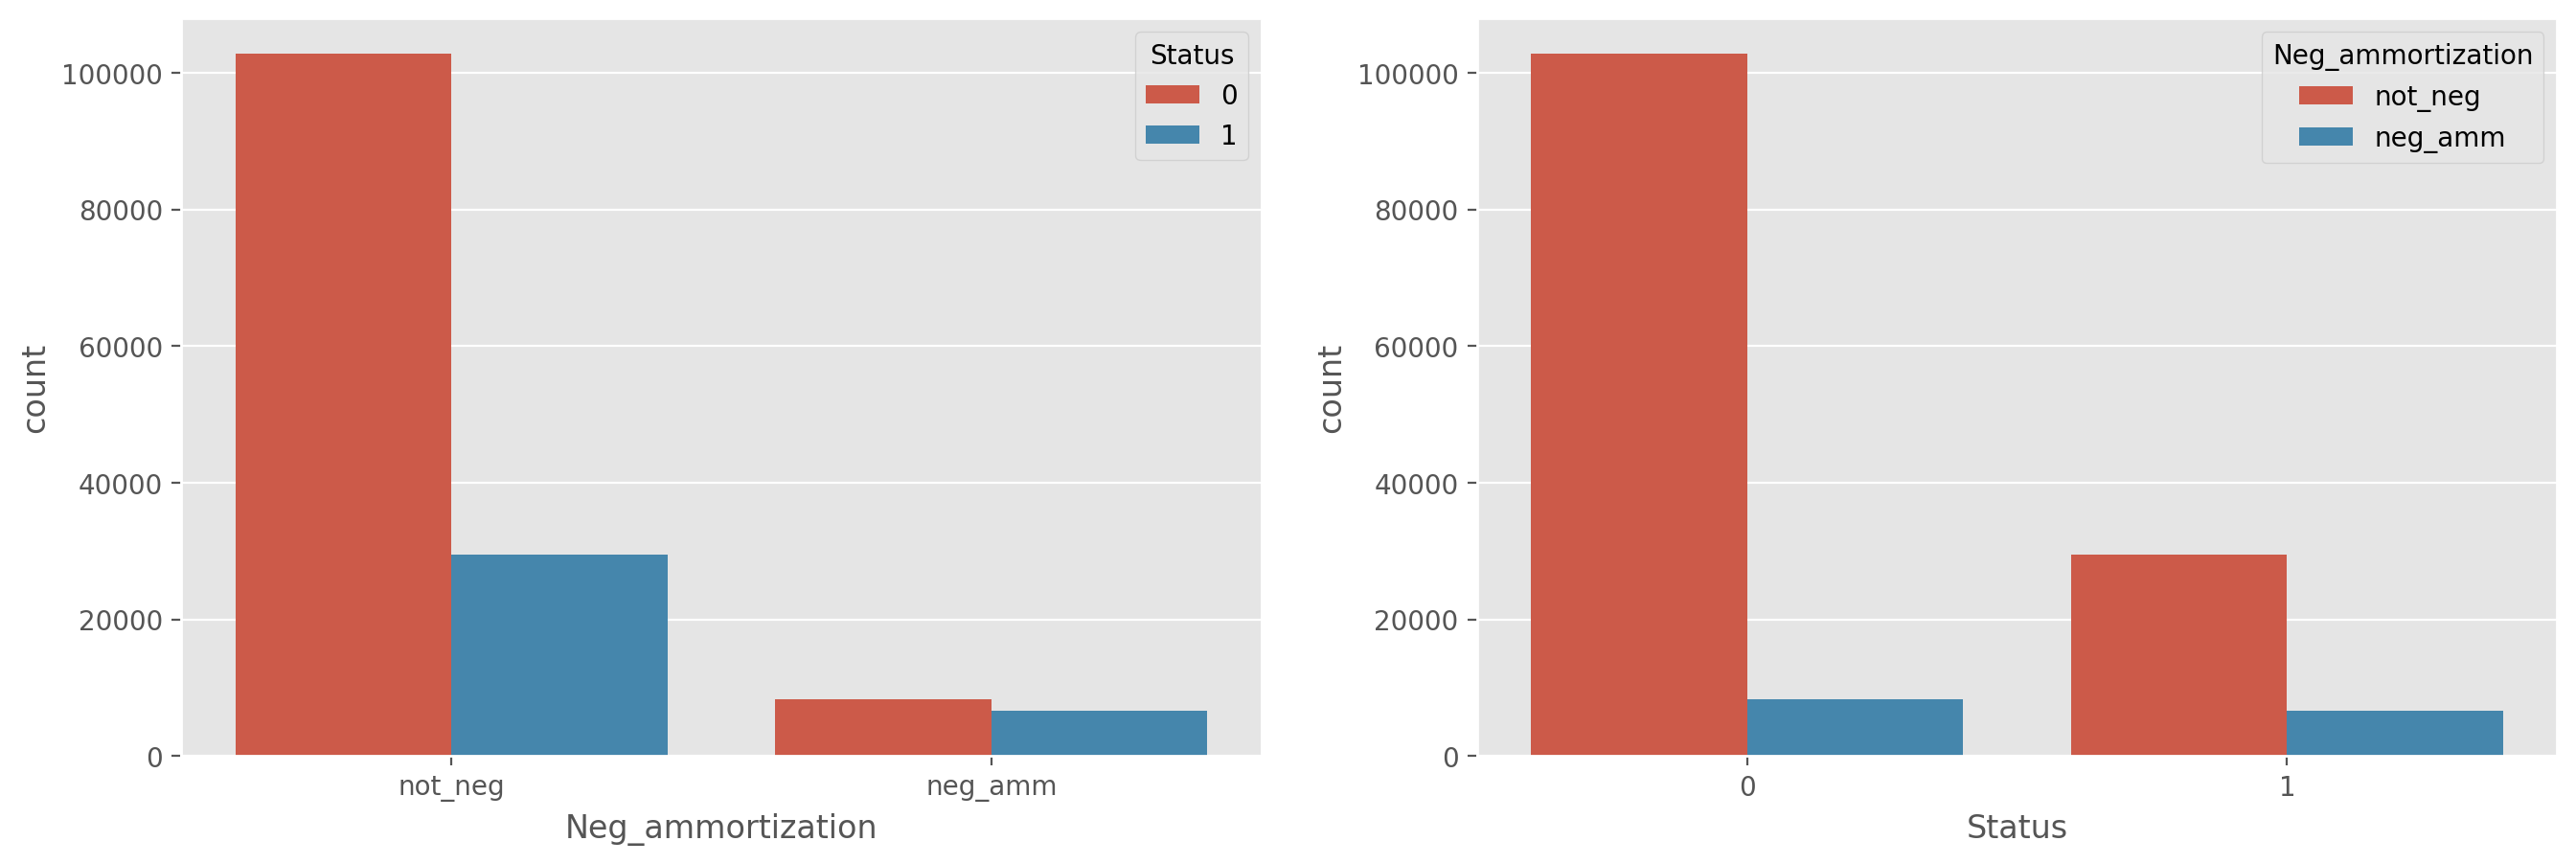

In [50]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Neg_ammortization', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Neg_ammortization',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

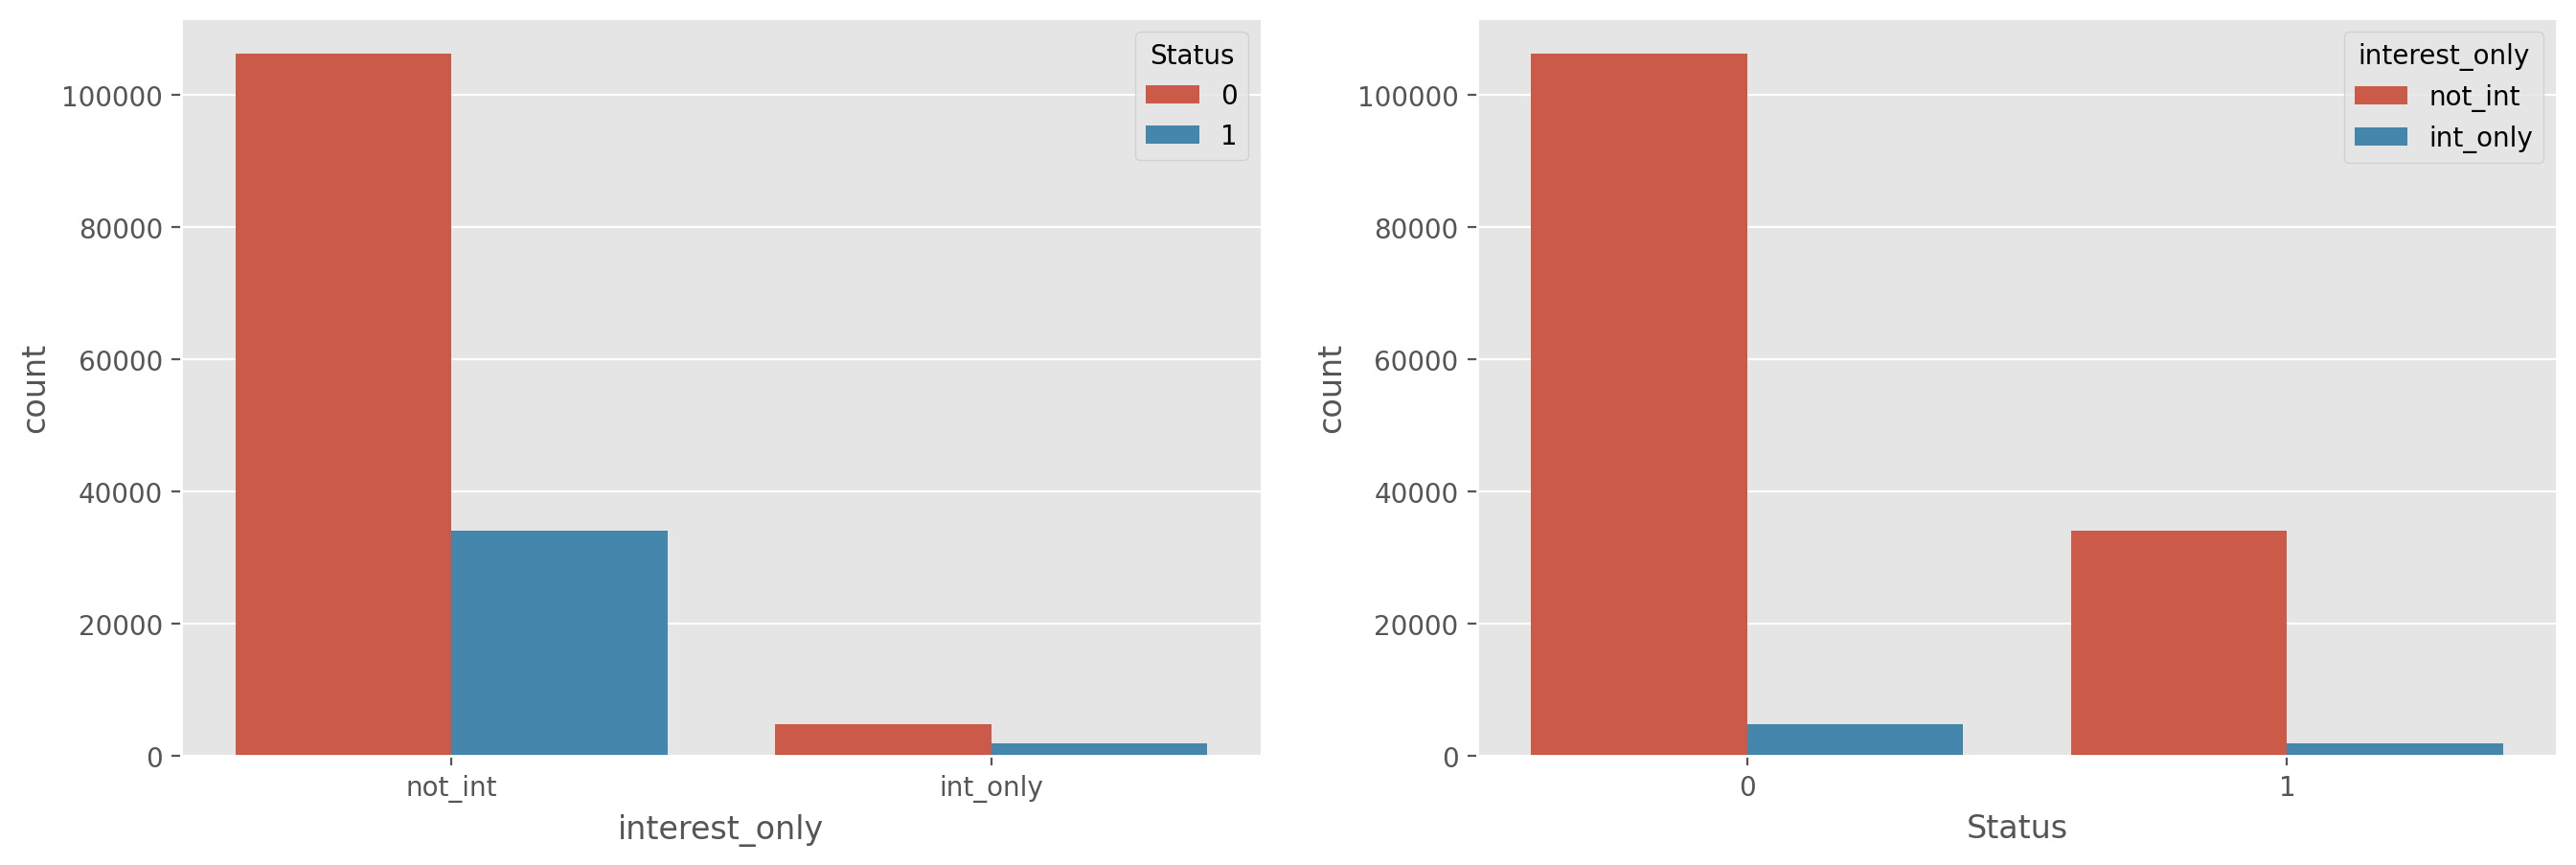

In [51]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('interest_only', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'interest_only',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

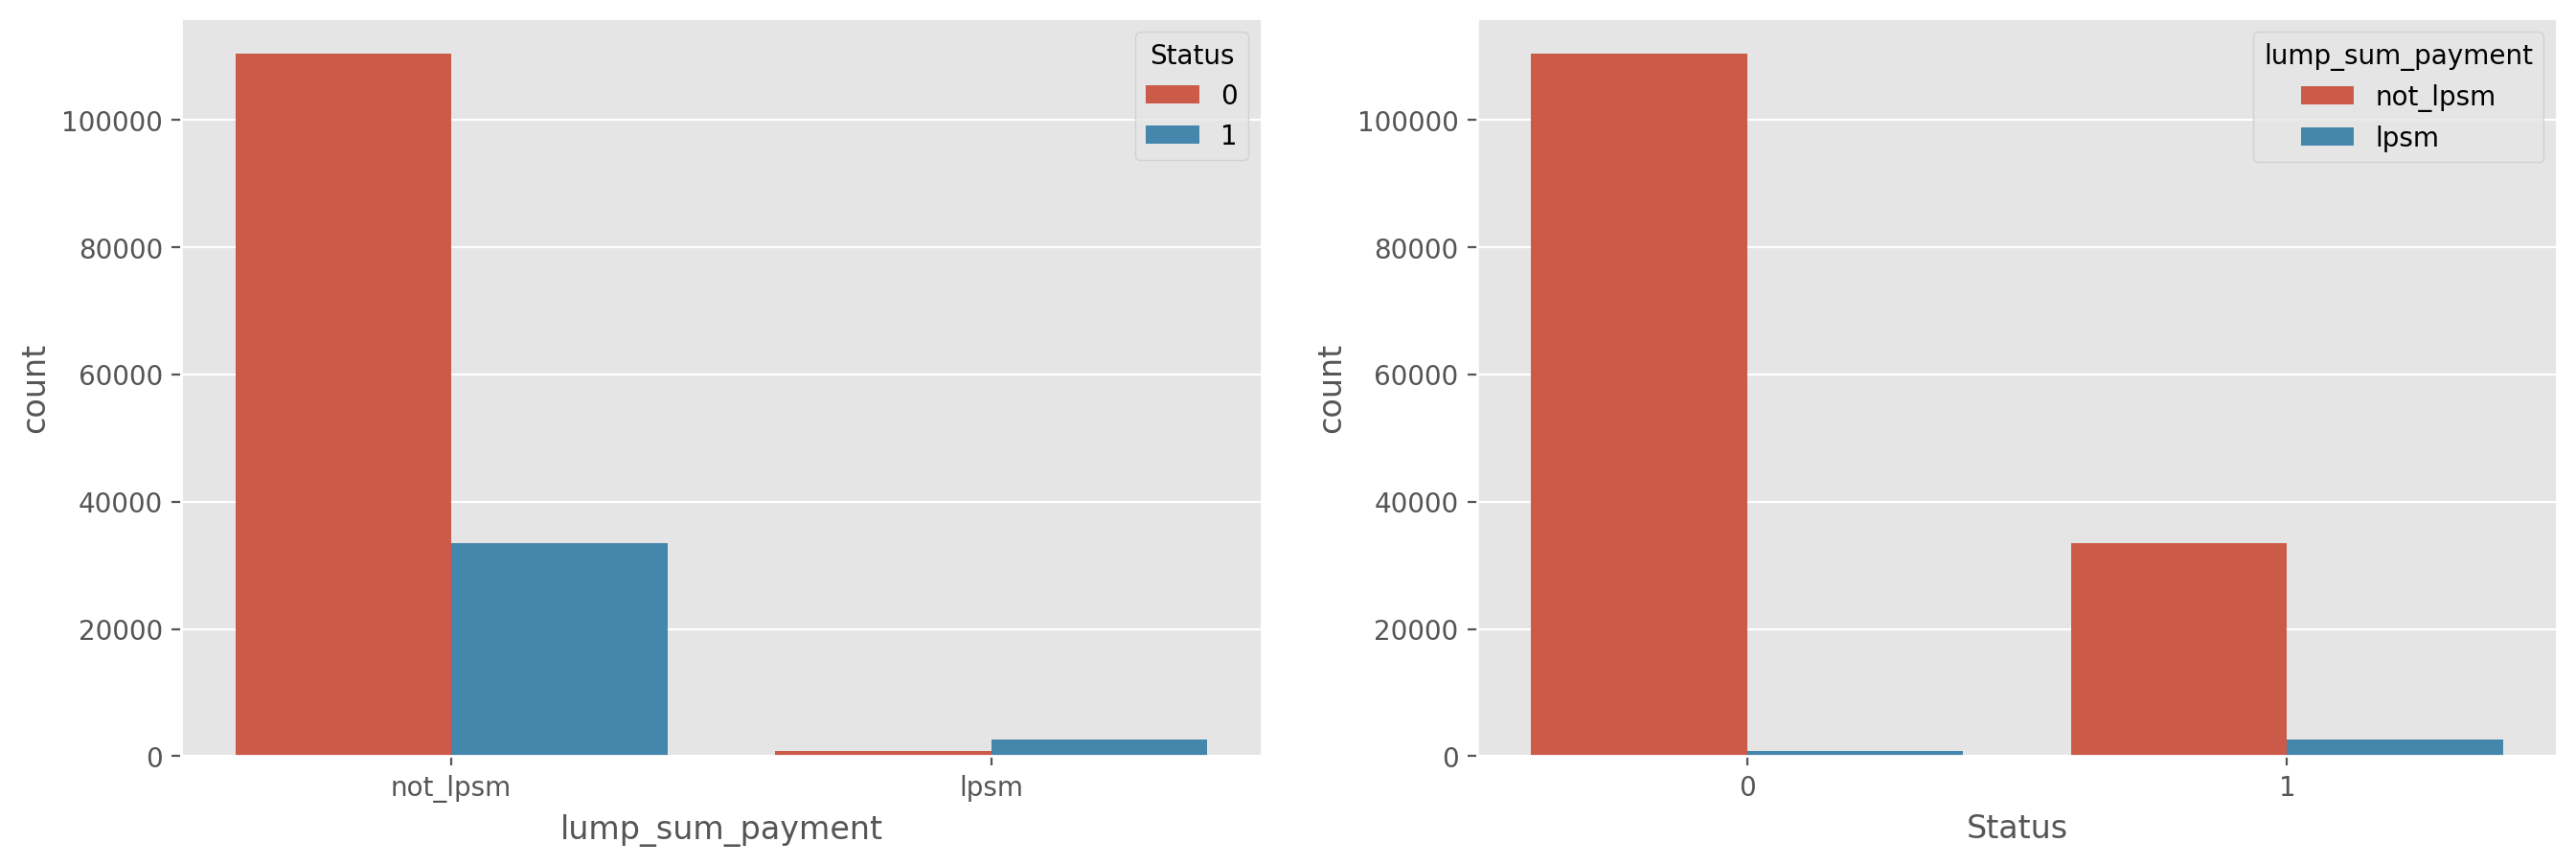

In [52]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('lump_sum_payment', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'lump_sum_payment',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

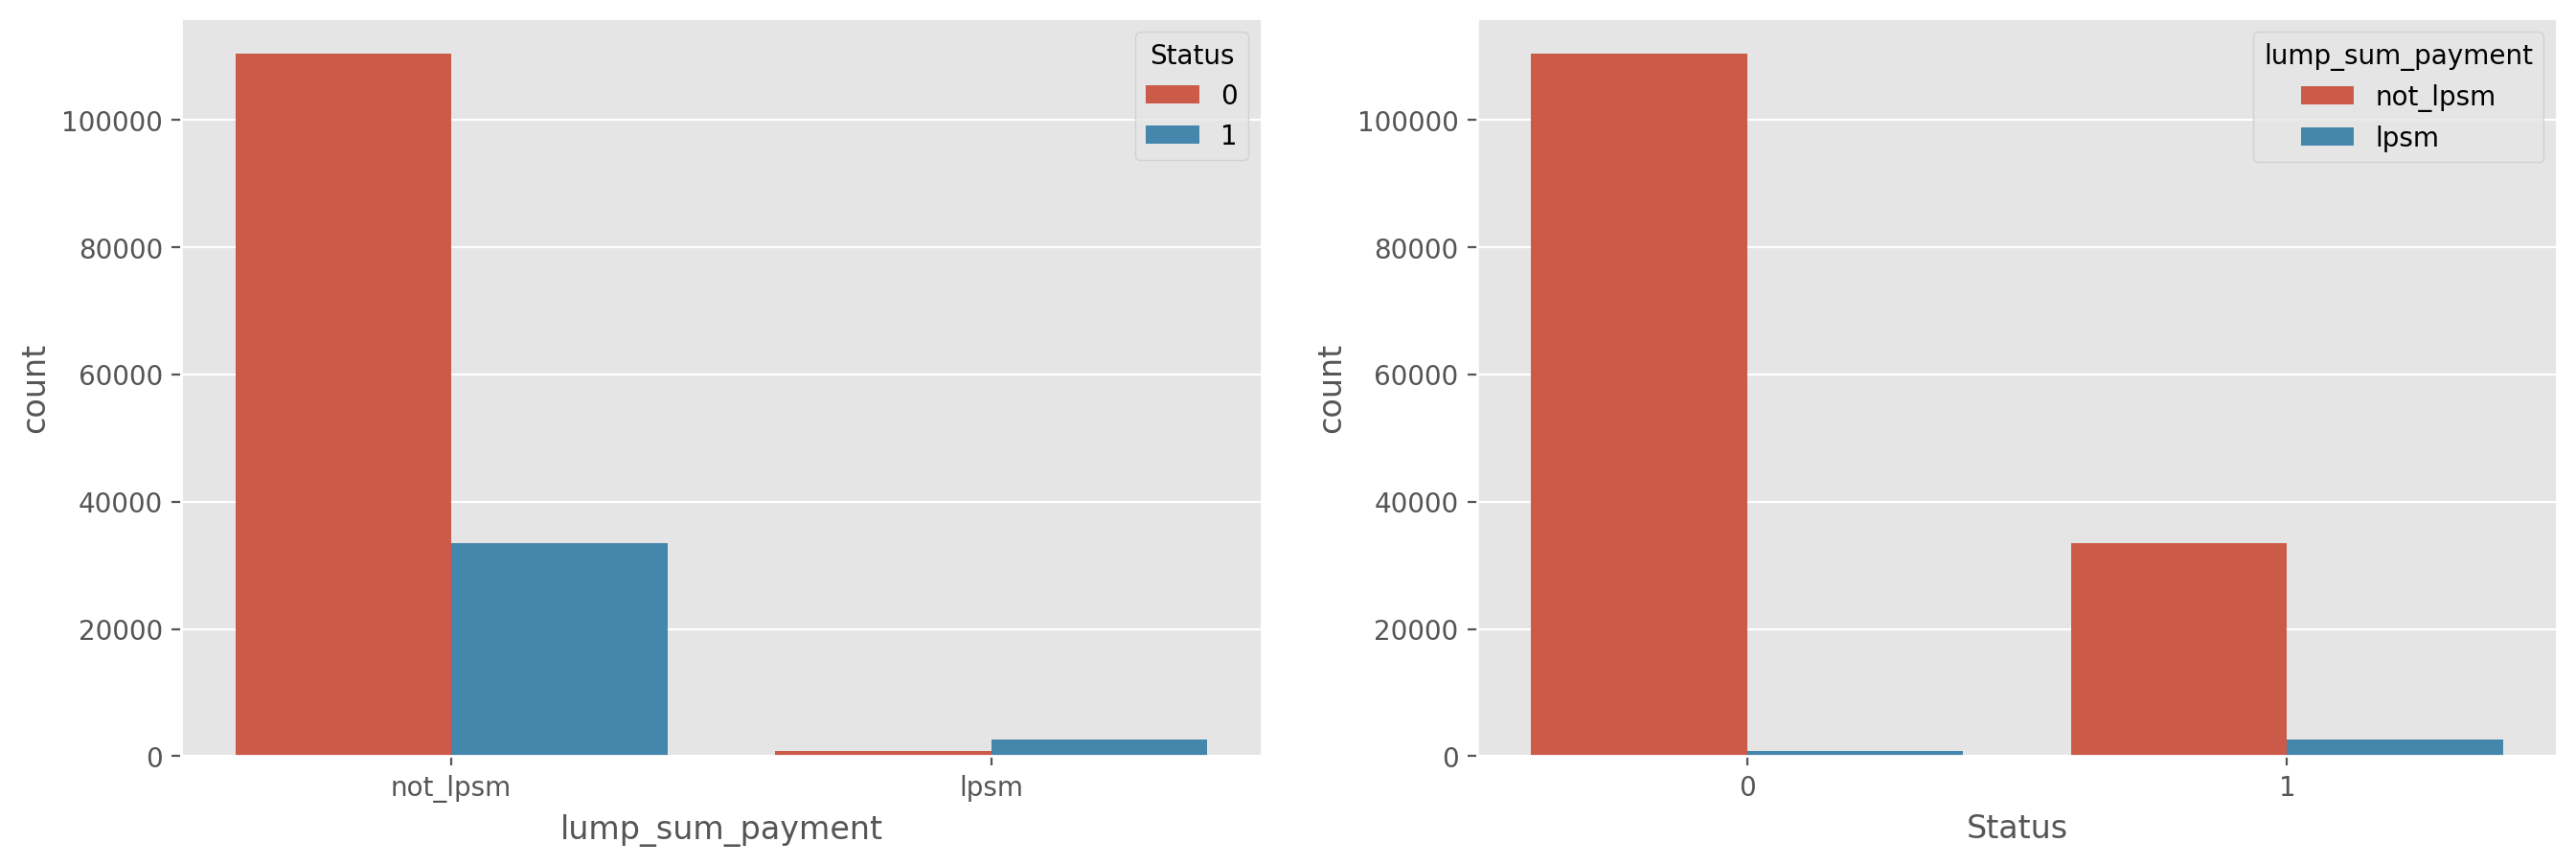

In [53]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('lump_sum_payment', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'lump_sum_payment',  data = data)

<AxesSubplot:xlabel='Status', ylabel='property_value'>

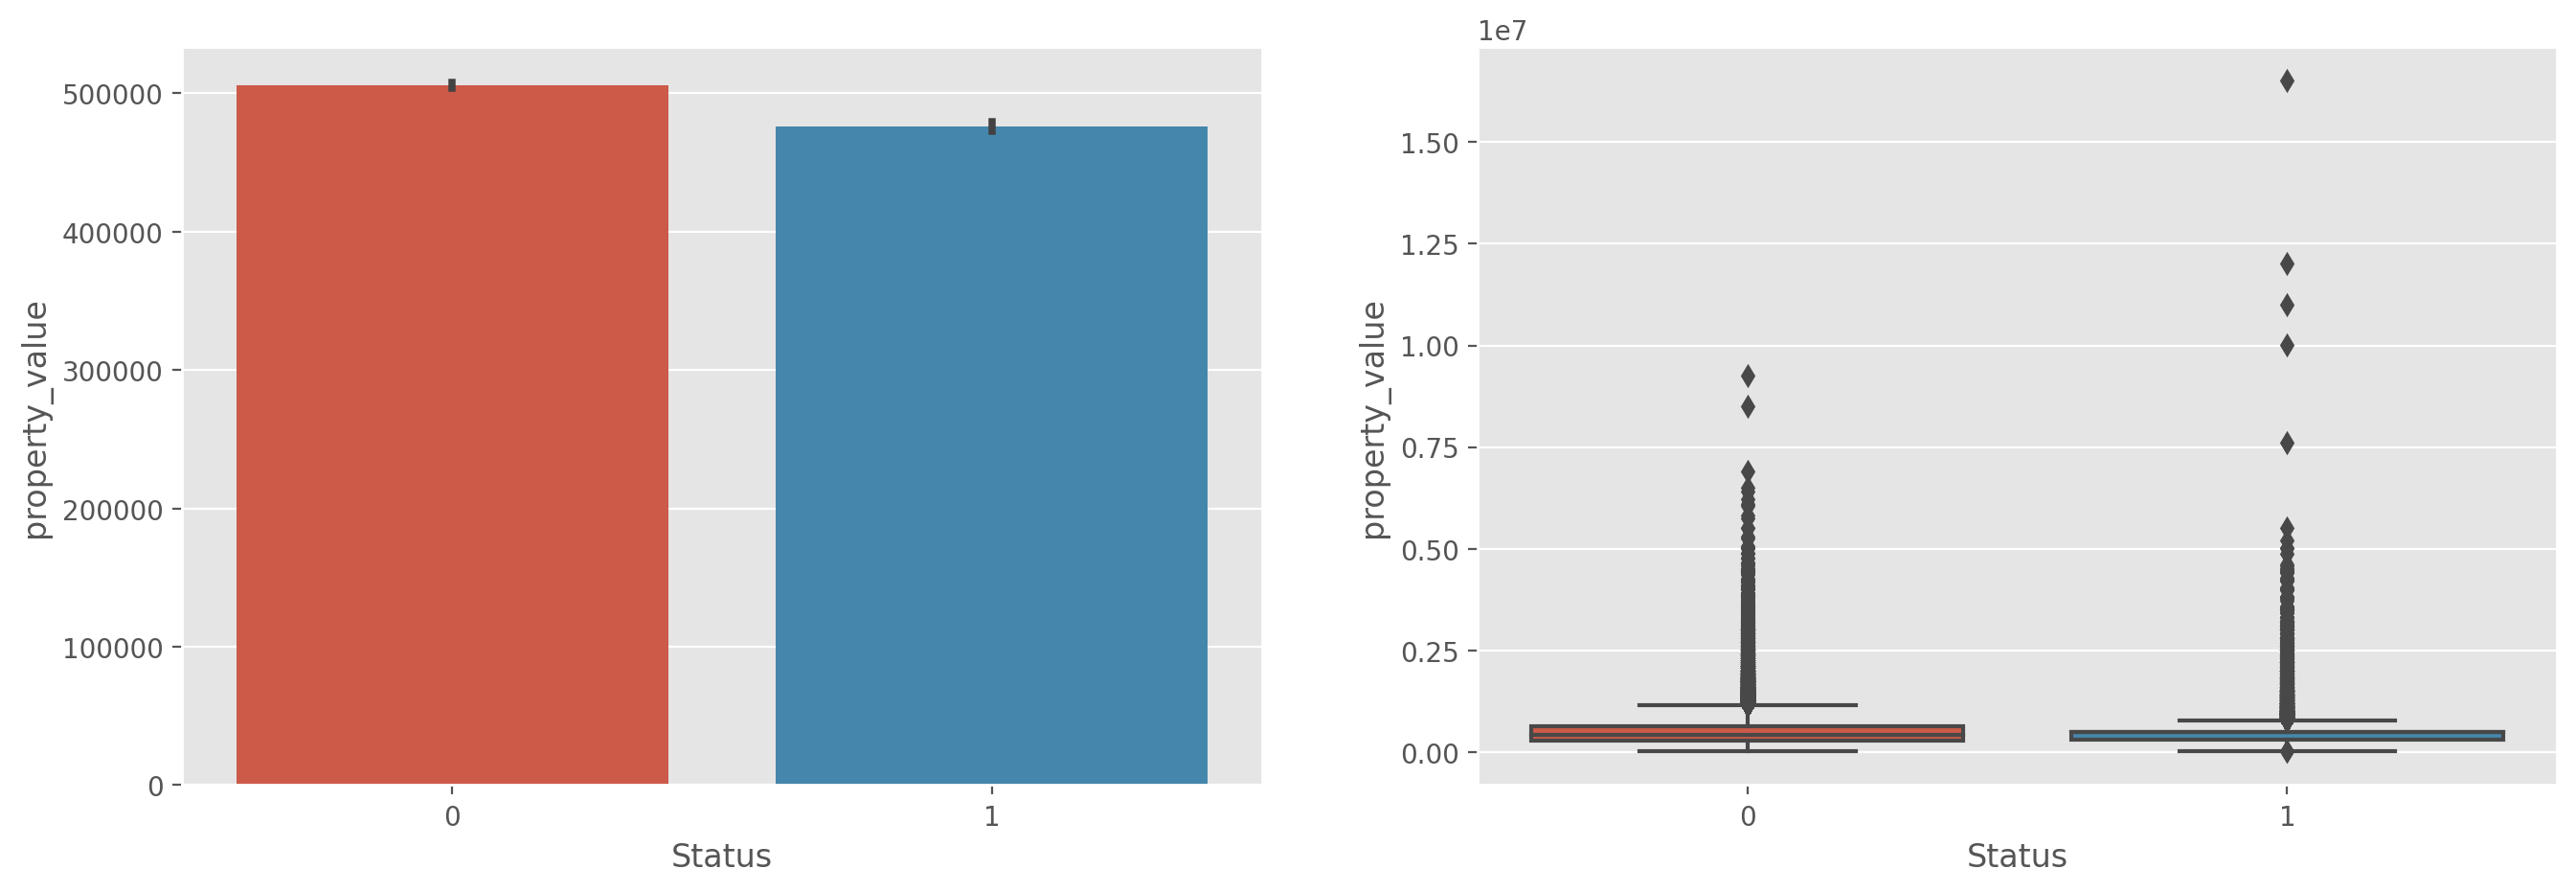

In [54]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'property_value',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'property_value',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

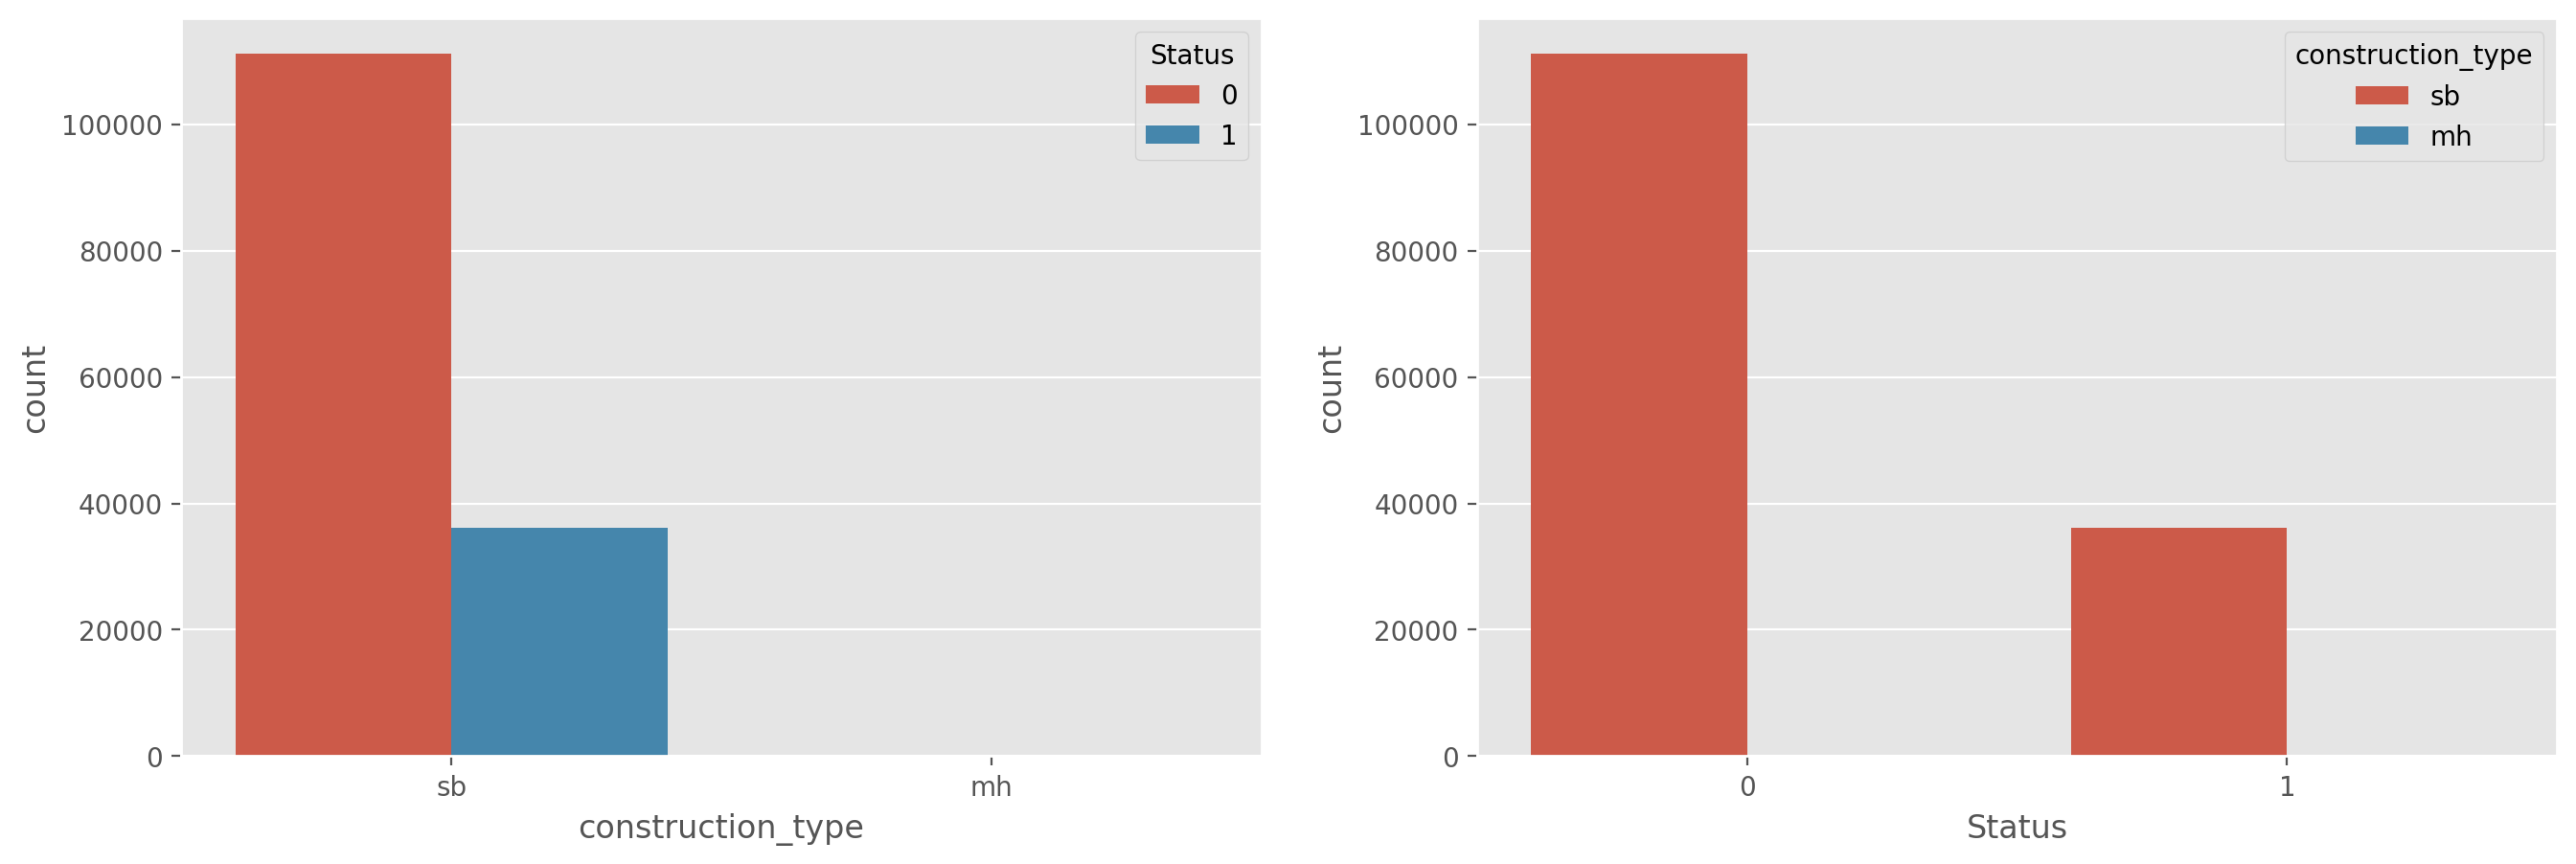

In [55]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('construction_type', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'construction_type',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

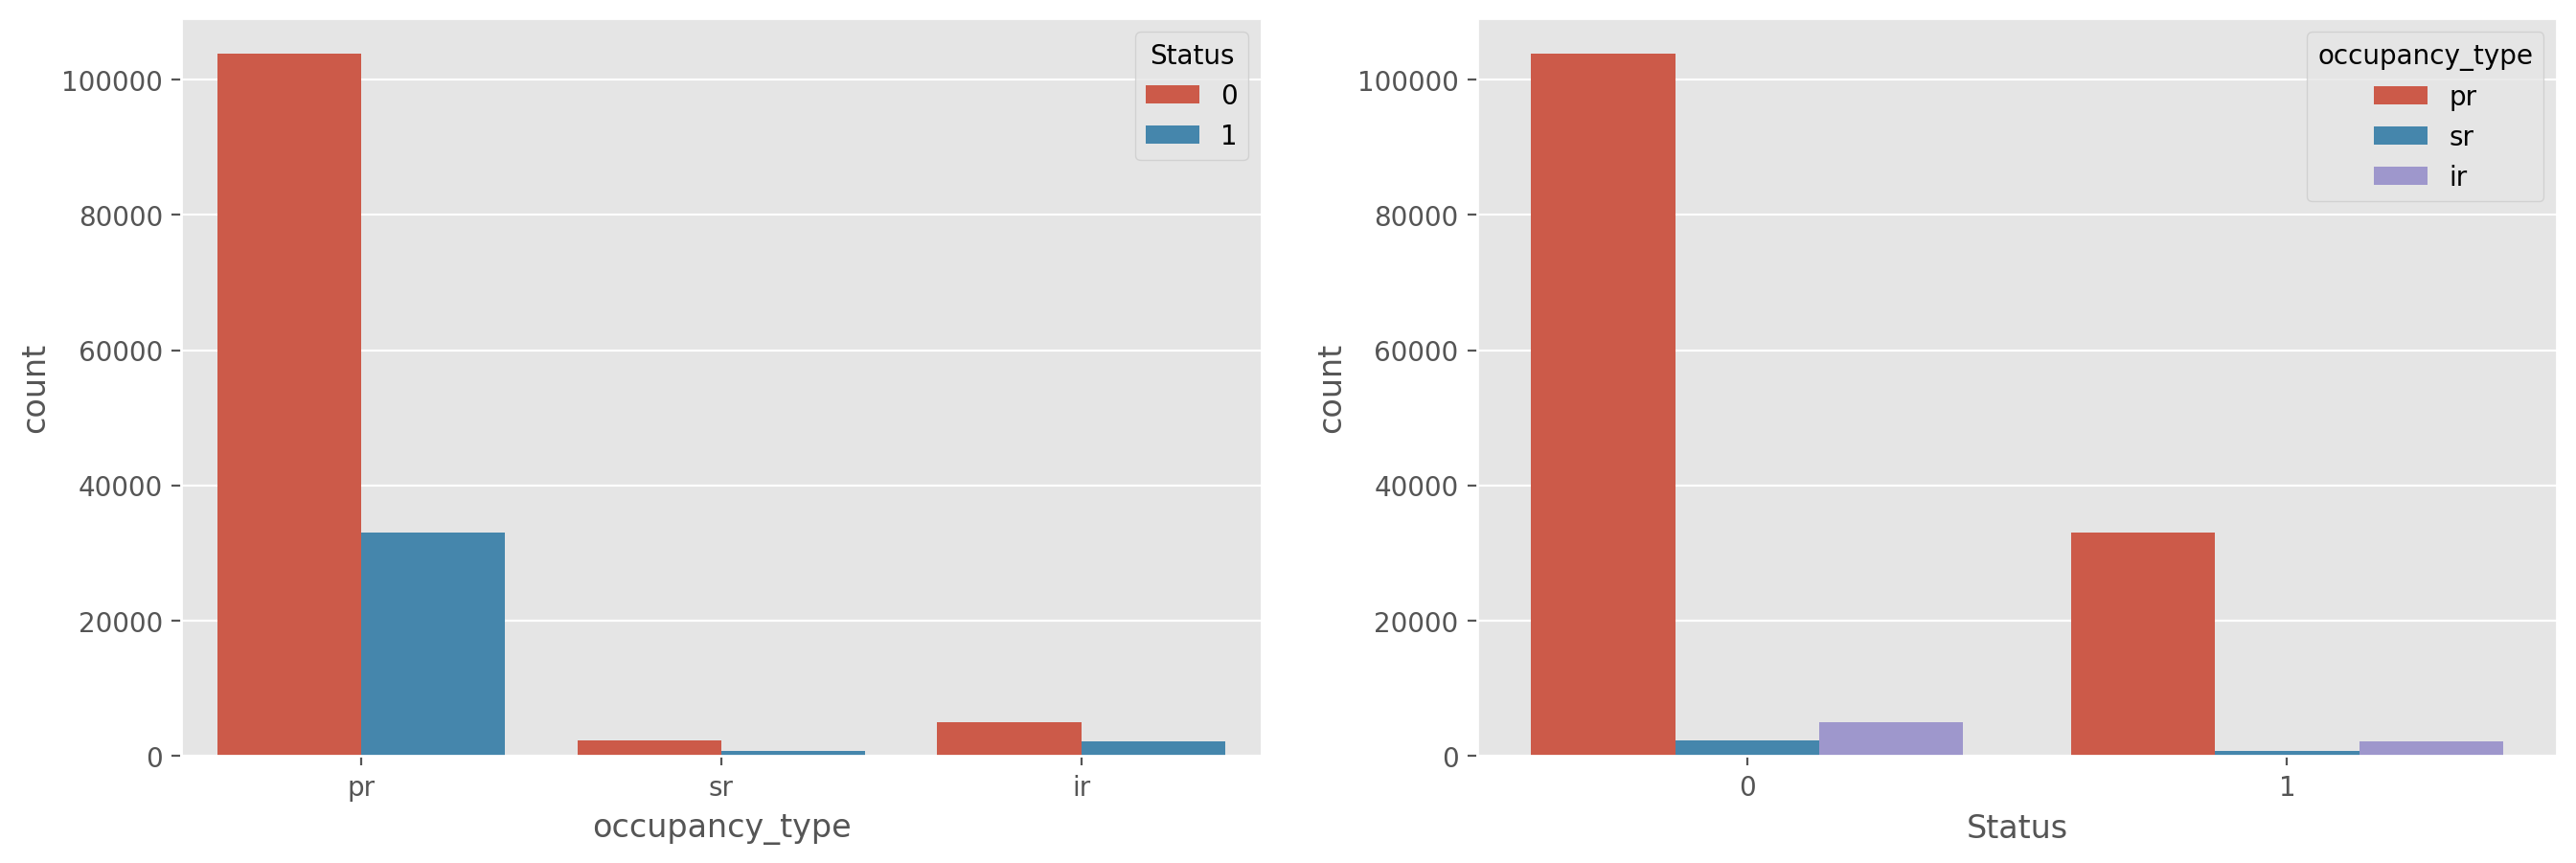

In [56]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('occupancy_type', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'occupancy_type',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

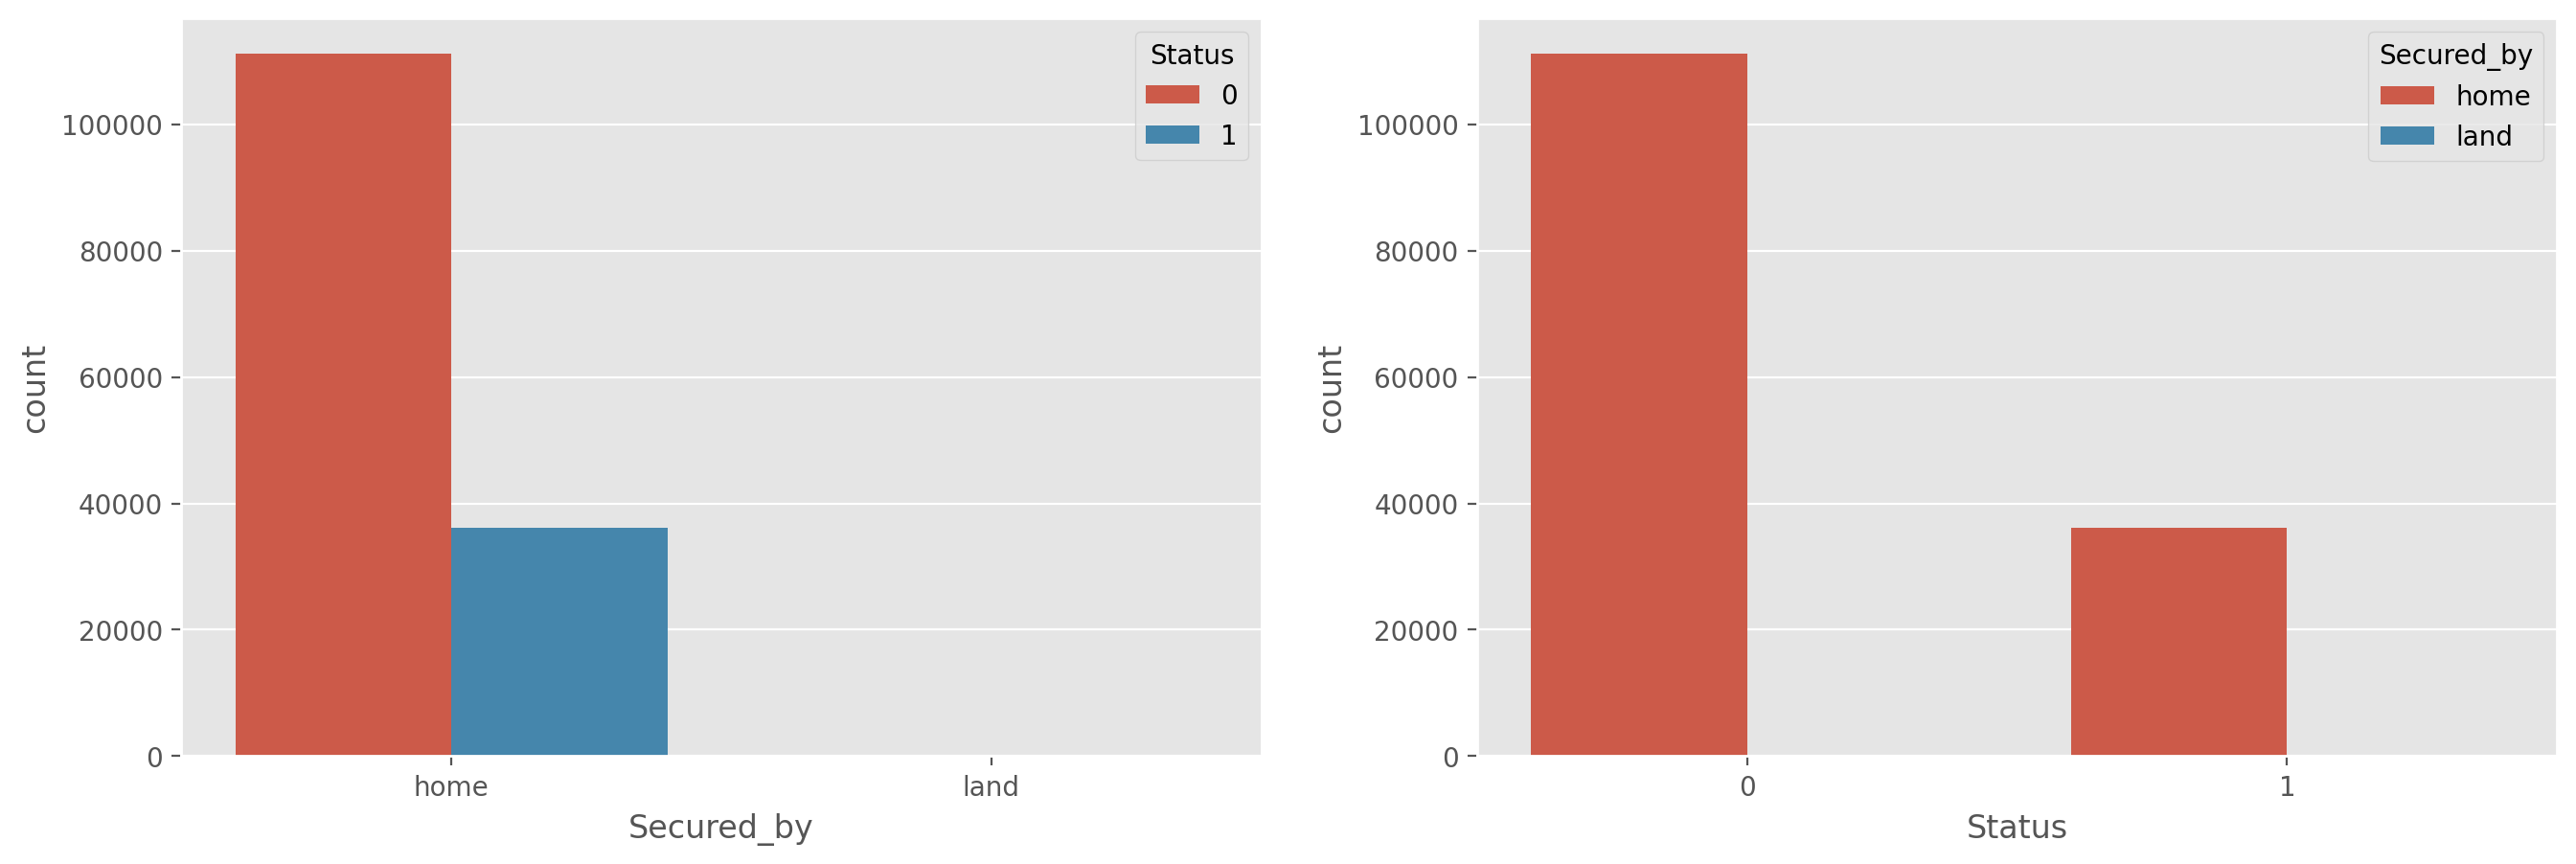

In [57]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Secured_by', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Secured_by',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

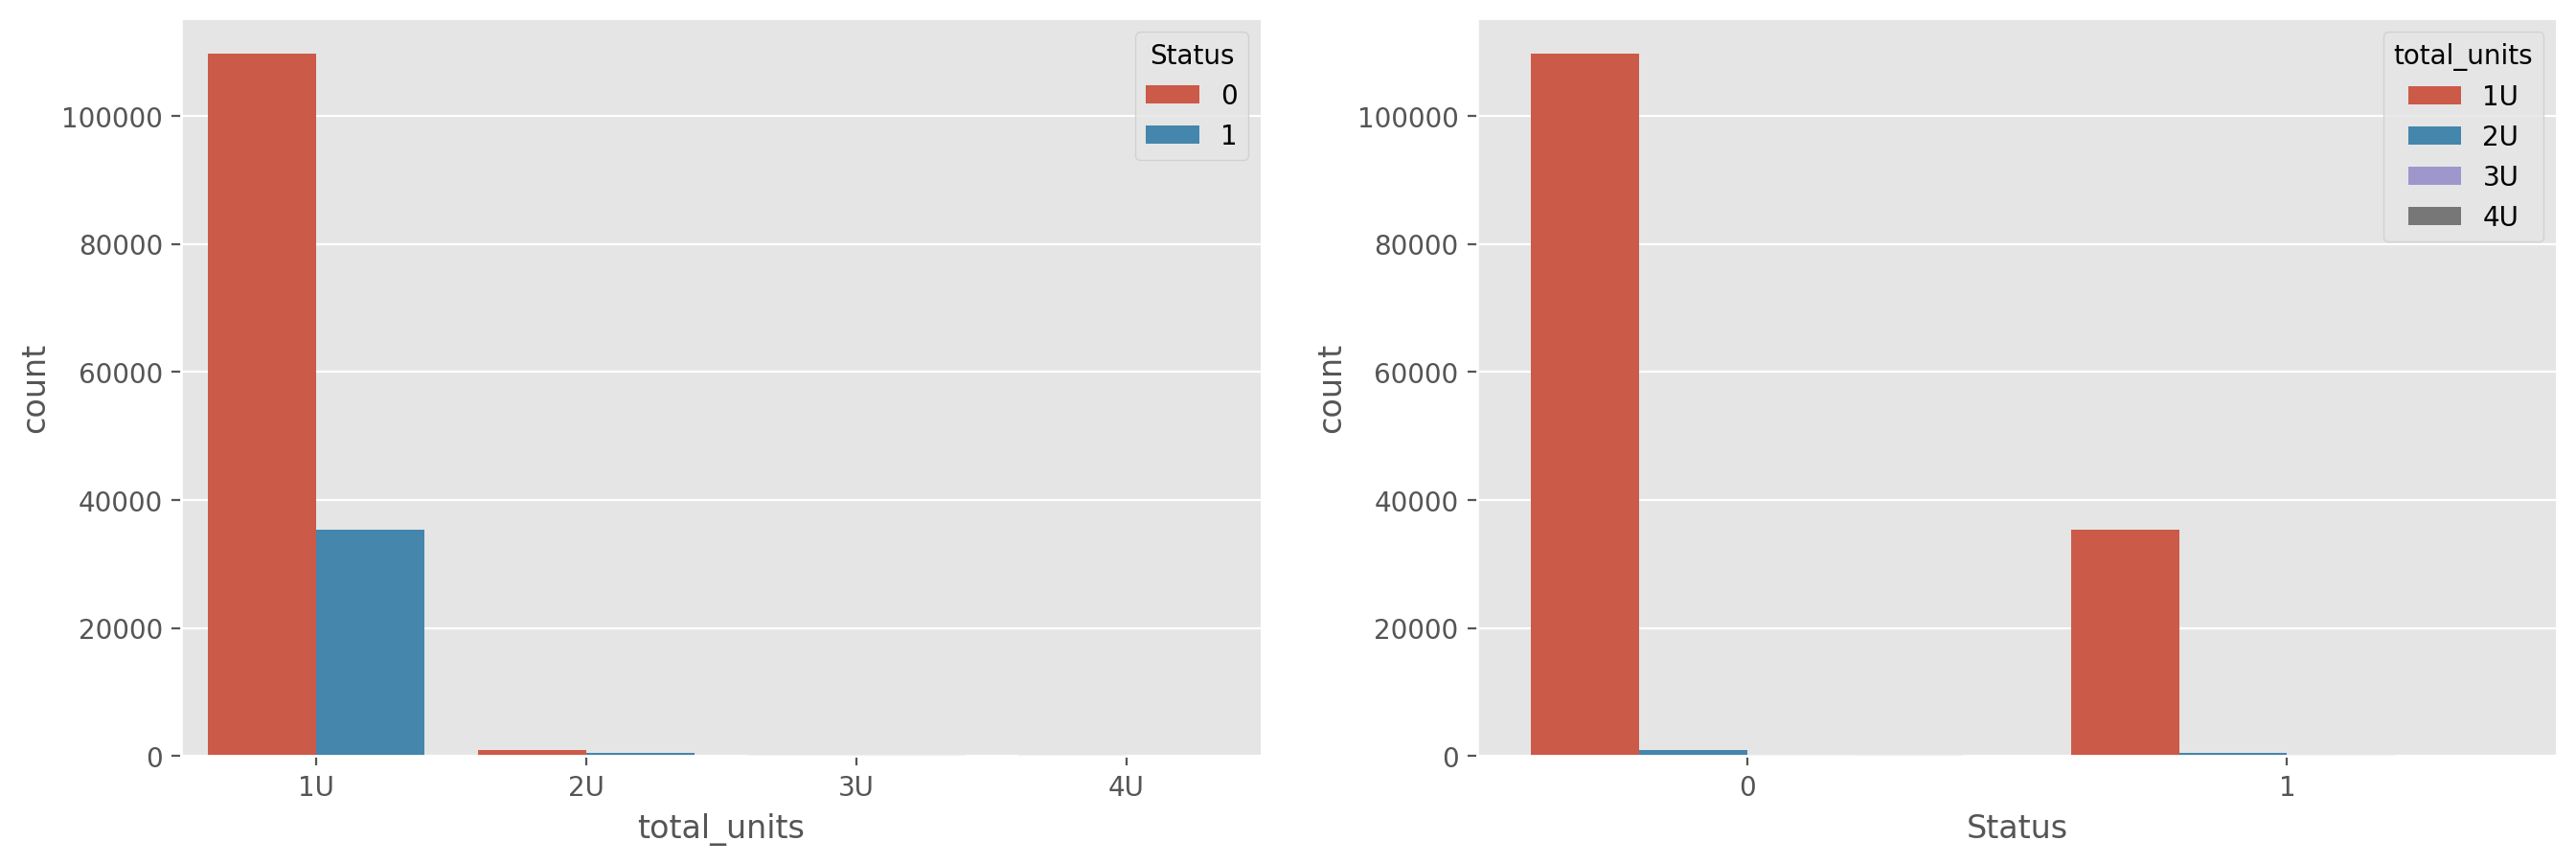

In [58]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('total_units', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'total_units',  data = data)

<AxesSubplot:xlabel='Status', ylabel='income'>

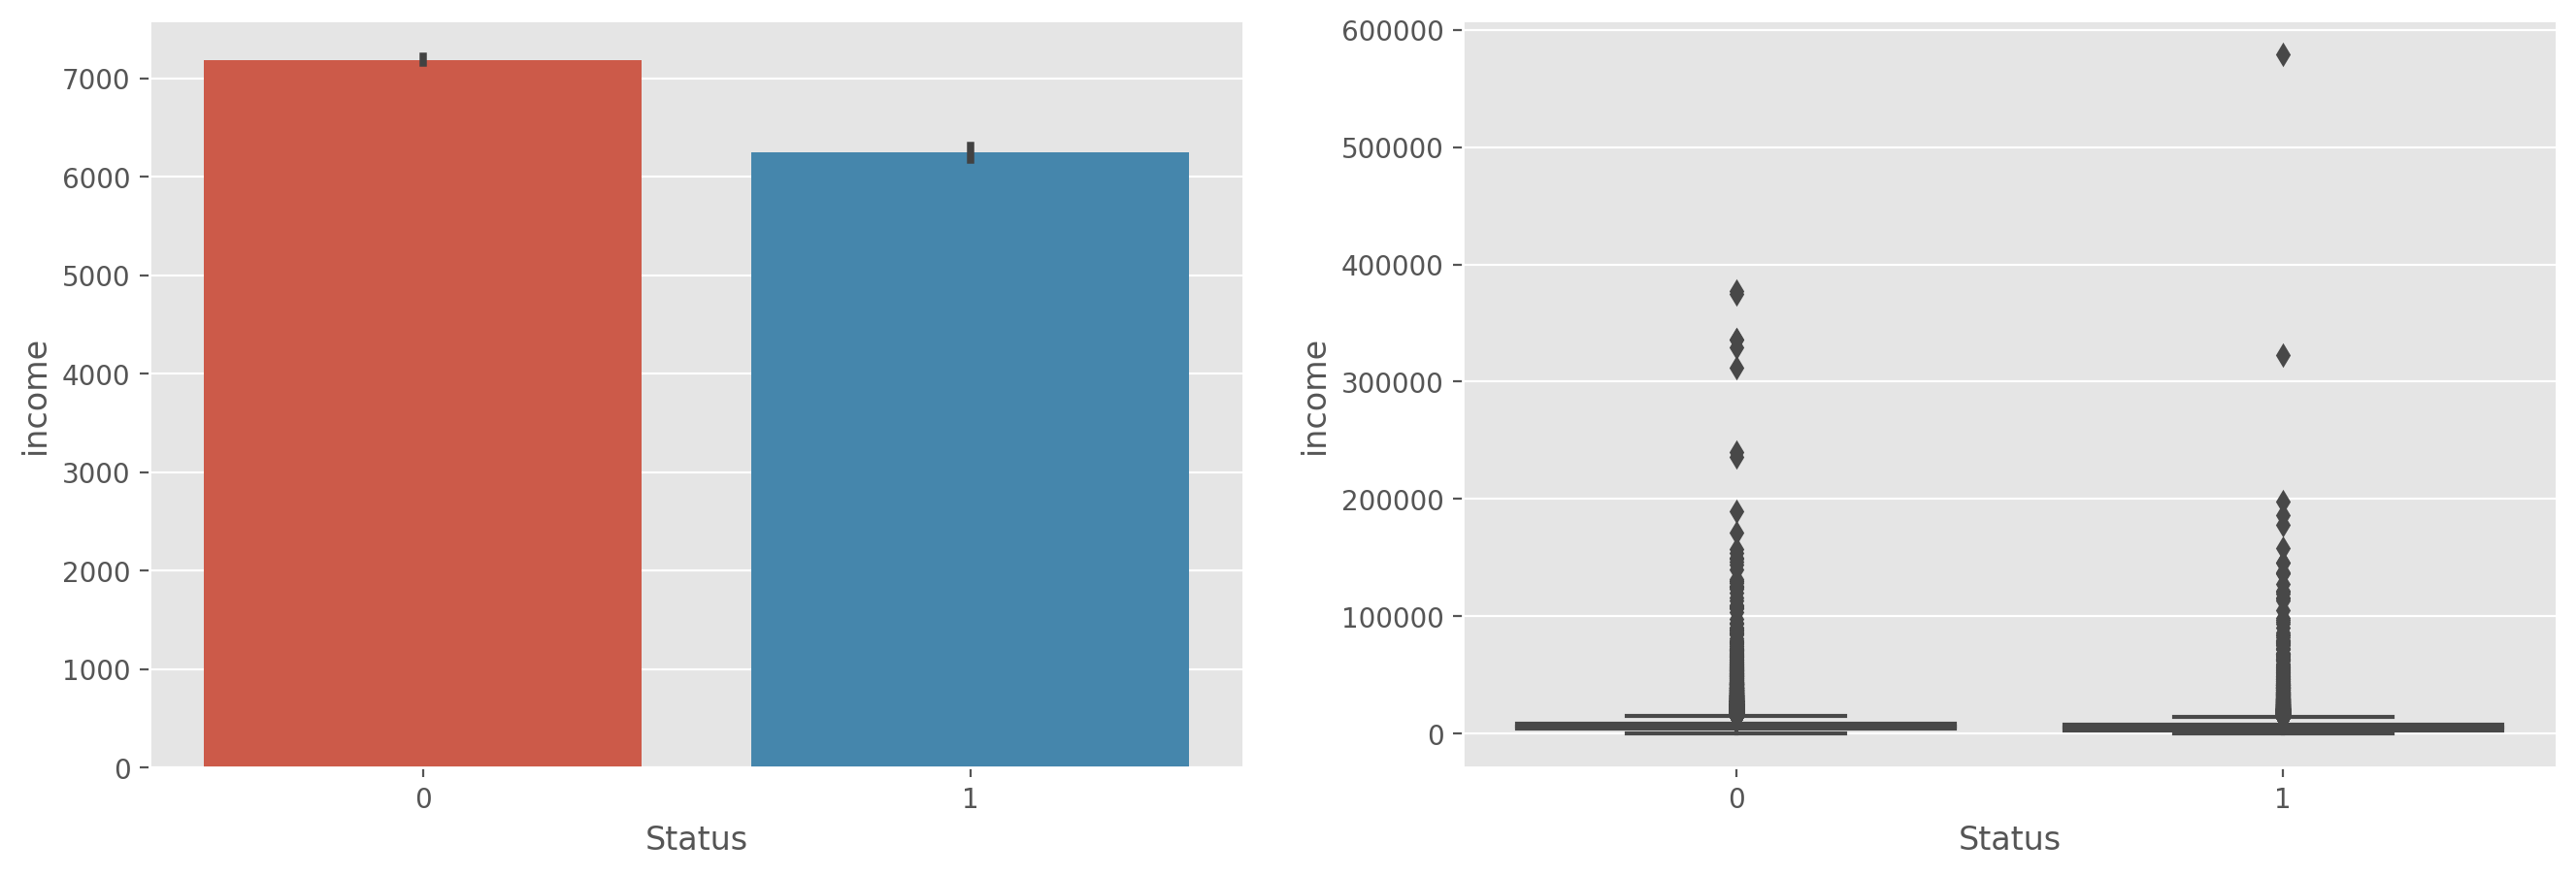

In [59]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'income',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'income',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

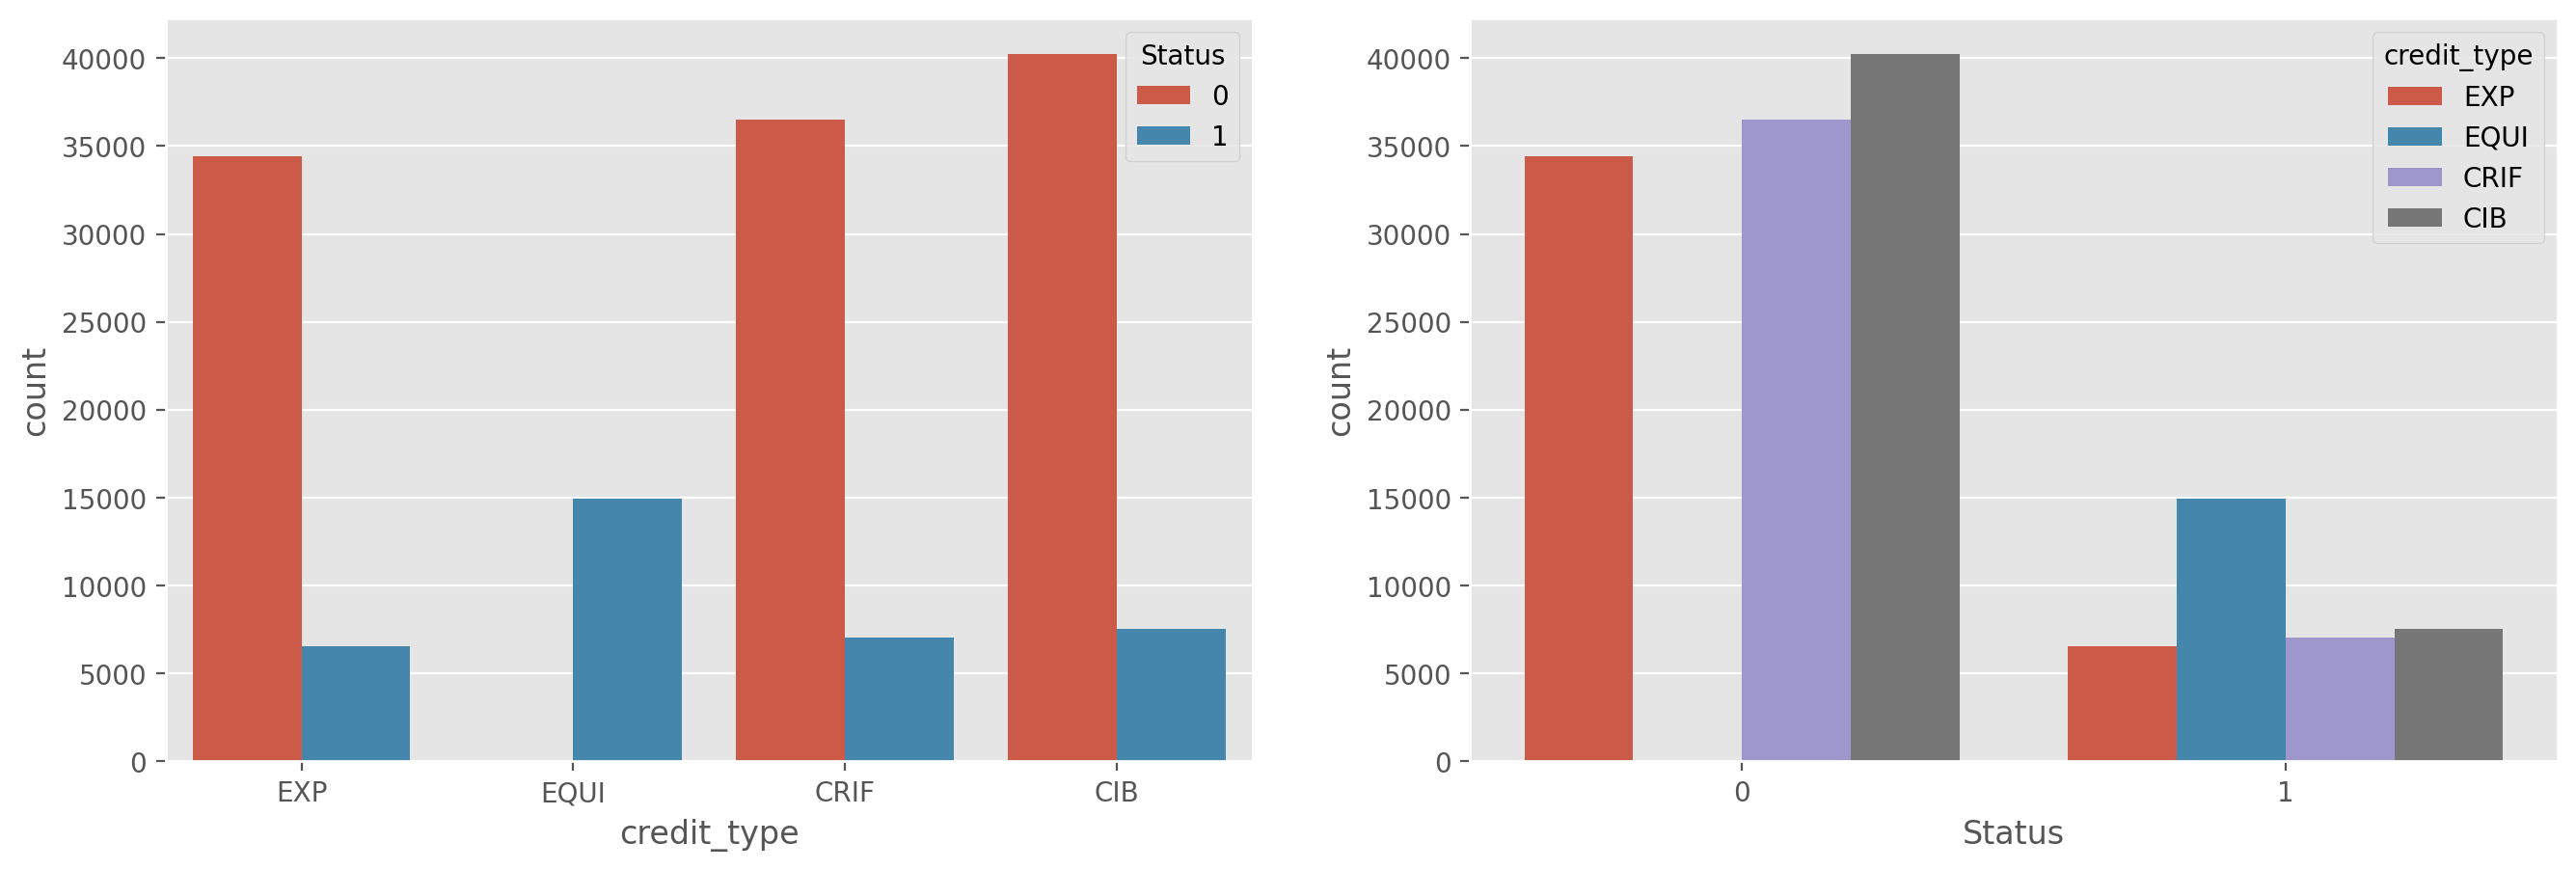

In [60]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('credit_type', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'credit_type',  data = data)

<AxesSubplot:xlabel='Status', ylabel='Credit_Score'>

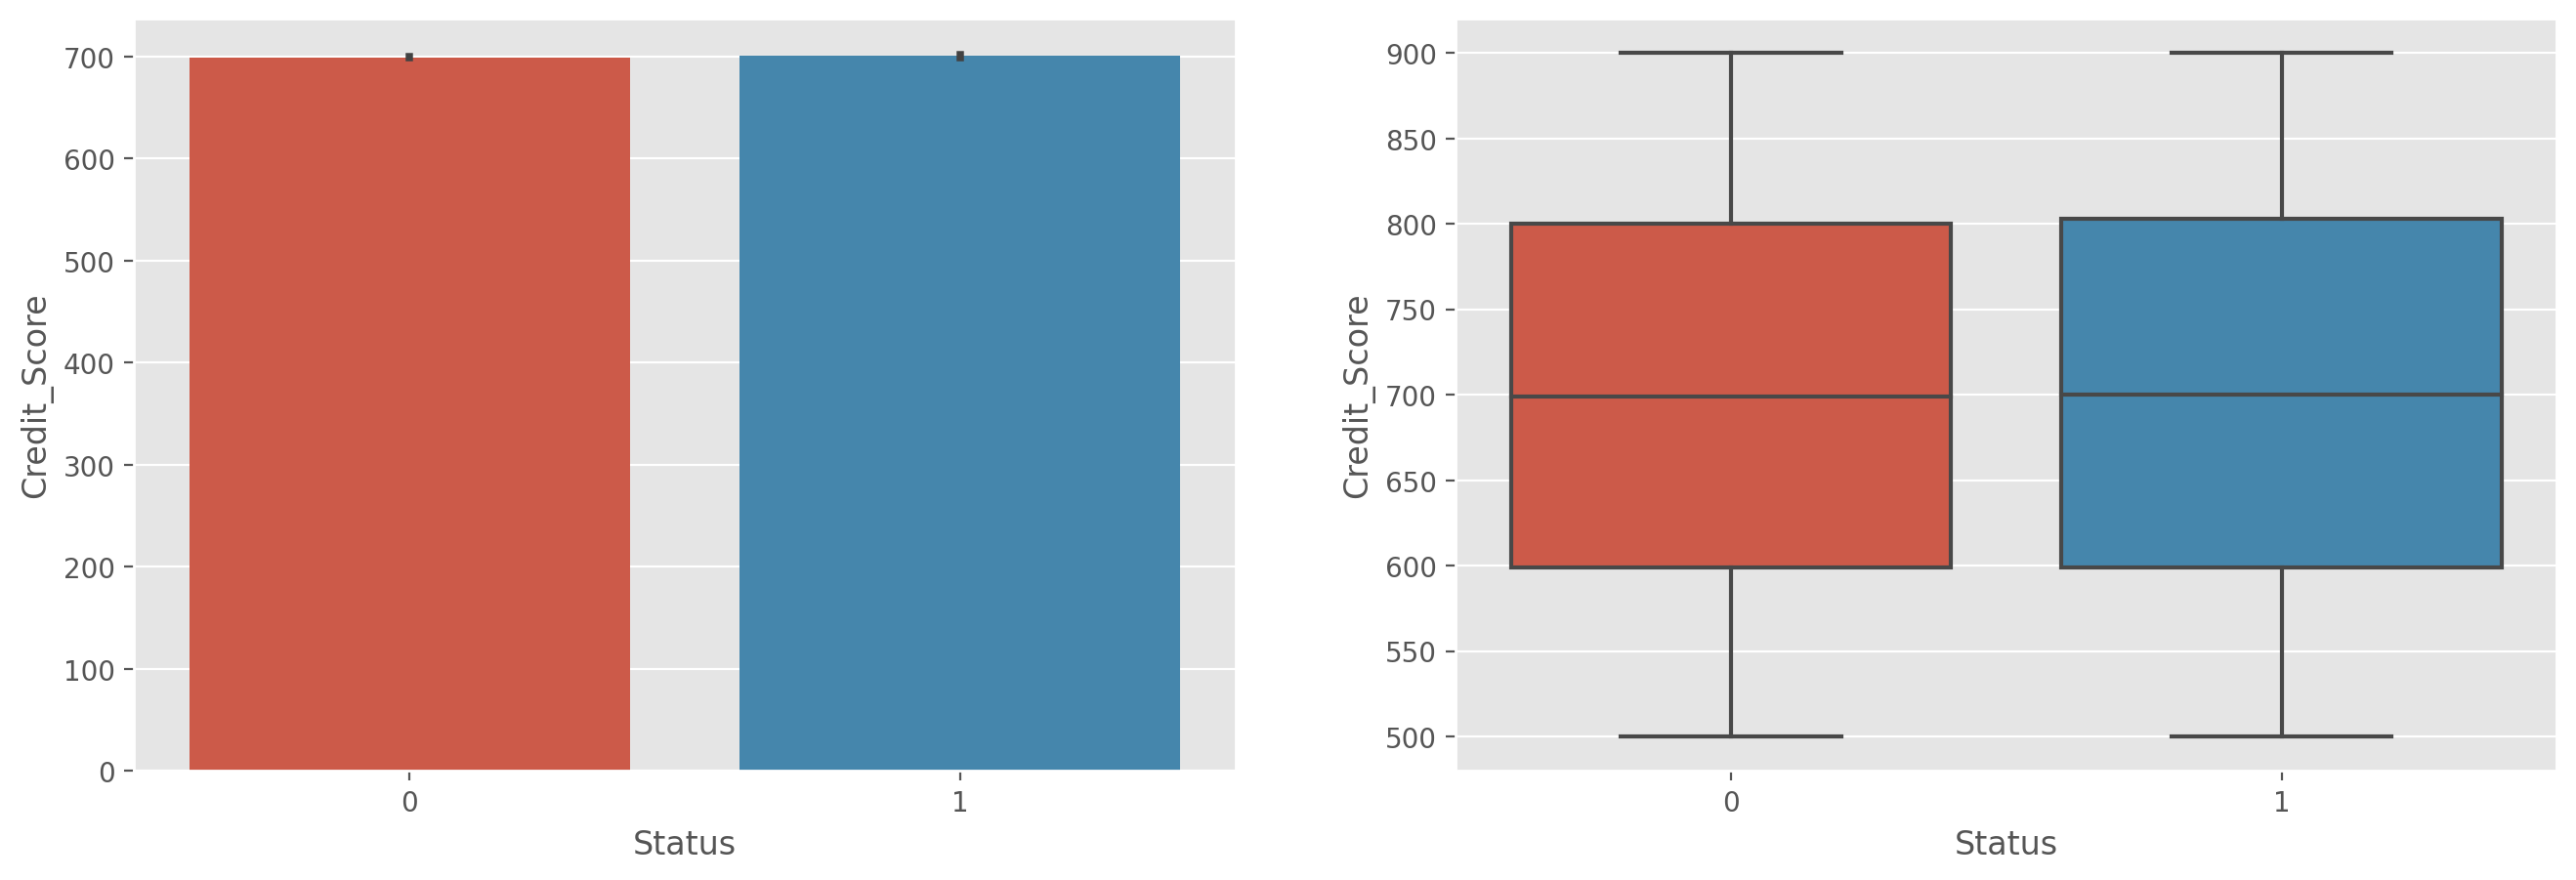

In [61]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'Credit_Score',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'Credit_Score',  data = data)

<AxesSubplot:xlabel='co-applicant_credit_type', ylabel='Status'>

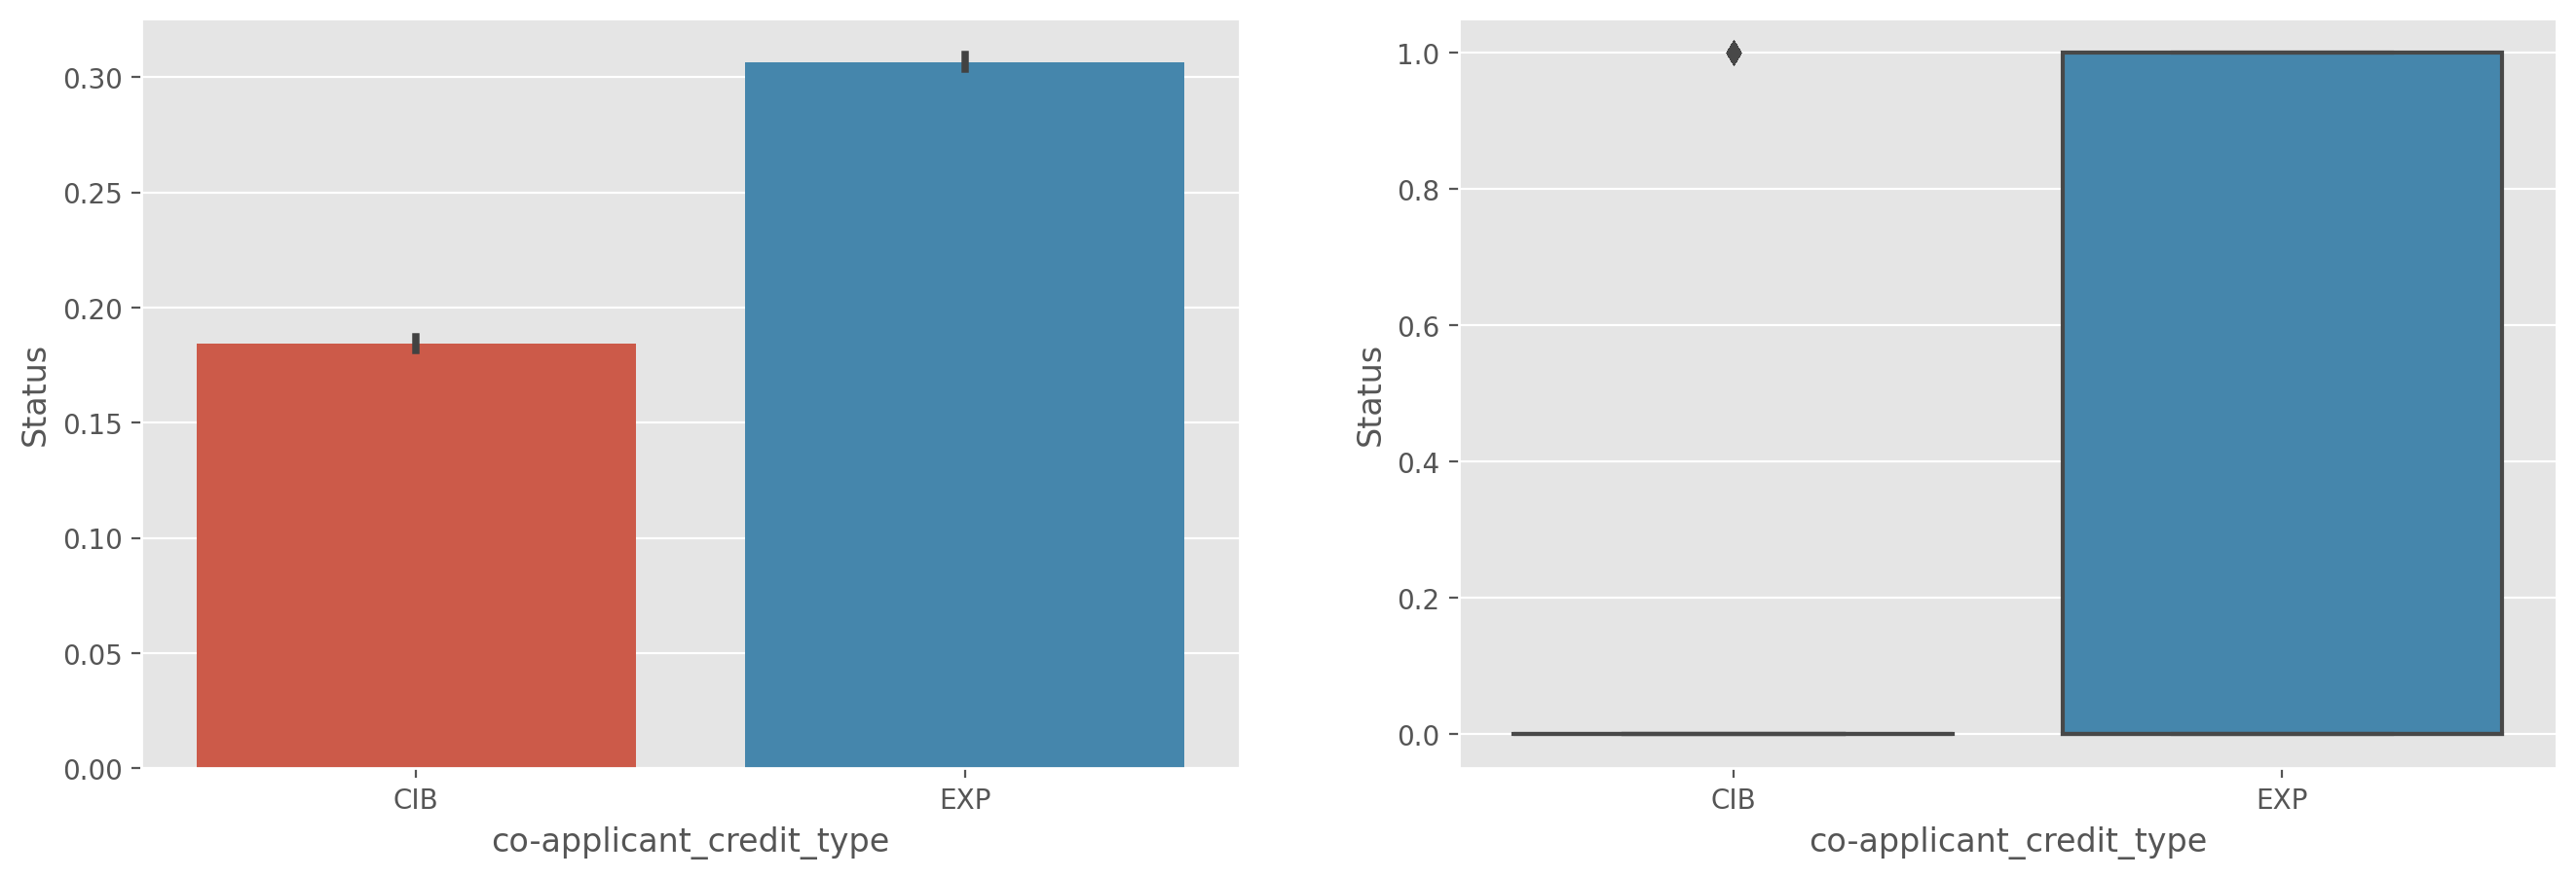

In [62]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('co-applicant_credit_type', 'Status',  data = data)
plt.subplot(1,2,2)
sns.boxplot('co-applicant_credit_type', 'Status',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

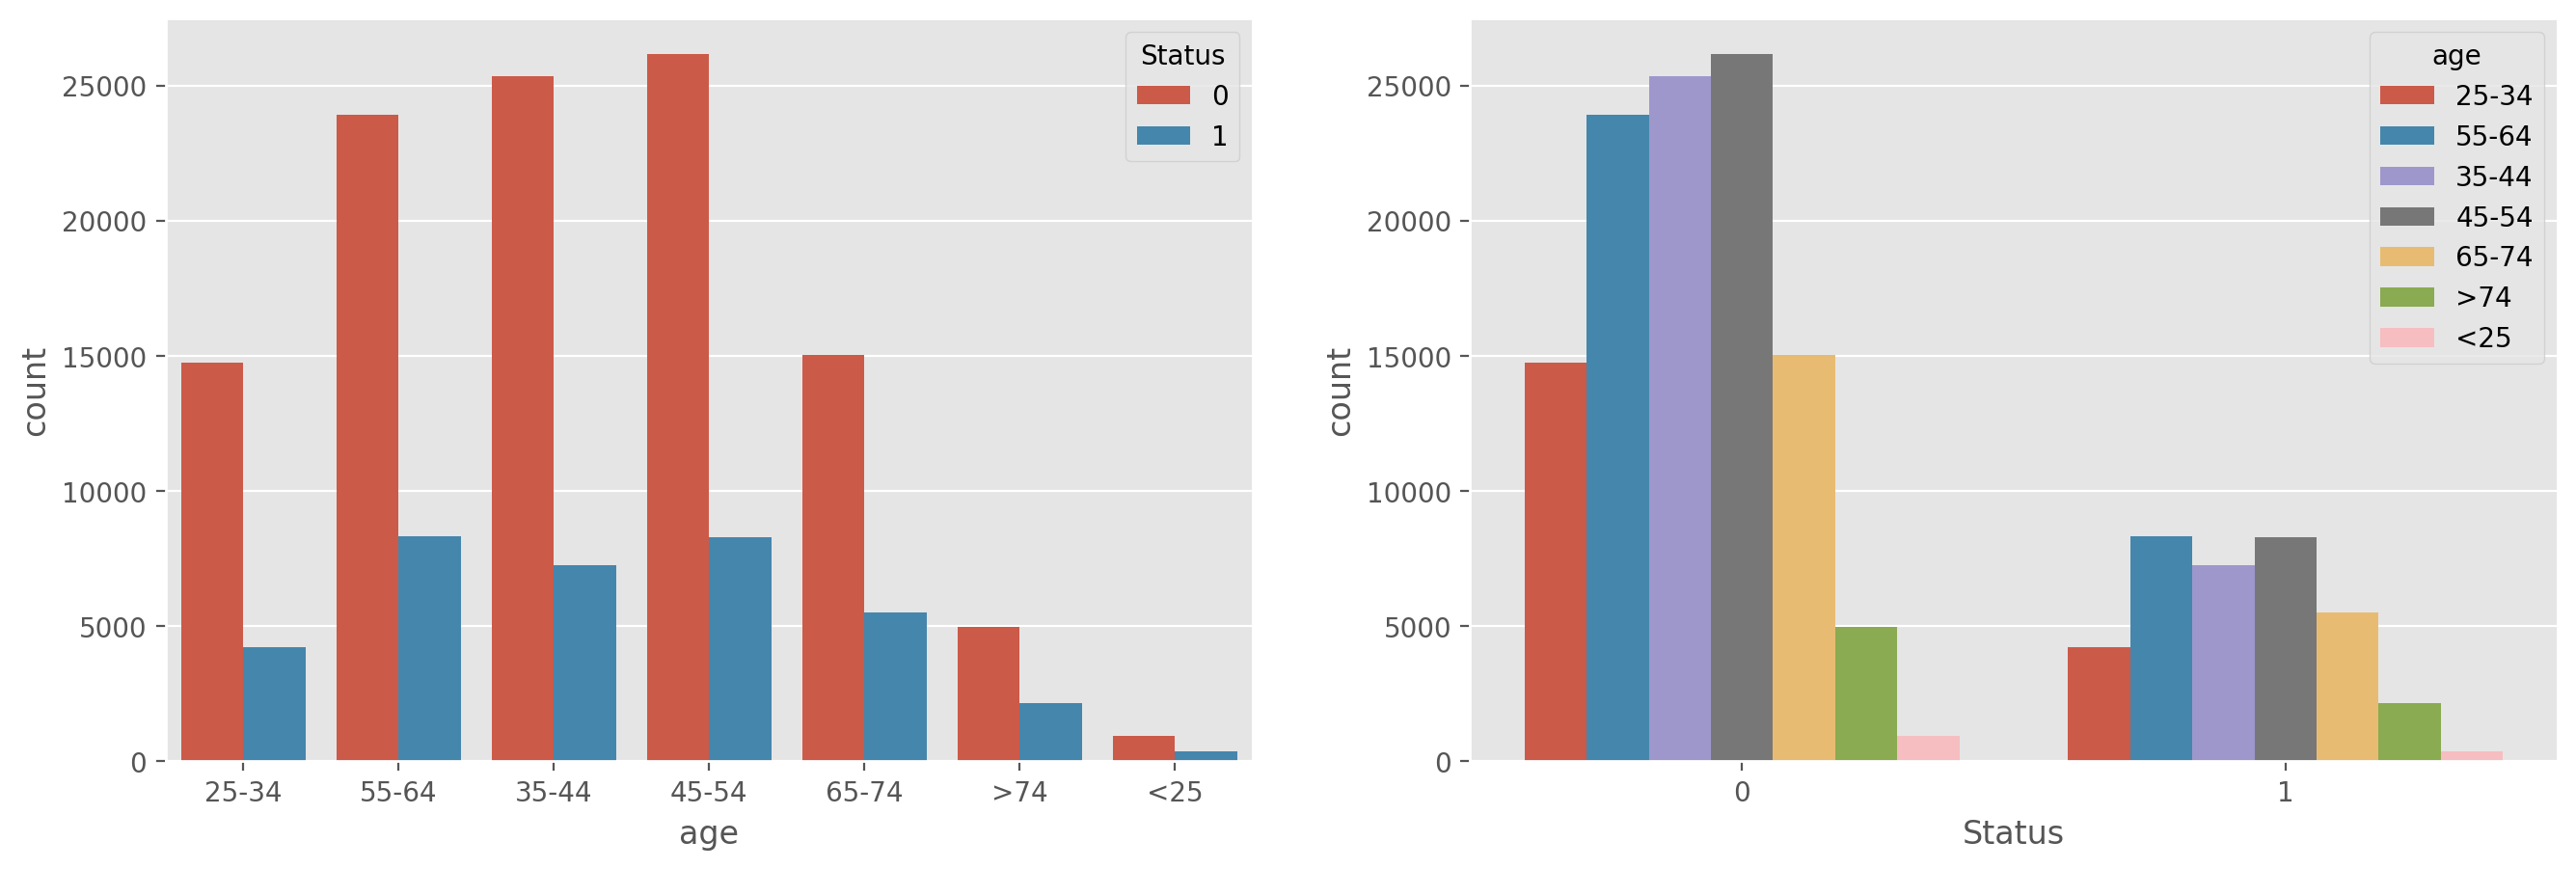

In [63]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('age', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'age',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

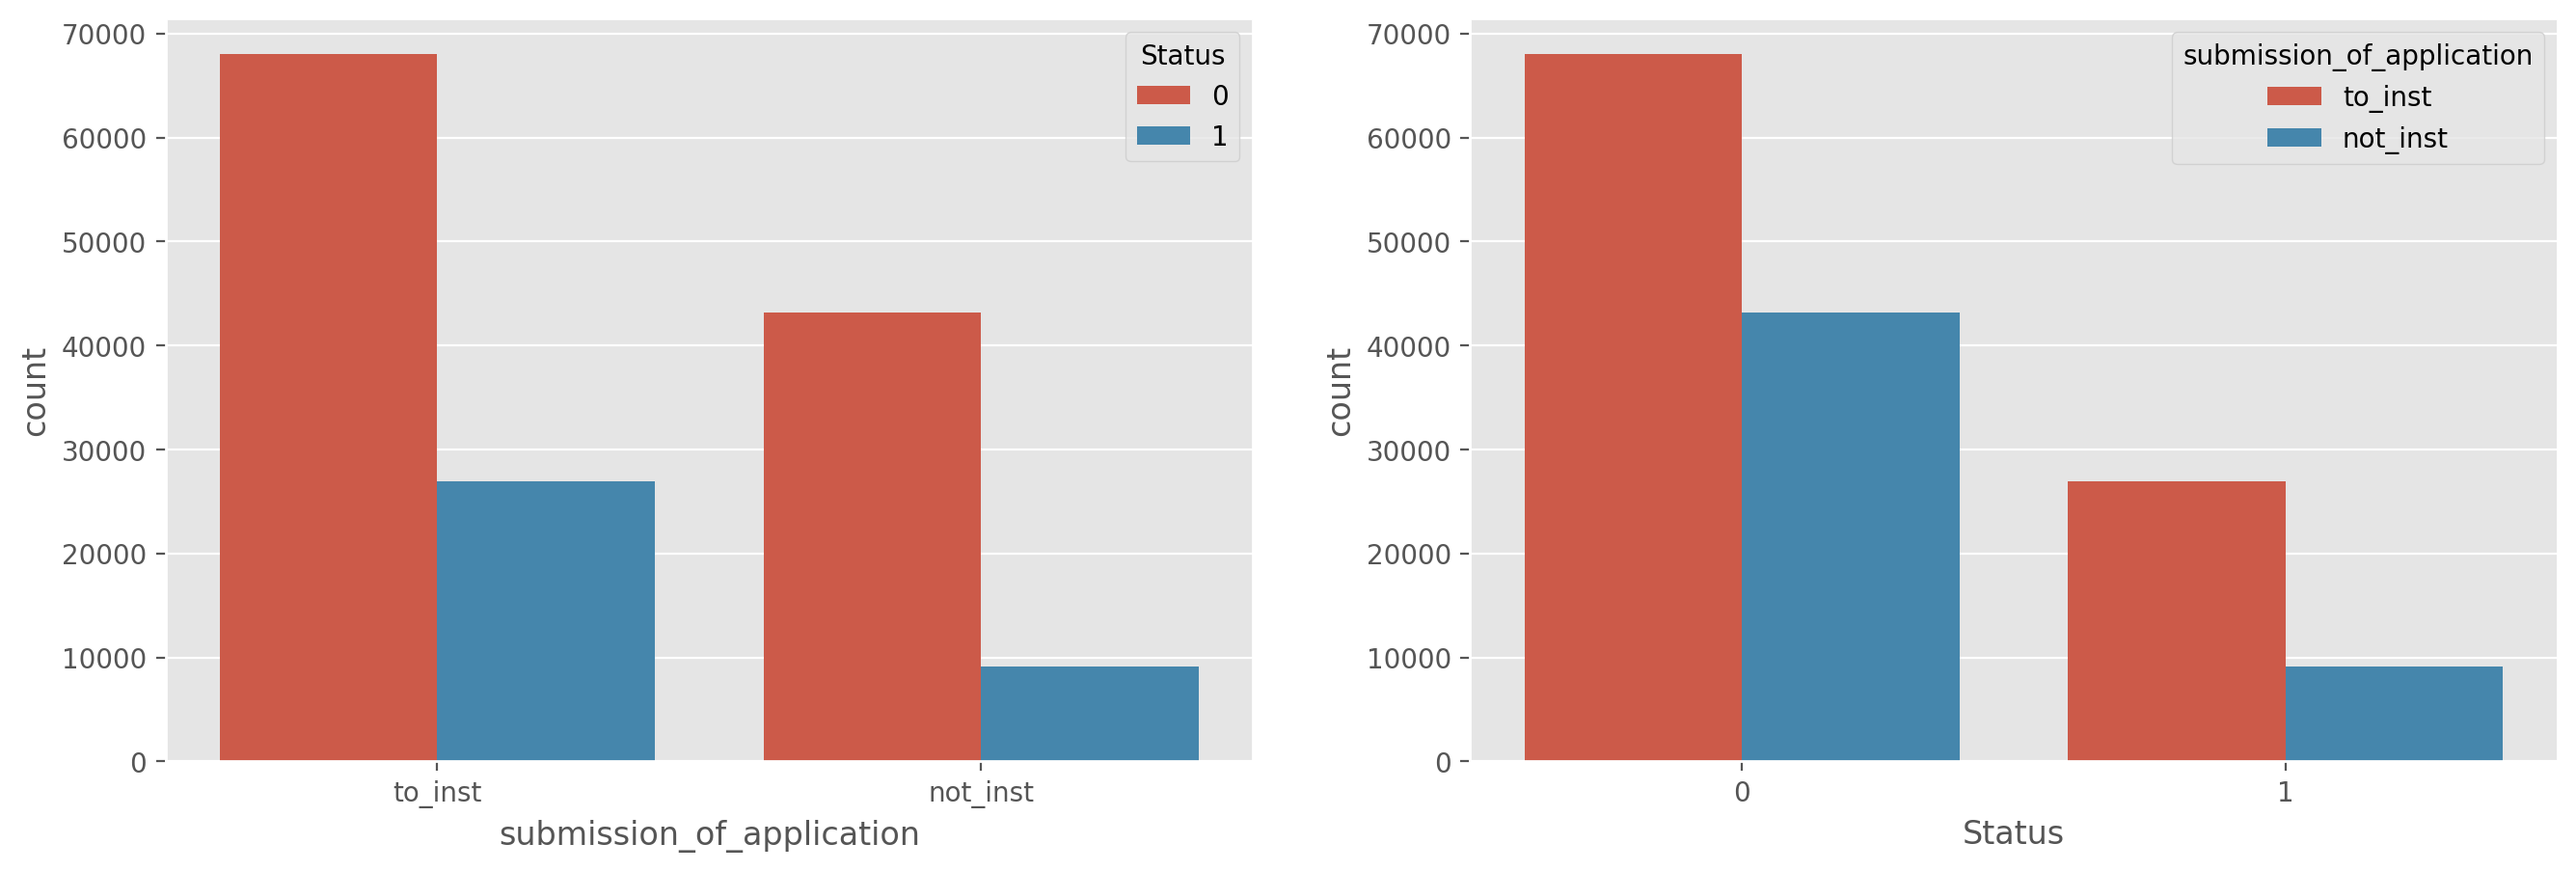

In [64]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('submission_of_application', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'submission_of_application',  data = data)

<AxesSubplot:xlabel='Status', ylabel='LTV'>

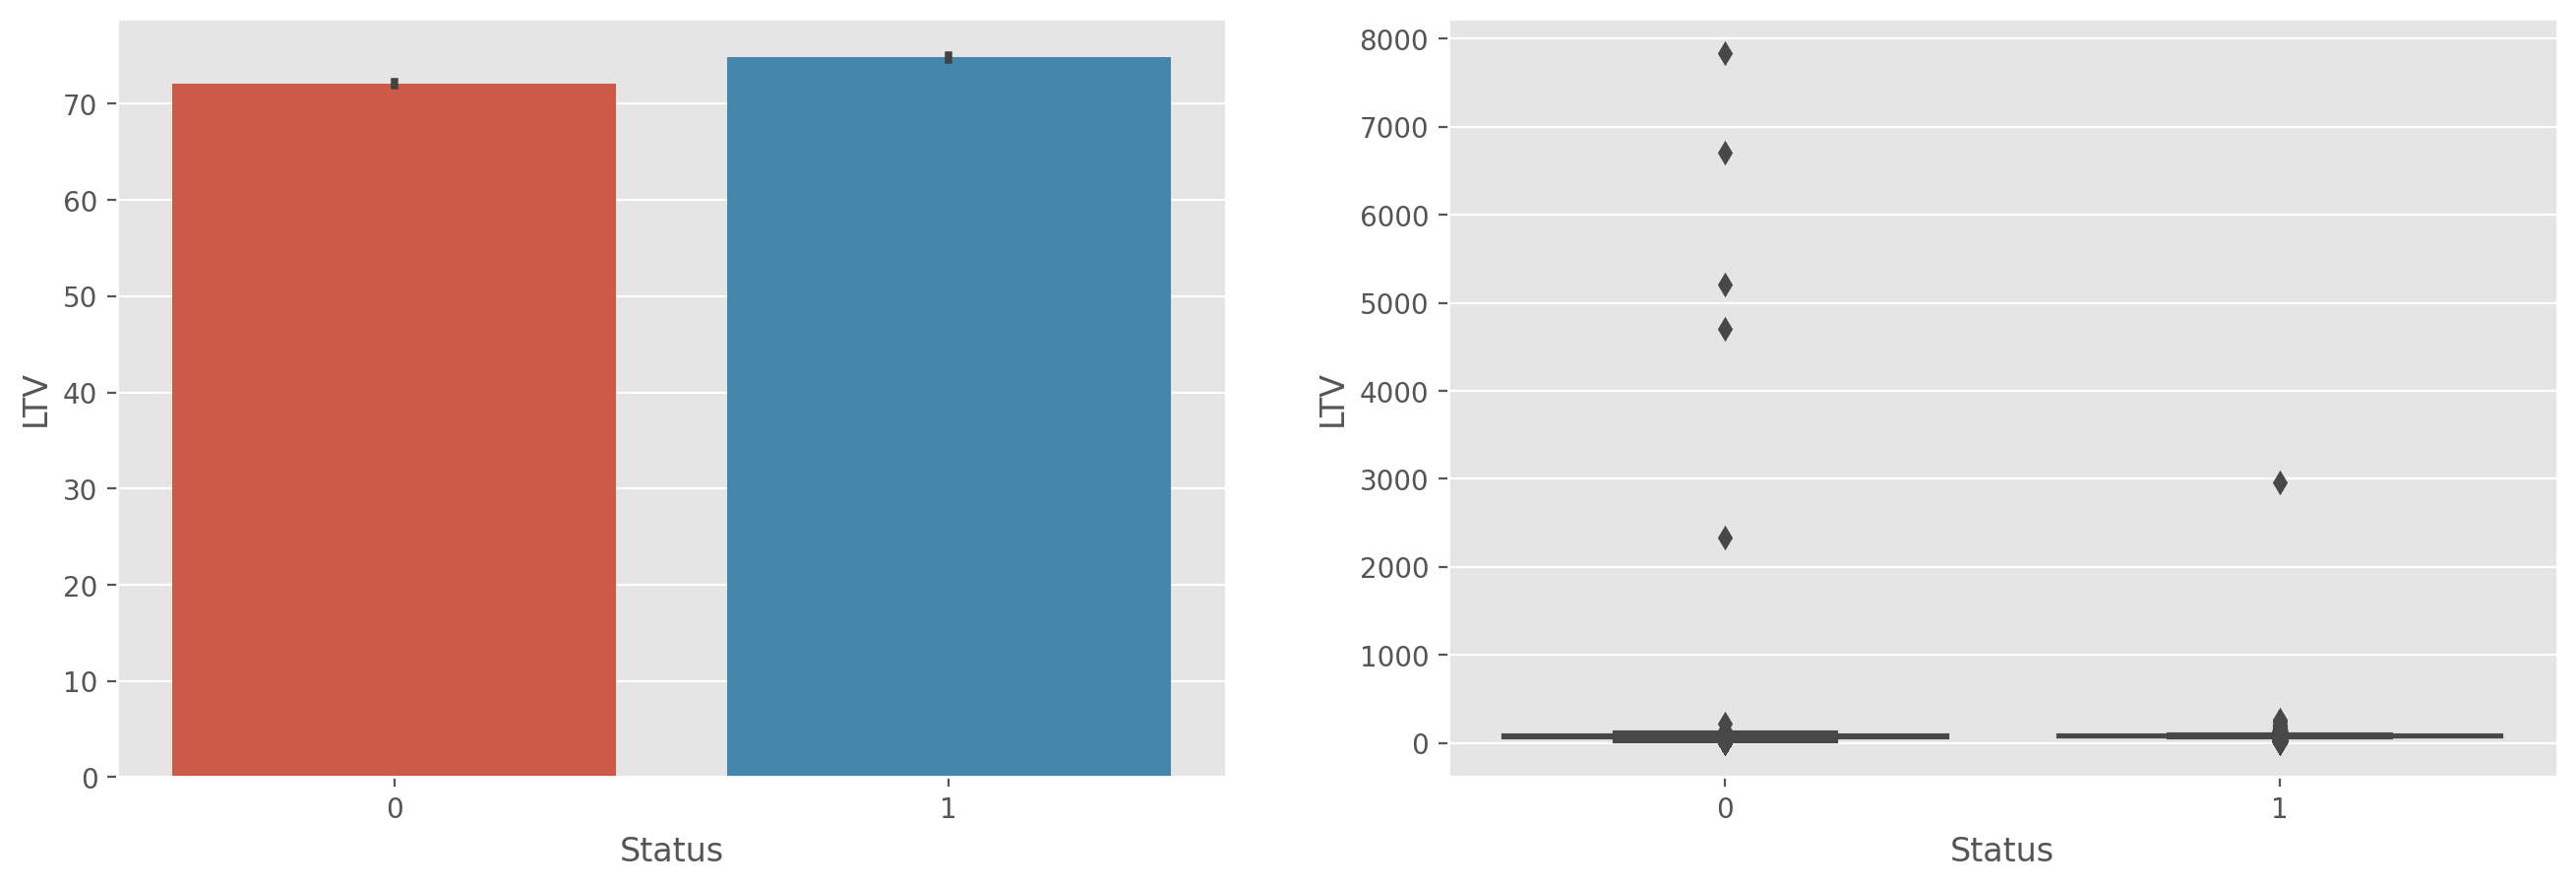

In [65]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'LTV',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'LTV',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

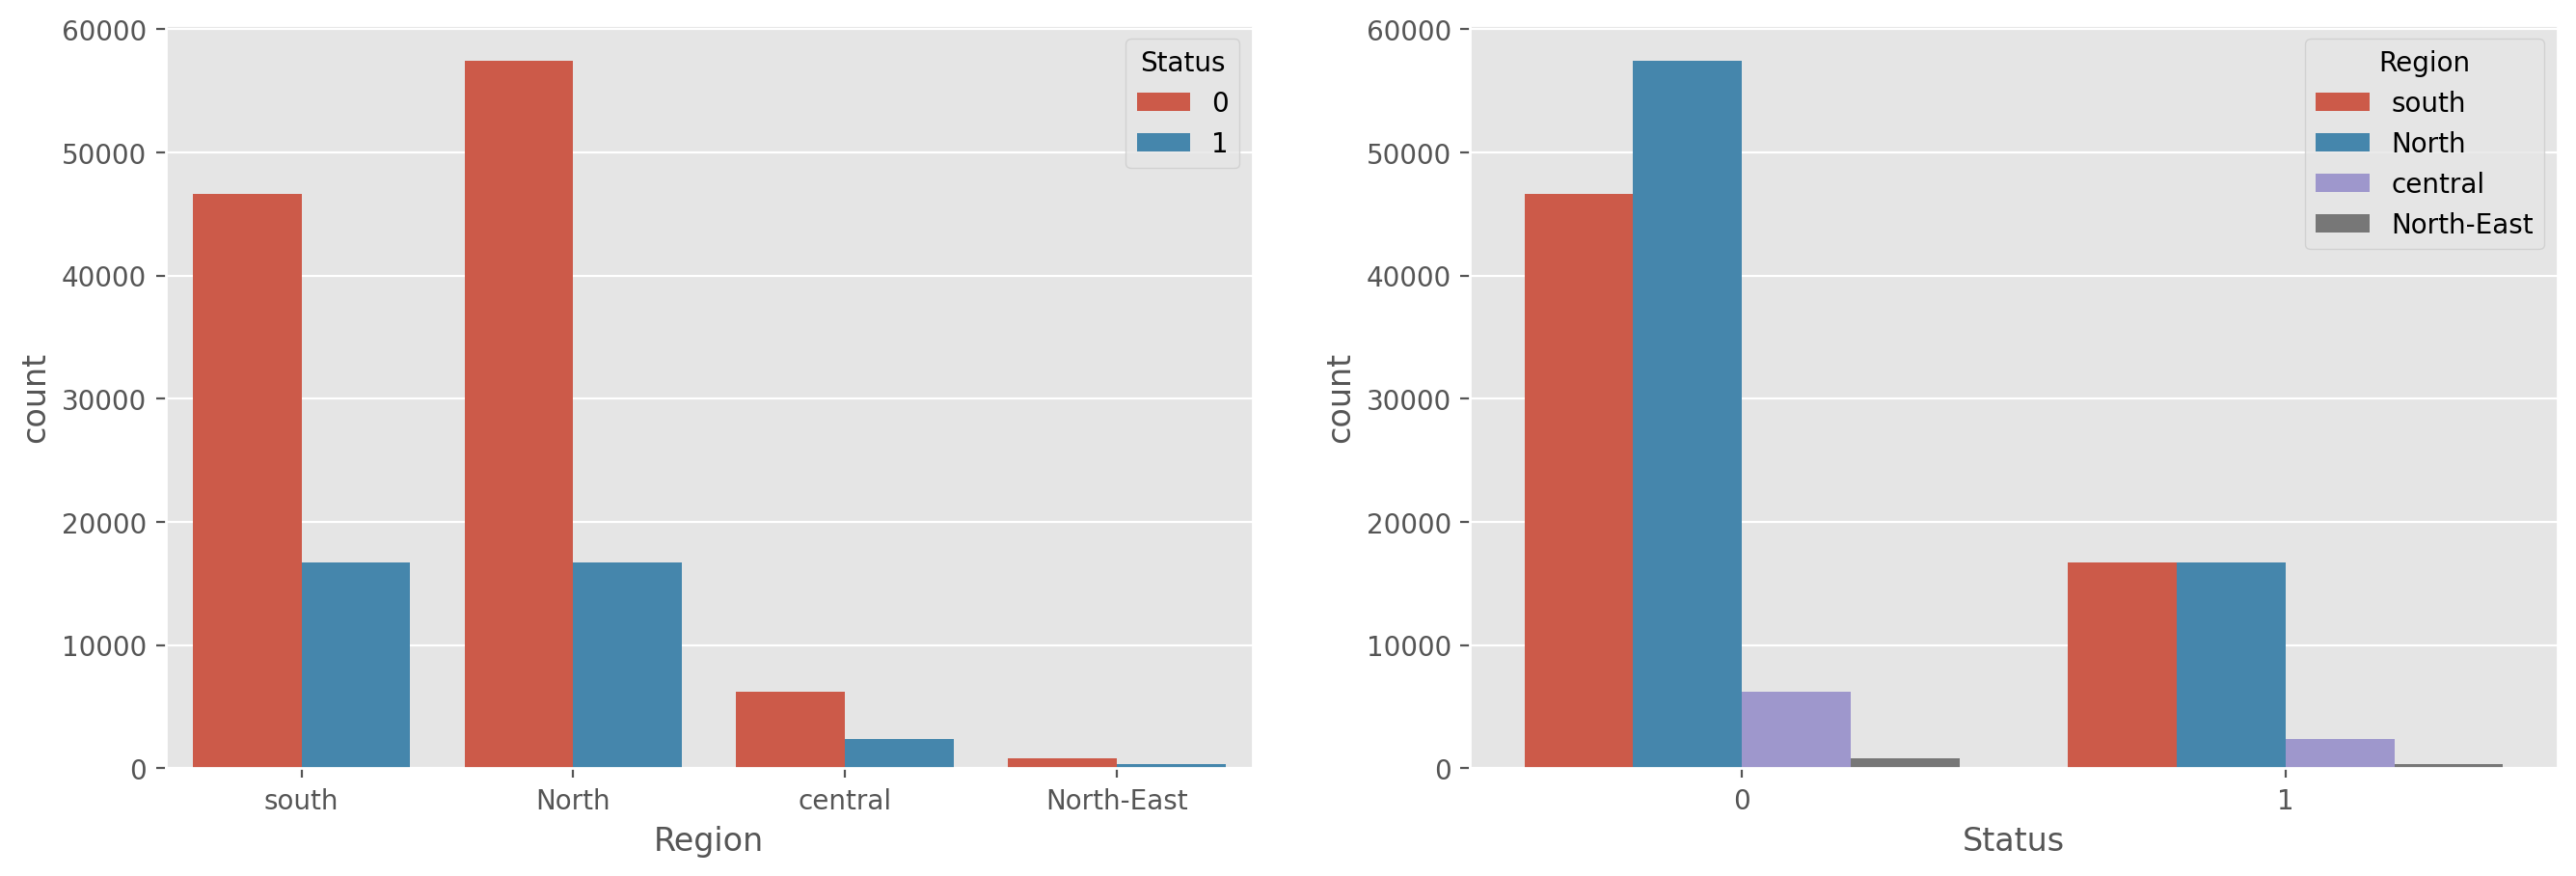

In [66]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Region', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Region',  data = data)

<AxesSubplot:xlabel='Status', ylabel='count'>

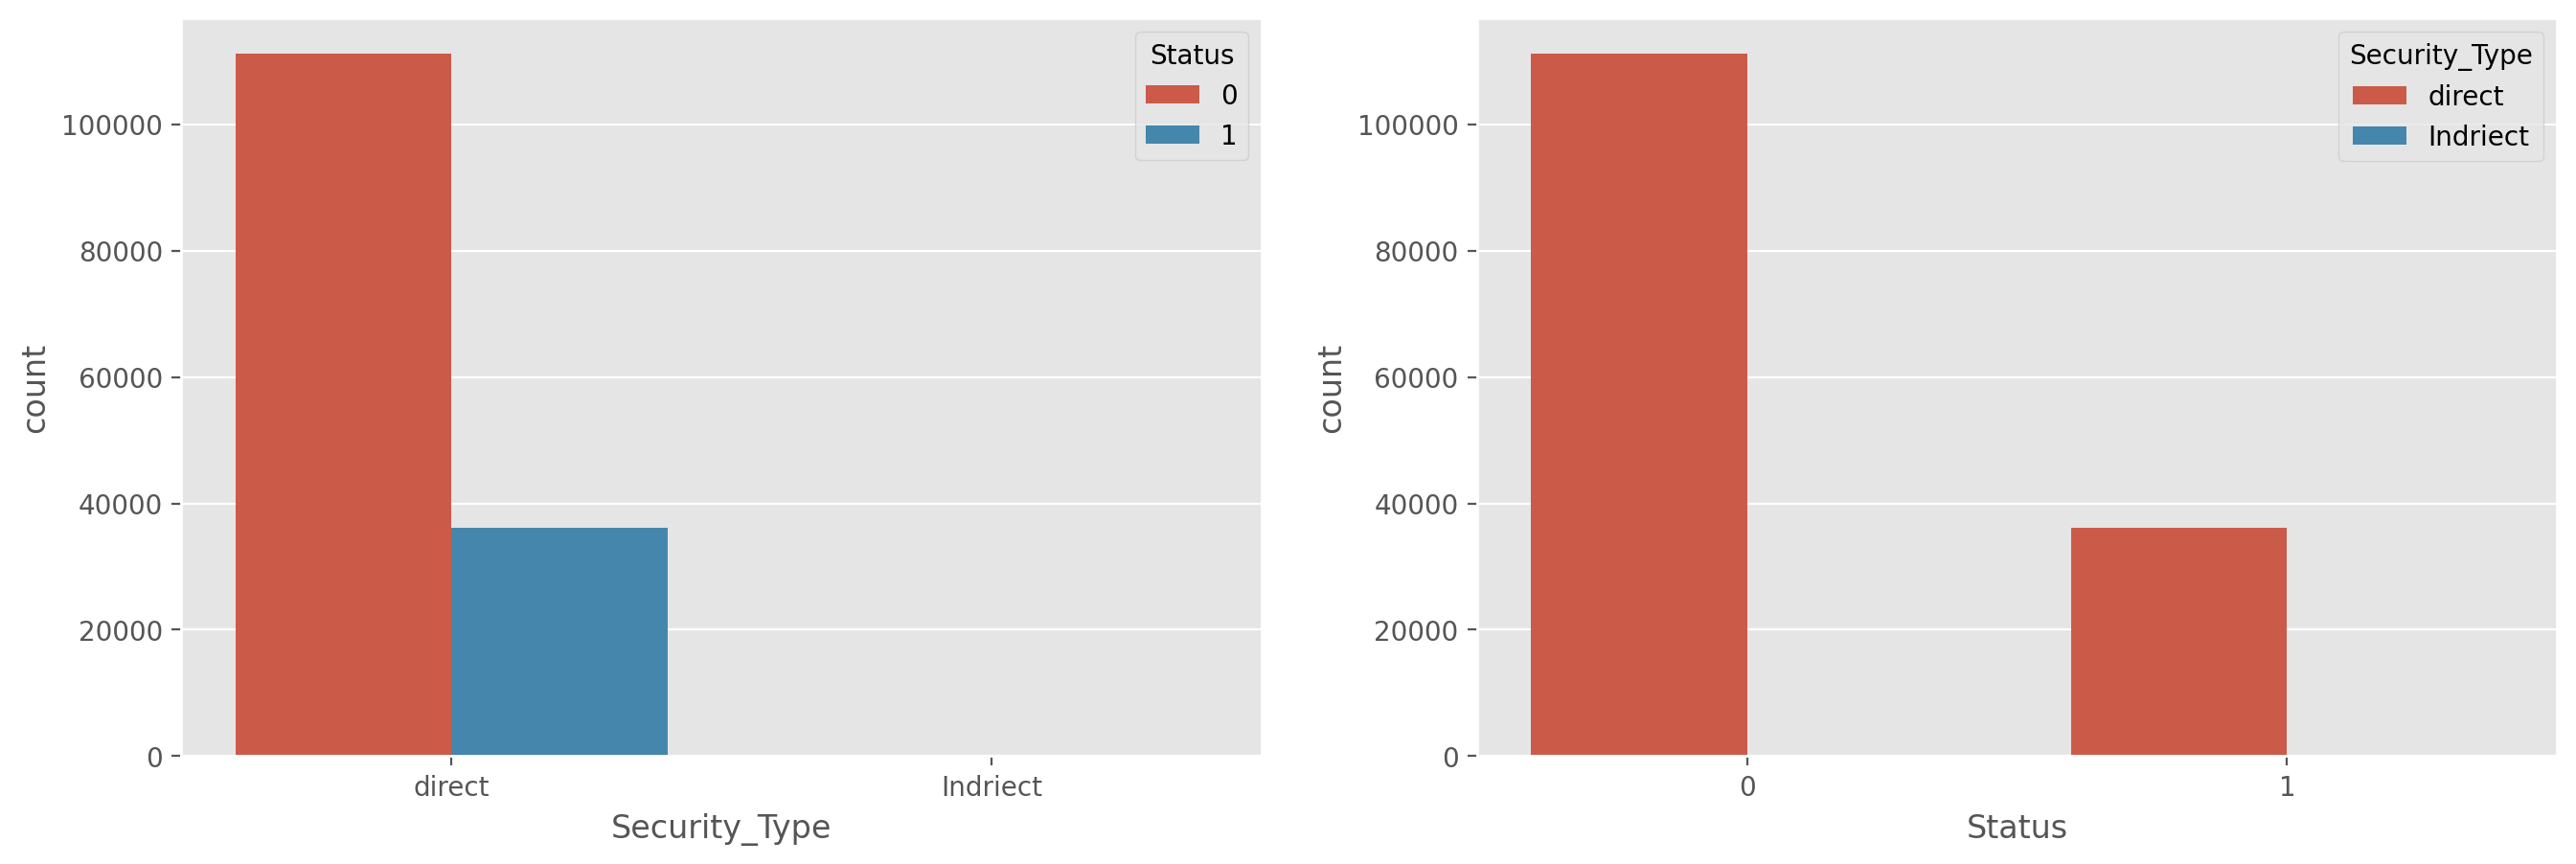

In [67]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.countplot('Security_Type', hue = 'Status',  data = data)
plt.subplot(1,2,2)
sns.countplot('Status', hue = 'Security_Type',  data = data)

<AxesSubplot:xlabel='Status', ylabel='dtir1'>

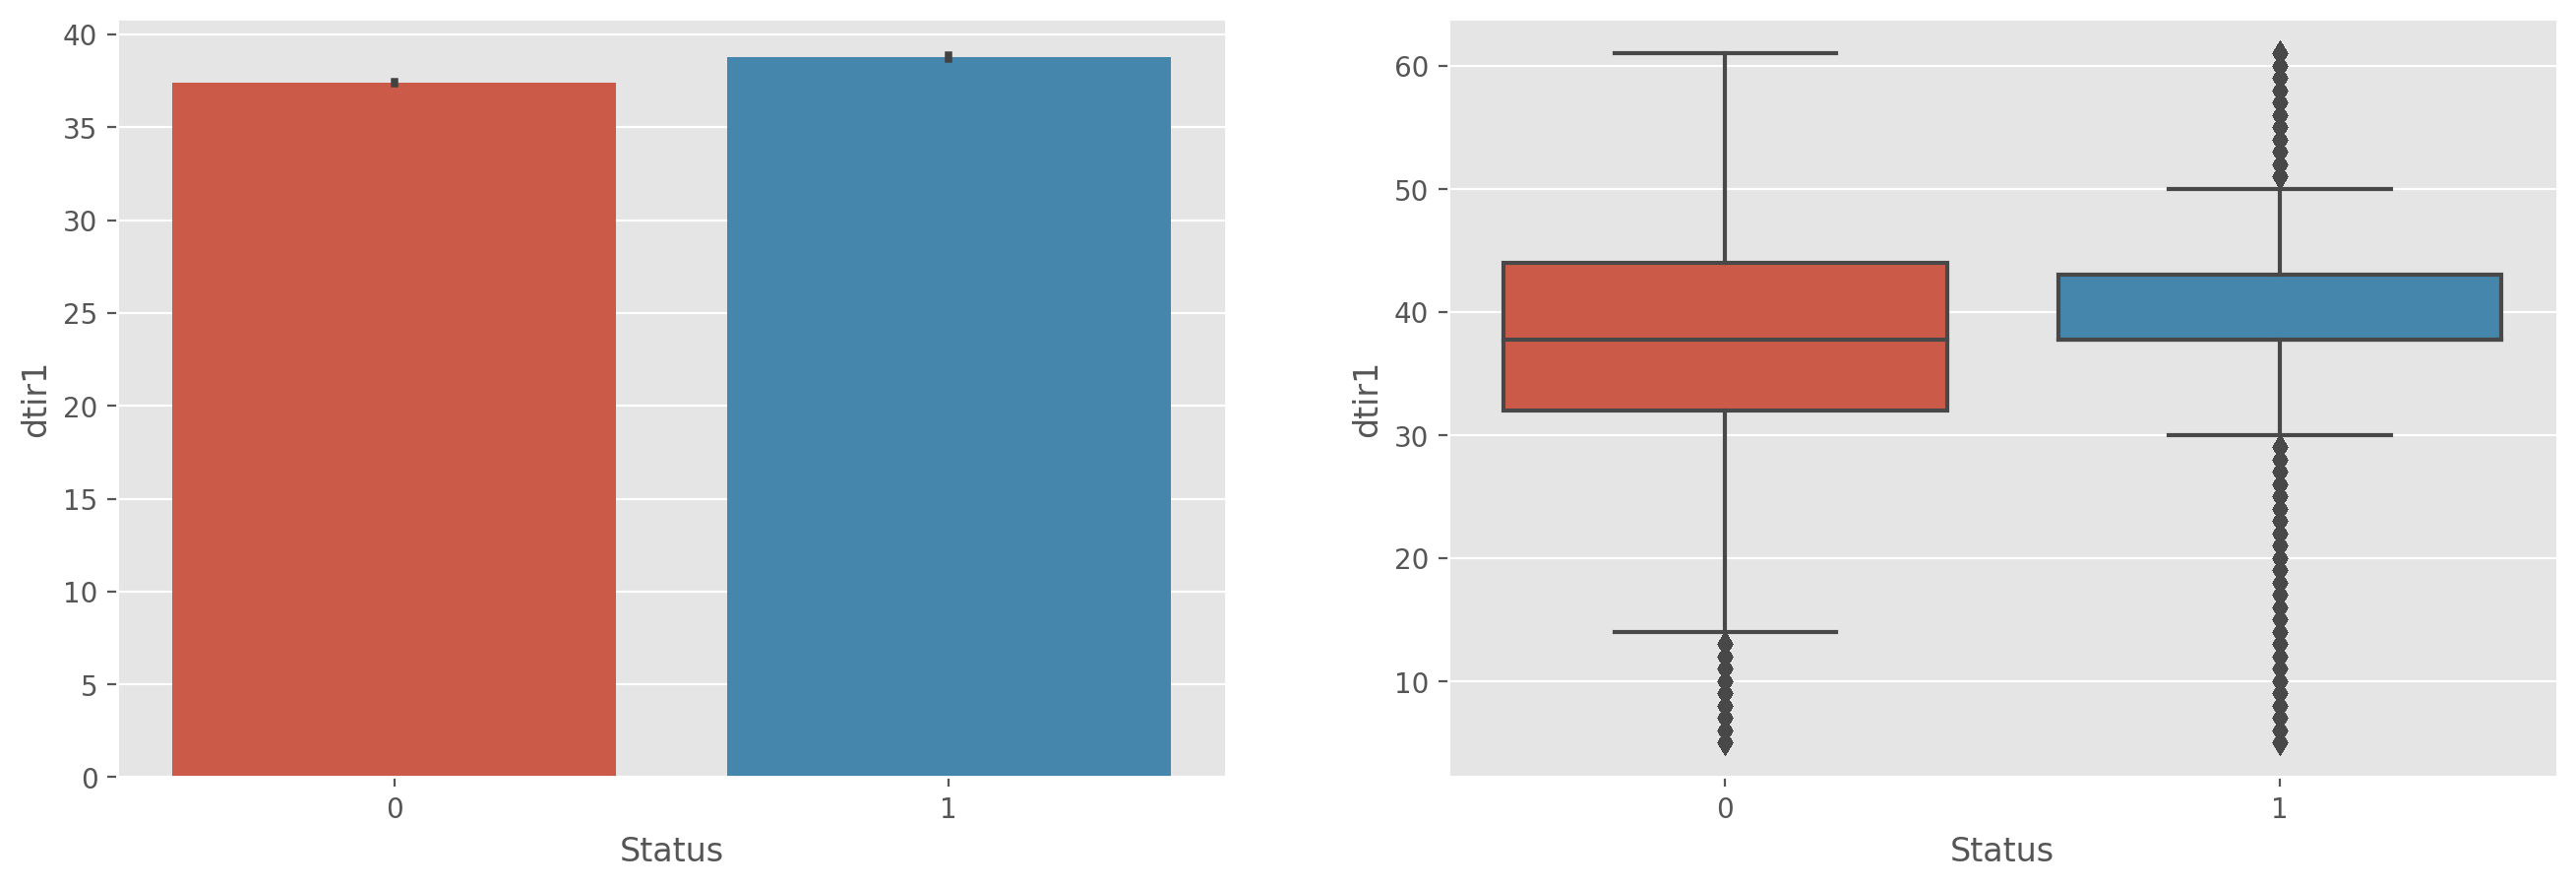

In [68]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Status', 'dtir1',  data = data)
plt.subplot(1,2,2)
sns.boxplot('Status', 'dtir1',  data = data)

In [69]:
# loan_amount, rate_of_interest, term, property_value, income, credit_score, age, status, dtir1


In [70]:
data.head()

ID  year loan_limit Gender approv_in_adv loan_type loan_purpose  \
0  24890  2019         cf   Male         nopre     type1           p1   
1  24891  2019         cf   Male         nopre     type2           p1   
2  24892  2019         cf   Male           pre     type1           p1   
3  24893  2019         cf   Male         nopre     type1           p4   
4  24894  2019         cf  Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  \
0                l1        nopc                  nob/c       116500   
1                l1        nopc                    b/c       206500   
2                l1        nopc                  nob/c       406500   
3                l1        nopc                  nob/c       456500   
4                l1        nopc                  nob/c       696500   

   rate_of_interest  Interest_rate_spread  Upfront_charges   term  \
0          4.043723              0.441288      3227.930189  360.0   
1          4.043723              0.441288      3227.930189  360.0   
2          4.560000              0.200000       595.000000  360.0   
3          4.250000              0.681000      3227.930189  360.0   
4          4.000000              0.304200         0.000000  360.0   

  Neg_ammortization interest_only lump_sum_payment  property_value  \
0           not_neg       not_int         not_lpsm    118000.00000   
1           not_neg       not_int             lpsm    498490.59028   
2           neg_amm       not_int         not_lpsm    508000.00000   
3           not_neg       not_int         not_lpsm    658000.00000   
4           not_neg       not_int         not_lpsm    758000.00000   

  construction_type occupancy_type Secured_by total_units   income  \
0                sb             pr       home          1U   1740.0   
1                sb             pr       home          1U   4980.0   
2                sb             pr       home          1U   9480.0   
3                sb             pr       home          1U  11880.0   
4                sb             pr       home          1U  10440.0   

  credit_type  Credit_Score co-applicant_credit_type    age  \
0         EXP           758                      CIB  25-34   
1        EQUI           552                      EXP  55-64   
2         EXP           834                      CIB  35-44   
3         EXP           587                      CIB  45-54   
4        CRIF           602                      EXP  25-34   

  submission_of_application        LTV Region Security_Type  Status      dtir1  
0                   to_inst  98.728814  south        direct       1  45.000000  
1                   to_inst  72.735873  North        direct       1  37.732017  
2                   to_inst  80.019685  south        direct       0  46.000000  
3                  not_inst  69.376900  North        direct       0  42.000000  
4                  not_inst  91.886544  North        direct       0  39.000000

### Dealing with catagorical and numerical features

In [71]:
print(data['loan_limit'].unique())
print(data['Gender'].unique())
print(data['approv_in_adv'].unique())
print(data['loan_type'].unique())
print(data['loan_purpose'].unique())
print(data['Credit_Worthiness'].unique())
print(data['open_credit'].unique())
print(data['business_or_commercial'].unique())
print(data['Neg_ammortization'].unique())
print(data['interest_only'].unique())
print(data['lump_sum_payment'].unique())
print(data['construction_type'].unique())
print(data['occupancy_type'].unique())
print(data['Secured_by'].unique())
print(data['total_units'].unique())
print(data['credit_type'].unique())
print(data['co-applicant_credit_type'].unique())
print(data['age'].unique())
print(data['Region'].unique())
print(data['Security_Type'].unique())

['cf' 'ncf']
['Male' 'Joint' 'Female']
['nopre' 'pre']
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2']
['l1' 'l2']
['nopc' 'opc']
['nob/c' 'b/c']
['not_neg' 'neg_amm']
['not_int' 'int_only']
['not_lpsm' 'lpsm']
['sb' 'mh']
['pr' 'sr' 'ir']
['home' 'land']
['1U' '2U' '3U' '4U']
['EXP' 'EQUI' 'CRIF' 'CIB']
['CIB' 'EXP']
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
['south' 'North' 'central' 'North-East']
['direct' 'Indriect']


In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

d1 = data[['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment','construction_type','occupancy_type','Secured_by','total_units','credit_type','co-applicant_credit_type','age','Region','Security_Type','submission_of_application']].apply(LabelEncoder().fit_transform)

data.drop(['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment','construction_type','occupancy_type','Secured_by','total_units','credit_type','co-applicant_credit_type','age','Region','Security_Type','submission_of_application'], axis = 1, inplace = True)

In [73]:
data.head()

ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019       116500          4.043723              0.441288   
1  24891  2019       206500          4.043723              0.441288   
2  24892  2019       406500          4.560000              0.200000   
3  24893  2019       456500          4.250000              0.681000   
4  24894  2019       696500          4.000000              0.304200   

   Upfront_charges   term  property_value   income  Credit_Score        LTV  \
0      3227.930189  360.0    118000.00000   1740.0           758  98.728814   
1      3227.930189  360.0    498490.59028   4980.0           552  72.735873   
2       595.000000  360.0    508000.00000   9480.0           834  80.019685   
3      3227.930189  360.0    658000.00000  11880.0           587  69.376900   
4         0.000000  360.0    758000.00000  10440.0           602  91.886544   

   Status      dtir1  
0       1  45.000000  
1       1  37.732017  
2       0  46.000000  
3       0  42.000000  
4       0  39.000000

In [74]:
data = pd.concat([data, d1], axis = 1)

In [75]:
data.head()

ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019       116500          4.043723              0.441288   
1  24891  2019       206500          4.043723              0.441288   
2  24892  2019       406500          4.560000              0.200000   
3  24893  2019       456500          4.250000              0.681000   
4  24894  2019       696500          4.000000              0.304200   

   Upfront_charges   term  property_value   income  Credit_Score        LTV  \
0      3227.930189  360.0    118000.00000   1740.0           758  98.728814   
1      3227.930189  360.0    498490.59028   4980.0           552  72.735873   
2       595.000000  360.0    508000.00000   9480.0           834  80.019685   
3      3227.930189  360.0    658000.00000  11880.0           587  69.376900   
4         0.000000  360.0    758000.00000  10440.0           602  91.886544   

   Status      dtir1  loan_limit  Gender  approv_in_adv  loan_type  \
0       1  45.000000           0       2              0          0   
1       1  37.732017           0       2              0          1   
2       0  46.000000           0       2              1          0   
3       0  42.000000           0       2              0          0   
4       0  39.000000           0       1              1          0   

   loan_purpose  Credit_Worthiness  open_credit  business_or_commercial  \
0             0                  0            0                       1   
1             0                  0            0                       0   
2             0                  0            0                       1   
3             3                  0            0                       1   
4             0                  0            0                       1   

   Neg_ammortization  interest_only  lump_sum_payment  construction_type  \
0                  1              1                 1                  1   
1                  1              1                 0                  1   
2                  0              1                 1                  1   
3                  1              1                 1                  1   
4                  1              1                 1                  1   

   occupancy_type  Secured_by  total_units  credit_type  \
0               1           0            0            3   
1               1           0            0            2   
2               1           0            0            3   
3               1           0            0            3   
4               1           0            0            1   

   co-applicant_credit_type  age  Region  Security_Type  \
0                         0    0       3              1   
1                         1    3       0              1   
2                         0    1       3              1   
3                         0    2       0              1   
4                         1    0       0              1   

   submission_of_application  
0                          1  
1                          1  
2                          1  
3                          0  
4                          0

In [76]:
# X = data.drop(['ID','year','Status'], axis = 1)
X = data[['loan_amount', 'rate_of_interest', 'term', 'property_value', 'income', 'Credit_Score', 'age', 'dtir1']]
Y = data[['Status']]

In [77]:
print('Independent feature set shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature set shape :  (147274, 8)
Dependent feature shape       :  (147274, 1)


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [79]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (117819, 8)
Training labels shape :  (117819, 1)
Testing data shape    :  (29455, 8)
Testing labels shape  :  (29455, 1)


## Using Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [81]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.7542162130046937
Testing Set Accuracy  :  0.7567136309624851


## Using Random Forest 

In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, max_depth = 4, max_features = 4)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.9519592418728915
Testing Set Score  :  0.9513248185322951


## Hyperparameter Tuning

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [84]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [85]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = search_params,
                           scoring = ['r2'],
                           cv = 5,
                           refit = 'r2',
                           verbose = 3)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.762) total time=   0.2s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.898) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.627) total time=   0.2s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.794) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=10; r2: (test=0.936) total time=   0.2s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.849) total time=   0.4s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.847) total time=   0.4s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.886) total time=   0.3s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.763) total time=   0.3s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=20; r2: (test=0.898) total t

[CV 2/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.978) total time=   0.5s
[CV 3/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.956) total time=   0.5s
[CV 4/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.912) total time=   0.7s
[CV 5/5] END max_depth=4, max_features=4, n_estimators=30; r2: (test=0.942) total time=   0.7s
[CV 1/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.944) total time=   0.8s
[CV 2/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.943) total time=   0.9s
[CV 3/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.925) total time=   1.0s
[CV 4/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.979) total time=   0.8s
[CV 5/5] END max_depth=4, max_features=4, n_estimators=40; r2: (test=0.972) total time=   0.8s
[CV 1/5] END max_depth=4, max_features=4, n_estimators=50; r2: (test=0.954) total time=   1.1s
[CV 2/5] END max_depth=4, max_features=4, n_estima

[CV 4/5] END max_depth=6, max_features=4, n_estimators=50; r2: (test=0.994) total time=   1.1s
[CV 5/5] END max_depth=6, max_features=4, n_estimators=50; r2: (test=0.991) total time=   1.2s
[CV 1/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.997) total time=   0.2s
[CV 2/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=1.000) total time=   0.1s
[CV 3/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.996) total time=   0.2s
[CV 4/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.991) total time=   0.2s
[CV 5/5] END max_depth=6, max_features=5, n_estimators=10; r2: (test=0.998) total time=   0.2s
[CV 1/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.997) total time=   0.5s
[CV 2/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.995) total time=   0.4s
[CV 3/5] END max_depth=6, max_features=5, n_estimators=20; r2: (test=0.996) total time=   0.6s
[CV 4/5] END max_depth=6, max_features=5, n_estima

[CV 1/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=1.000) total time=   0.6s
[CV 2/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=1.000) total time=   0.7s
[CV 3/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=1.000) total time=   0.7s
[CV 4/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=1.000) total time=   0.7s
[CV 5/5] END max_depth=8, max_features=5, n_estimators=30; r2: (test=1.000) total time=   0.6s
[CV 1/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=1.000) total time=   1.1s
[CV 2/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=1.000) total time=   1.0s
[CV 3/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=1.000) total time=   1.0s
[CV 4/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=1.000) total time=   1.0s
[CV 5/5] END max_depth=8, max_features=5, n_estimators=40; r2: (test=1.000) total time=   1.0s
[CV 1/5] END max_depth=8, max_features=5, n_estima

[CV 2/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=1.000) total time=   1.4s
[CV 3/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=1.000) total time=   1.6s
[CV 4/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=1.000) total time=   1.6s
[CV 5/5] END max_depth=10, max_features=5, n_estimators=50; r2: (test=1.000) total time=   1.2s
[CV 1/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=1.000) total time=   0.2s
[CV 2/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=1.000) total time=   0.1s
[CV 3/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=1.000) total time=   0.2s
[CV 4/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=1.000) total time=   0.2s
[CV 5/5] END max_depth=10, max_features=6, n_estimators=10; r2: (test=1.000) total time=   0.2s
[CV 1/5] END max_depth=10, max_features=6, n_estimators=20; r2: (test=1.000) total time=   0.4s
[CV 2/5] END max_depth=10, max_features=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 6, 8, 10],
                         'max_features': [4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=3)

In [86]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 6, 'n_estimators': 20}

In [87]:
grid_search.best_score_

0.9999728080780971

In [88]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=20)

## Random Forest  After tuning 

In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 8, max_features = 6)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.9999944543380237
Testing Set Score  :  0.9999833379995406


## Evaluation Metric

In [96]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [120]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[22289,     0],
       [ 7166,     0]], dtype=int64)

In [121]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


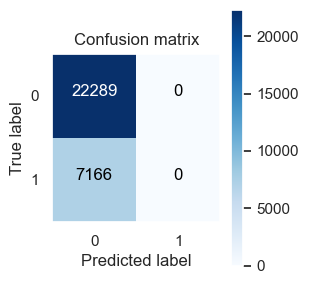

In [122]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [100]:
accuracy_score(y_test, pred_test)

0.7567136309624851

In [101]:
precision_score(y_test, pred_test)

0.0

In [102]:
recall_score(y_test, pred_test)

0.0

In [103]:
f1_score(y_test, pred_test)

0.0

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22289
           1       0.00      0.00      0.00      7166

    accuracy                           0.76     29455
   macro avg       0.38      0.50      0.43     29455
weighted avg       0.57      0.76      0.65     29455



In [117]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_test)

8.402813500116448